In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Counting the number of images in each class

In [ ]:
check = os.listdir('/content/drive/MyDrive/without_expert/cek kelas')

In [ ]:
class0 = [s[:8] for s in class0]
class1 = [s[:8] for s in class1]
class2 = [s[:8] for s in class2]
class3 = [s[:8] for s in class3]
class4 = [s[:8] for s in class4]
check = [s[:8] for s in check]

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 4/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 4/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 3/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 3/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 2/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 2/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 1/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 1/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 0/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 0/Hanya Daun/Vertikal')))

172 152 177 155 171 151 171 156 171 153


In [ ]:
classes = []
for i in check:
  if i in class4:
    classes.append('4')
  if i in class3:
    classes.append('3')
  if i in class2:
    classes.append('2')
  if i in class1:
    classes.append('1')
  if i in class0:
    classes.append('0')

In [ ]:
df = pd.DataFrame({'image': check, 'class': classes})
df

# Training the YOLOv8 Segmentation

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 16.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
import os
import cv2
import torch
from pathlib import Path
import numpy as np

In [ ]:
model = YOLO('yolov8x-seg.yaml')
model = YOLO('yolov8x-seg.pt')

100%|██████████| 137M/137M [00:00<00:00, 335MB/s]


In [ ]:
# Melihat isi file yaml dataset
%cat /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml

train: /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/train/images
val: /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/valid/images
test: ../test/images

nc: 2
names: ['midrib', 'spot']

roboflow:
  workspace: skripsi-karet-tobrv
  project: leafseg2
  version: 11
  license: CC BY 4.0
  url: https://universe.roboflow.com/skripsi-karet-tobrv/leafseg2/dataset/11

In [ ]:
import yaml

with open("/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
# Define path to save training result
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_1_fix"

In [ ]:
# Training
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250)

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_1_fix, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 71.1MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_1_fix/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_1_fix
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.7G      1.605      6.274      3.772      1.494        118        640: 100%|██████████| 3/3 [00:09<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]

                   all         10         92    0.00519      0.474      0.133     0.0686    0.00131     0.0305   0.000716    0.00054



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G      1.684      5.748      3.829      1.582        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92    0.00478      0.468      0.126     0.0598    0.00134     0.0305    0.00073   0.000427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      14.9G      1.719      6.173      3.775      1.591        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.445      0.792      0.506      0.362      0.119      0.207      0.111     0.0525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.423      3.105      2.787      1.257        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92      0.582        0.5      0.316       0.23      0.294     0.0671     0.0918     0.0435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G      1.254      2.481       2.63      1.202        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92      0.169      0.758      0.209      0.138      0.262      0.165      0.197     0.0951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.3G      1.081      2.029       1.99      1.102        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.109      0.717      0.113     0.0689      0.104      0.317      0.105     0.0623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G      1.057      1.684      1.496      1.076        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.336      0.329      0.335      0.207      0.326      0.341      0.338      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      14.5G      1.088       1.98      1.442      1.103         55        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92      0.329      0.262      0.302      0.197      0.321      0.256      0.306      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.3G      1.057      1.705      1.228      1.068         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.362      0.784      0.386      0.239      0.357      0.334      0.373       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      13.8G      1.046      1.754      1.053      1.039        204        640: 100%|██████████| 3/3 [00:05<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         10         92      0.429      0.799      0.361      0.213      0.422      0.299      0.358       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G      0.981       1.67     0.9849      1.029        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.115      0.699      0.108     0.0698      0.112      0.299      0.104     0.0544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      14.3G      1.017      1.921      1.136      1.058         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.287      0.613      0.234      0.154       0.29       0.22       0.24      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250      15.1G      1.017      1.734       1.04      1.054        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10         92     0.0159       0.49     0.0178     0.0106    0.00875       0.22     0.0115    0.00621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.3G     0.9765      1.558      1.083       1.04         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         10         92   0.000888     0.0305   0.000473   0.000337   0.000888     0.0305   0.000473   0.000282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.4G      1.071      1.682      1.199      1.091        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92    0.00414      0.211    0.00274    0.00147    0.00344     0.0732    0.00196   0.000886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G      1.033      1.707     0.9487      1.012         81        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.155      1.849      1.052      1.045        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.3G      1.094      1.627      1.108      1.082         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G      1.035      1.496      1.015      1.076         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.4G      1.013      1.433     0.9542      1.036        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250      14.4G      1.072      1.631      1.048      1.057        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.5G      1.044      1.466     0.8649      1.025        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      14.2G      1.004       1.52     0.8625      1.022        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.2G      1.049      1.539     0.9503      1.102        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G      1.059      1.503     0.9563      1.102        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.4G      1.018      1.415      1.132      1.062        184        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      14.2G     0.9241      1.349     0.7848     0.9962        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      15.5G      1.114      1.651      1.077       1.05        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.165      1.771     0.9089      1.055         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.3G      1.095      1.606     0.8745      1.027        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.4G      1.097      1.519     0.9686      1.044        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G       1.06      1.412      1.092      1.068        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.4G      1.055      1.417     0.8575      1.056        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.2G     0.9998      1.423     0.7865      1.008        178        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         10         92    0.00492      0.134    0.00301    0.00189     0.0047      0.128    0.00294    0.00156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G       1.02      1.487     0.7815      1.049         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         10         92      0.323       0.32      0.264      0.169      0.252      0.232       0.24       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.4G     0.9844      1.467      0.824      1.015         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92       0.38      0.189      0.252      0.156      0.379      0.189      0.242      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      15.4G      1.033      1.463      0.825      1.047        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92       0.38      0.189      0.252      0.156      0.379      0.189      0.242      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G      1.119       1.43     0.9632      1.102        188        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.403       0.46      0.394      0.238      0.325      0.361      0.352      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.103      1.561     0.8895      1.067        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.278      0.262      0.266      0.179      0.278      0.262      0.269      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G      1.041      1.473     0.8661      1.088        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92     0.0183      0.495     0.0125    0.00815     0.0166      0.339     0.0109    0.00563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.6G      1.086      1.637     0.9036      1.079        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92     0.0183      0.495     0.0125    0.00815     0.0166      0.339     0.0109    0.00563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.4G      1.043      1.689     0.8435          1         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92    0.00395      0.111    0.00216    0.00142    0.00361      0.061    0.00197     0.0012



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.3G      1.036      1.481     0.7699       1.04        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92      0.309      0.817      0.448      0.307      0.311      0.374      0.345      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.3G      1.027      1.515     0.8335      1.049        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92       0.42       0.86      0.651      0.447      0.407      0.375      0.401      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      14.3G      1.099      1.517     0.7589      1.085         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92       0.42       0.86      0.651      0.447      0.407      0.375      0.401      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.3G      1.105      1.491     0.7924      1.111        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.572      0.767      0.849      0.612      0.371      0.385      0.395      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.4G      1.034      1.417      0.867      1.123        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92      0.869      0.149      0.279      0.188      0.359      0.165      0.179      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.4G      0.881      1.368     0.8803     0.9855        119        640: 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         10         92      0.368      0.296      0.317       0.21      0.287      0.165      0.209      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      13.3G     0.9781      1.488     0.7942      1.049        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.368      0.296      0.317       0.21      0.287      0.165      0.209      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.3G      1.013      1.593     0.9463      1.061        176        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         10         92      0.591      0.204      0.294      0.187      0.591      0.204      0.292      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.2G     0.9077      1.312     0.6897     0.9963        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.503      0.212      0.224      0.125      0.385      0.171      0.208      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.2G      0.852      1.349     0.6374     0.9592        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.418      0.196      0.188      0.111      0.412       0.14       0.18      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      14.3G     0.7799      1.123     0.5592     0.9126         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         10         92      0.418      0.196      0.188      0.111      0.412       0.14       0.18      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.3G      0.888      1.361     0.7379     0.9773        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.534      0.275      0.305      0.195      0.399       0.22      0.244      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.3G     0.8501      1.367     0.6591     0.9312        183        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.856      0.326      0.389      0.262      0.429       0.22      0.275      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.3G     0.9058      1.446     0.7351      0.963        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.796      0.437      0.449      0.265      0.341      0.262       0.28      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      13.9G     0.8679      1.275     0.6295     0.9383        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         10         92      0.796      0.437      0.449      0.265      0.341      0.262       0.28      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.3G     0.8821      1.331     0.7076     0.9841        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92        0.9      0.487      0.577      0.338      0.366      0.333      0.361      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.5G     0.9264      1.272     0.7043      1.011        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.349      0.535      0.415      0.282      0.337      0.329      0.359      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.2G      0.835      1.151     0.6587     0.9716        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92       0.65      0.449      0.548      0.374      0.483      0.355      0.398      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.5G     0.9827      1.404     0.9064      1.066        267        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92       0.65      0.449      0.548      0.374      0.483      0.355      0.398      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.4G     0.8868      1.235     0.7371     0.9734        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         10         92      0.945      0.444      0.599       0.45      0.521      0.318      0.396       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.4G      0.898      1.272     0.6332     0.9477        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.798      0.679      0.855      0.585      0.583       0.49      0.465      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.2G     0.8511       1.21        0.7     0.9757        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.936      0.758      0.879      0.681       0.65      0.474      0.477      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      14.4G      0.844      1.178     0.6111      0.935        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.936      0.758      0.879      0.681       0.65      0.474      0.477      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.3G     0.8605       1.24     0.6824     0.9943        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.886      0.789      0.892      0.694      0.615      0.484      0.496      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.3G     0.8556      1.305     0.6582     0.9693        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         10         92      0.831      0.829      0.885      0.658      0.568      0.529      0.472      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.2G     0.8612      1.285     0.7371     0.9917        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.788       0.89      0.887      0.638      0.522      0.576      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250        15G     0.8545      1.221     0.6317     0.9782        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92      0.788       0.89      0.887      0.638      0.522      0.576      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.3G     0.8138       1.16     0.6508     0.9705        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.872      0.795      0.894      0.645      0.532      0.541      0.462      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.5G     0.8713      1.273     0.7223      0.978        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92       0.79      0.866      0.885      0.658      0.544      0.573      0.474      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.3G     0.8227      1.162     0.6653     0.9431        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.843      0.835      0.891      0.656      0.578      0.559      0.477      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.9072      1.297      0.817     0.9962        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         10         92      0.843      0.835      0.891      0.656      0.578      0.559      0.477      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.3G     0.7581       1.11     0.5613      0.929        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92       0.83      0.909      0.899      0.697      0.576       0.59      0.493      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.5G     0.7812      1.132     0.5947     0.9145        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.908      0.732      0.886       0.73       0.59      0.535      0.547       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      14.9G     0.7947      1.151     0.6226     0.9629        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         10         92      0.896      0.761      0.892       0.73       0.61       0.58      0.546      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      15.5G      0.778      1.095     0.5795     0.9457        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92      0.896      0.761      0.892       0.73       0.61       0.58      0.546      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.3G     0.7344      1.126       0.55     0.8839        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92       0.89      0.884      0.904      0.724        0.6      0.584       0.52      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.3G     0.8196      1.207      0.588     0.9465        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92      0.898      0.872      0.911       0.74      0.612      0.583      0.532      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.2G     0.7851      1.104     0.5867     0.9653        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.892       0.89       0.92      0.748      0.612        0.6      0.542      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      14.2G      0.705      1.043     0.4859     0.9198         56        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92      0.892       0.89       0.92      0.748      0.612        0.6      0.542      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.2G      0.735      1.063      0.509     0.9056         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.882      0.878      0.926      0.734      0.648      0.636      0.576      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.3G     0.7215      1.035     0.4899     0.8919        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.887      0.823      0.915      0.712      0.671      0.573      0.581      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.4G     0.7419      1.219     0.5161     0.9056        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         10         92      0.865      0.805       0.92      0.709      0.656      0.573      0.594      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      15.4G     0.7656      1.121      0.533      0.933        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.865      0.805       0.92      0.709      0.656      0.573      0.594      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.5G     0.7688       1.05     0.5527     0.9629         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.919      0.811      0.906      0.689      0.645      0.511      0.565      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.3G     0.7205      1.043     0.4851     0.9329        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92       0.95       0.77      0.868      0.614      0.638      0.546      0.582      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G     0.7796      1.023     0.5537     0.9539        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92      0.915       0.75      0.818      0.617       0.68      0.551      0.542      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      14.8G     0.7841      1.126      0.542      0.918        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.915       0.75      0.818      0.617       0.68      0.551      0.542      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.4G     0.7559      1.113     0.5512     0.9184        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.909      0.726      0.821      0.631      0.653      0.541      0.514      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G     0.7012     0.9941     0.5381     0.9239         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.914      0.755      0.867      0.686      0.644      0.523       0.54      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      15.1G     0.7826       1.09     0.5734      0.934        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.959      0.815      0.916       0.74      0.637      0.517      0.575      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      15.4G     0.7521      1.142     0.5559     0.9508        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         10         92      0.959      0.815      0.916       0.74      0.637      0.517      0.575      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.5G     0.7255      1.052     0.5275     0.9336        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.946      0.792      0.914      0.733      0.581      0.548      0.563      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7492      1.007     0.5535     0.9443        171        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.898      0.854      0.916      0.737      0.657      0.604       0.59      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.3G     0.7036     0.9649     0.4814     0.9245         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92      0.918      0.789      0.923      0.731      0.578      0.623      0.599      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      15.5G     0.6703      1.005     0.4422     0.8811        158        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.918      0.789      0.923      0.731      0.578      0.623      0.599      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.3G     0.7402       1.11     0.5217     0.9183        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.917       0.78      0.919      0.723      0.657       0.55      0.597      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      13.9G     0.7427      1.038     0.5521     0.9498        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.796      0.738       0.89      0.705      0.504      0.629      0.569      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.2G     0.6317     0.9493     0.4601     0.8912         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.908      0.722      0.893       0.68      0.574      0.585      0.563      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      15.5G     0.7254     0.9908     0.4551      0.908        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.908      0.722      0.893       0.68      0.574      0.585      0.563      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.2G     0.7367      1.062     0.5379     0.9258        174        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.878      0.823       0.91       0.69      0.602      0.535      0.575      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.2G     0.7059     0.9945     0.5152      0.926         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.915      0.817      0.919      0.716      0.593      0.652      0.615      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.5G     0.7899      1.083     0.6279     0.9889        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.933      0.823      0.916      0.721      0.609      0.651      0.567       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      14.4G     0.6795     0.9563     0.4969     0.9037         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.933      0.823      0.916      0.721      0.609      0.651      0.567       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.2G     0.6943     0.9836     0.4811     0.8857        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.912      0.817      0.909       0.72      0.579      0.652      0.553      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.7434      1.086     0.5003     0.8924        189        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.869      0.848      0.911      0.713      0.636      0.591      0.558      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.4G     0.7599       1.07     0.5481      0.945         68        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.886      0.848      0.911      0.718      0.664      0.604      0.574      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      15.6G     0.7437      1.063      0.516     0.9299         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.886      0.848      0.911      0.718      0.664      0.604      0.574      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.3G     0.6846      1.034     0.4668     0.9237         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.831      0.883      0.915      0.755      0.614      0.642      0.574      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.3G     0.6429     0.9877     0.4543     0.8881        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.846      0.884      0.914      0.754      0.621      0.646      0.589      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.3G     0.7037      1.076     0.4655     0.8993        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.884      0.872      0.912      0.738      0.626      0.659      0.594      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      14.3G     0.7181      1.046     0.4778     0.9113        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.884      0.872      0.912      0.738      0.626      0.659      0.594      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.6893     0.9752     0.4568     0.9134        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92      0.891       0.86      0.908      0.741      0.652       0.61      0.566      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.1G     0.6659      1.015     0.5024     0.8829        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         10         92      0.883      0.848      0.908      0.735      0.651      0.598      0.553      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.4G     0.6885       1.01     0.4696     0.9067        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.877      0.866      0.912      0.728      0.641      0.616       0.54      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      14.9G     0.7141      1.047     0.5159     0.9569         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.877      0.866      0.912      0.728      0.641      0.616       0.54      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6411     0.9524     0.4408      0.902        149        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.916      0.848      0.912      0.727      0.673      0.598      0.554       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.1G     0.7312      1.066     0.5122     0.9238        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.925      0.854      0.905      0.718       0.68      0.604      0.555      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.3G     0.6437      0.995     0.4568     0.8909        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92       0.93      0.841      0.908      0.718      0.657       0.61      0.555      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250      14.4G     0.7134      1.018     0.5003     0.9487        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92       0.93      0.841      0.908      0.718      0.657       0.61      0.555      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.4G     0.6178     0.9833      0.437     0.9042        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.927      0.837      0.906      0.726      0.686      0.588      0.548      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.4G     0.6618     0.9636      0.452     0.9124        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.935      0.829      0.907      0.742      0.652      0.621      0.556       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.5G     0.6546     0.9087     0.4254     0.8916        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.919      0.847       0.91      0.753      0.663      0.611      0.595       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.4G     0.6107     0.8926      0.403     0.8769        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         10         92      0.919      0.847       0.91      0.753      0.663      0.611      0.595       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.4G     0.6891      1.009     0.5349     0.9219        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.941      0.839      0.917      0.749      0.628       0.64       0.58      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.4G     0.6104     0.8934     0.3937     0.8568        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.933      0.841      0.908      0.726      0.657      0.621      0.558      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.3G     0.6326      1.011      0.444     0.9013        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         10         92      0.934       0.86      0.901      0.724      0.697      0.616      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      14.3G     0.6364     0.9253     0.4065     0.8653        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.934       0.86      0.901      0.724      0.697      0.616      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.2G     0.6263     0.9799     0.4794     0.8882         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.932      0.872      0.911      0.729      0.686      0.622      0.575      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G     0.7035     0.9682     0.5643     0.9379        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10         92       0.88      0.869      0.911      0.742      0.651      0.628      0.561      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.3G     0.6208      0.899     0.4552     0.9057        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.886       0.86      0.915      0.749      0.635       0.64      0.562      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      15.6G      0.593     0.9107     0.4304     0.8693        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.886       0.86      0.915      0.749      0.635       0.64      0.562      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.4G      0.619      0.927     0.4314     0.8904        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.866      0.889      0.915      0.748      0.636      0.634      0.573      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.2G     0.6828      1.029     0.4746     0.9348         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.832      0.877       0.91      0.739      0.615      0.629      0.593       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.3G     0.5984     0.9152     0.3997     0.8891         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92        0.9      0.829      0.914      0.752      0.608      0.634      0.586      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.4G     0.6201     0.9556     0.4471     0.8824        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92        0.9      0.829      0.914      0.752      0.608      0.634      0.586      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.3G     0.5895     0.9153     0.4273     0.8897         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.844      0.866      0.913      0.743       0.62      0.616      0.586      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.3G     0.6282     0.9014     0.4225     0.9089        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.913      0.862      0.909       0.76       0.67      0.613      0.601      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.2G     0.5599     0.8814     0.4015     0.8715        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.929       0.87      0.916      0.732      0.688      0.621      0.606      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      15.5G     0.6258     0.9626     0.4468      0.874        247        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.929       0.87      0.916      0.732      0.688      0.621      0.606      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.3G     0.5617     0.8675     0.3875     0.8697        170        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         10         92      0.939      0.875       0.91      0.726      0.697      0.626        0.6      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      15.1G     0.6015     0.9257     0.4178     0.8722        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.919      0.876      0.904       0.72      0.675      0.639      0.598      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.6557     0.9334     0.4847     0.9176        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92      0.914      0.864      0.905      0.727      0.681      0.621      0.586        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.4G     0.6472     0.9449     0.4509     0.8892        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.914      0.864      0.905      0.727      0.681      0.621      0.586        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.1G     0.6121     0.8948     0.4131     0.8833         95        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.902      0.874      0.907      0.738      0.663      0.639      0.604      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.2G     0.6505      1.003     0.4414     0.9243         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.909      0.858      0.917      0.744      0.656       0.64      0.608      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.3G     0.5795     0.8954     0.4099     0.8772        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.914      0.866      0.925       0.75      0.673      0.616       0.59       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      15.4G      0.639     0.9712     0.4704     0.9097        207        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         10         92      0.914      0.866      0.925       0.75      0.673      0.616       0.59       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.5379     0.9253     0.3715      0.837        124        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.923       0.86      0.921      0.766      0.686      0.616      0.634      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250        14G     0.5725     0.8967     0.4071     0.8992        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92       0.92      0.867      0.922      0.748      0.677       0.63      0.622      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      14.8G     0.6237     0.9647     0.4656     0.9019        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.884      0.869      0.922      0.733      0.653      0.623      0.625      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.5G     0.5963     0.8917     0.4188     0.8754        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.884      0.869      0.922      0.733      0.653      0.623      0.625      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G     0.5898     0.9089     0.3815     0.8648        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.898      0.872      0.926      0.745      0.662      0.622      0.616      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5749     0.8519      0.391        0.9        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92       0.92      0.884      0.923      0.743      0.647      0.664      0.614      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5504     0.8619     0.3908     0.8871        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.895      0.907      0.921      0.738      0.651      0.658      0.582      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G     0.5878     0.9164     0.3839     0.8769         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.895      0.907      0.921      0.738      0.651      0.658      0.582      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.4G       0.58     0.8929     0.4018     0.8746        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.897      0.909      0.924       0.75      0.653      0.659      0.588      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.3G     0.5245     0.8262     0.3298     0.8481        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.911      0.884      0.926      0.754      0.663      0.634      0.588      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.5G     0.5862     0.8411     0.4464     0.9067        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.905      0.889      0.929      0.746      0.649      0.652      0.604      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250        14G     0.5399     0.8651      0.382     0.8639        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.905      0.889      0.929      0.746      0.649      0.652      0.604      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.3G     0.5654     0.8866      0.388     0.8671        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.911      0.896      0.928      0.751      0.669      0.646      0.601      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.3G     0.5627     0.8425     0.3853     0.8714        251        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92       0.91      0.896      0.927       0.75      0.665      0.648      0.622      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.2G     0.5481     0.8316      0.358     0.8382        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.909      0.868       0.92      0.735      0.655      0.622      0.622      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250        15G     0.6136     0.8643     0.4304     0.8935        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.909      0.868       0.92      0.735      0.655      0.622      0.622      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.4G     0.5635     0.8311      0.385     0.8674        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.914      0.854      0.914      0.737      0.666      0.604      0.637      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.2G     0.5313     0.8685     0.3709     0.8667        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.909      0.846      0.903      0.729       0.63       0.64      0.631      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G       0.55     0.8641      0.397     0.8791        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.878      0.872      0.911      0.716       0.63      0.616      0.619      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      13.9G     0.5234     0.8175     0.3479     0.8612         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.878      0.872      0.911      0.716       0.63      0.616      0.619      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.3G     0.5484     0.8264     0.3582     0.8684        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         10         92       0.86      0.892      0.912      0.724      0.603       0.65      0.595      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.3G     0.5365     0.8376     0.3506     0.8499        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.893      0.866      0.913      0.728      0.626      0.631      0.578        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.2G     0.5451     0.8331     0.3769     0.8863        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92       0.95      0.829      0.908      0.736      0.653      0.616      0.588      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      15.4G     0.4706     0.7959     0.3066     0.8297        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92       0.95      0.829      0.908      0.736      0.653      0.616      0.588      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      15.3G     0.5142     0.8105     0.3448     0.8703        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.895      0.879      0.909      0.723      0.657       0.63      0.584      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.2G     0.5247      0.852     0.3475     0.8791         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.928      0.866      0.909      0.725      0.684      0.616      0.581       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.2G     0.5388     0.8508     0.3708     0.9094        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92       0.93      0.866      0.909      0.733      0.679       0.61      0.576      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.5G      0.566     0.8881     0.3739     0.8914        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92       0.93      0.866      0.909      0.733      0.679       0.61      0.576      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.3G     0.5443     0.8562     0.3522     0.8378        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.929      0.868      0.906      0.728      0.681      0.615      0.576      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.3G     0.5123      0.822     0.3467     0.8527         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.898       0.86       0.91      0.738      0.673       0.61       0.57      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      14.8G     0.5547     0.7838     0.3726     0.8763        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         10         92      0.891      0.866      0.913      0.736      0.667      0.616      0.558      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G     0.5354     0.8472     0.3674     0.8556        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.891      0.866      0.913      0.736      0.667      0.616      0.558      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.3G     0.5417     0.8447     0.3648     0.8607        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.878      0.868      0.912      0.744      0.657       0.62      0.563      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      13.9G     0.5555     0.8581     0.3609     0.8554        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.866      0.881      0.913      0.738      0.645      0.632      0.558      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.3G     0.5278     0.8116     0.3496     0.8625        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.855      0.889      0.912      0.736      0.679      0.689      0.601      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      14.2G     0.4915      0.723     0.3295      0.858        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.855      0.889      0.912      0.736      0.679      0.689      0.601      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.2G     0.4992     0.8067     0.3345     0.8483         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.914      0.866      0.909      0.727      0.693      0.684      0.604      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.4G     0.5321     0.8214     0.3577     0.8563        200        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.926      0.866      0.911       0.73      0.731      0.666      0.623      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250      15.3G     0.5172     0.9042     0.3397      0.844        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.929      0.866      0.906      0.732      0.734      0.666      0.633      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      14.3G     0.4992     0.8438     0.3389     0.8568        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.929      0.866      0.906      0.732      0.734      0.666      0.633      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.2G      0.479     0.8173     0.3266     0.8346        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.882       0.89      0.908      0.734      0.689       0.69      0.633      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.4G     0.5111     0.7929     0.3614     0.8577        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.906      0.895      0.912      0.747      0.709      0.702      0.639      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.1G     0.5003     0.8053     0.3683     0.8495        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.907      0.882      0.913      0.753      0.713      0.684      0.652      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.4G     0.4744     0.8056     0.3231     0.8479        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.907      0.882      0.913      0.753      0.713      0.684      0.652      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.3G     0.5438      0.848     0.4362     0.8875         76        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.902      0.869      0.912       0.75      0.711       0.67      0.644      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.3G     0.5013     0.7991     0.3845     0.8812         52        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.887      0.866      0.914      0.754      0.702      0.666      0.641      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.2G     0.5198     0.7898      0.362     0.8756        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         10         92      0.909      0.872      0.911      0.759      0.716      0.672      0.635       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      14.3G     0.4803     0.8525     0.3261     0.8452        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.909      0.872      0.911      0.759      0.716      0.672      0.635       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.2G     0.4649     0.7477     0.3098      0.844         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.905      0.896      0.912      0.752      0.714      0.696       0.64      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.5143     0.8066     0.3872     0.8777        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.907      0.882      0.912      0.737      0.705       0.69      0.629      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.3G     0.4592     0.7306     0.3112     0.8448         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.904      0.885      0.912      0.735       0.71      0.685      0.634      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      14.3G     0.4638     0.7733     0.3172     0.8524        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.904      0.885      0.912      0.735       0.71      0.685      0.634      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.4G     0.5181     0.8723     0.3445     0.8818         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.918      0.872      0.913      0.733       0.72      0.672      0.632      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.4786     0.7676     0.3697     0.8413        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92       0.92      0.872      0.912      0.747      0.672      0.622      0.549      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.4587     0.7242     0.2979     0.8358        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.926      0.872      0.911      0.736      0.677      0.622      0.546       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      15.5G     0.5151     0.7967     0.3542     0.8618        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.926      0.872      0.911      0.736      0.677      0.622      0.546       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.3G     0.4687     0.8032     0.3442     0.8381        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.922      0.868      0.903      0.739      0.675      0.619       0.56      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.3G     0.4896     0.7711     0.3282     0.8425        259        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         10         92      0.922      0.878      0.905      0.735      0.676      0.628      0.555      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.4G     0.4922     0.7485     0.3125     0.8342        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.924      0.878      0.909      0.737      0.678      0.628      0.557      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.4G     0.4531     0.7341     0.3131     0.8375         72        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.924      0.878      0.909      0.737      0.678      0.628      0.557      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.2G     0.4591     0.7455     0.3248     0.8287         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.939      0.877      0.914      0.743      0.692      0.628      0.558      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.2G     0.4553     0.7838      0.308     0.8437        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.921      0.878      0.918      0.746      0.677      0.628      0.549      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      15.4G     0.4703     0.7485     0.3278      0.861        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.916      0.882       0.92      0.758      0.722      0.683      0.647      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.5G     0.4825     0.8267     0.3255     0.8495        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92      0.916      0.882       0.92      0.758      0.722      0.683      0.647      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.1G     0.4882     0.8127     0.3141     0.8588        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.904       0.89      0.923      0.763      0.712       0.69      0.667      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.2G     0.4319     0.7446     0.2802     0.8276        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.927       0.87      0.924       0.77      0.689      0.709      0.668      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.5G     0.4367     0.7355     0.3059     0.8467         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.874      0.911      0.925      0.767      0.688      0.712      0.669      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.5G      0.448      0.757     0.3057     0.8334        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.874      0.911      0.925      0.767      0.688      0.712      0.669      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.3G     0.4323      0.745     0.3126     0.8299        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.905      0.883      0.926      0.767      0.713      0.683      0.651      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.4G     0.4186      0.716      0.292     0.8459        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.911      0.866      0.928      0.754      0.683      0.702      0.653      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      15.4G     0.4213     0.6949     0.2832     0.8229        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.925      0.877      0.926      0.748       0.73      0.677      0.622       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      13.9G     0.4681     0.7325     0.3281     0.8498        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.925      0.877      0.926      0.748       0.73      0.677      0.622       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.4G     0.4577     0.7637     0.3069      0.845        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.897      0.902      0.922      0.751      0.704      0.702      0.619      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.4G     0.4495     0.7475     0.3015     0.8467        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.901      0.903       0.92      0.745      0.708      0.704      0.615      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.4G     0.4065     0.6601      0.262     0.8315         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.905      0.909       0.92      0.748      0.711      0.709      0.611      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      14.4G     0.4772     0.7293     0.3485     0.8735        187        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.905      0.909       0.92      0.748      0.711      0.709      0.611      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.4G     0.4029     0.6626     0.2611     0.8189        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92       0.91      0.883      0.918      0.754      0.716      0.683      0.612      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.2G     0.4892     0.7104     0.3657     0.8854         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92       0.91      0.881      0.917      0.751      0.716      0.681      0.635      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.2G     0.4403     0.7086     0.3018      0.845        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92       0.92      0.872      0.919       0.76      0.724      0.672      0.627      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      15.5G     0.4842      0.842     0.3672     0.8724        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92       0.92      0.872      0.919       0.76      0.724      0.672      0.627      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.4G     0.4532     0.7084      0.318     0.8517        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.922      0.871      0.921      0.768      0.725      0.672      0.639      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.3G     0.3964     0.6448     0.2833     0.8216        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.925      0.872      0.925      0.757       0.73      0.672      0.638      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.2G     0.3977     0.7235      0.274     0.8207        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.922      0.872      0.925      0.759      0.727      0.672       0.64      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.3G     0.4378     0.7293     0.3123     0.8376        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.922      0.872      0.925      0.759      0.727      0.672       0.64      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.3G      0.432      0.732     0.3076     0.8658         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.927      0.872      0.925      0.763      0.732      0.672      0.641      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.2G      0.409     0.6847     0.2764     0.8365         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.928      0.872      0.923      0.764      0.733      0.672      0.642      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.4G     0.4421      0.737     0.2939     0.8538         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         10         92      0.918      0.872      0.921      0.763      0.722      0.672      0.646      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      14.1G     0.4026     0.6631     0.2949     0.8326        225        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.918      0.872      0.921      0.763      0.722      0.672      0.646      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.2G     0.4224      0.722     0.2791     0.8456        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92       0.92      0.872      0.921      0.771      0.676      0.715       0.66      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.2G     0.4245     0.7723     0.2982     0.8485         28        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.915      0.872      0.921       0.77       0.73      0.671      0.664      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      15.2G     0.3906      0.691     0.2746     0.8401         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.904      0.886      0.921      0.771      0.726      0.672      0.667       0.34


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3454      0.618     0.2493     0.8053         98        640: 100%|██████████| 3/3 [00:05<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92      0.904      0.886      0.921      0.771      0.726      0.672      0.667       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.1G     0.3937     0.6419     0.2865     0.8331        107        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.901       0.89      0.922      0.774      0.723      0.678      0.668       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G     0.3389     0.5961     0.2452     0.8011         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.928      0.862      0.923      0.774      0.723      0.678      0.664       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G     0.3533     0.5878     0.2618     0.8133         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         10         92      0.905      0.889      0.923      0.775      0.716       0.69      0.652      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3462     0.6241     0.2525     0.8184         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.905      0.889      0.923      0.775      0.716       0.69      0.652      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.2G     0.3618     0.6176      0.257     0.8045         63        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.904      0.887      0.924      0.775      0.715       0.69       0.65       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3529     0.6108      0.249      0.816        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.932      0.866      0.926      0.777      0.715       0.69      0.666      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.2G     0.3571     0.6455     0.2564     0.8179        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         10         92      0.933      0.866      0.926      0.786      0.714       0.69      0.653      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3377     0.6103      0.238     0.7929         94        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10         92      0.933      0.866      0.926      0.786      0.714       0.69      0.653      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G     0.3428     0.6043     0.2488     0.8061         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.931      0.866      0.926      0.787      0.713       0.69      0.652      0.346



250 epochs completed in 0.827 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_1_fix/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_1_fix/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_1_fix/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


                   all         10         92      0.931      0.866      0.926      0.787      0.713       0.69      0.653      0.344
                midrib         10         10      0.983          1      0.995      0.963      0.578        0.6      0.448      0.143
                  spot         10         82      0.878      0.732      0.858      0.611      0.848       0.78      0.858      0.546
Speed: 0.9ms preprocess, 36.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_1_fix


In [ ]:
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_2_fix"
# XL 2
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250)

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_2_fix, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 69.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 190MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_2_fix/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_2_fix
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.7G      1.605      6.274      3.772      1.494        118        640: 100%|██████████| 3/3 [00:09<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all         10         92    0.00519      0.474      0.133     0.0686    0.00131     0.0305   0.000716    0.00054



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G      1.684      5.748      3.829      1.582        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92    0.00478      0.468      0.126     0.0598    0.00134     0.0305    0.00073   0.000427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      14.9G      1.719      6.173      3.775      1.591        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         92      0.445      0.792      0.506      0.363      0.119      0.207      0.111     0.0526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.423      3.105      2.787      1.257        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.582        0.5      0.316       0.23      0.294     0.0671     0.0918     0.0435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G      1.254      2.487      2.628      1.201        160        640: 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.181      0.732       0.21      0.138      0.216      0.177      0.191     0.0957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.4G      1.053      1.998      2.032      1.083        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.119      0.791      0.122     0.0784      0.113      0.335      0.112     0.0686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G      1.047      1.679      1.486      1.065        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         10         92      0.331      0.479      0.361      0.214      0.333      0.348      0.352      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      14.5G      1.099      1.915      1.492       1.12         55        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.314       0.31       0.33      0.213      0.303      0.335      0.336      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.3G      1.036       1.59      1.157      1.065         65        640: 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10         92      0.335      0.749      0.362      0.216      0.331      0.305      0.344      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      14.9G      1.144      1.899        1.1       1.07        204        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10         92      0.457      0.744      0.388      0.224      0.327      0.391      0.368      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G      1.058      1.892      1.081      1.052        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.315      0.673      0.349      0.217      0.309      0.323       0.33      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      14.2G      1.056      1.815      1.118      1.062         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         10         92     0.0374      0.611     0.0568     0.0374     0.0353      0.201     0.0536     0.0327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250        15G      1.034      1.705      1.175      1.063        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92    0.00544      0.171     0.0058    0.00354    0.00544      0.171     0.0058    0.00317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.3G      1.007      1.595      1.156      1.072         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         10         92    0.00257     0.0671    0.00161    0.00125    0.00257     0.0671    0.00161    0.00107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.4G      1.015      1.515      1.001      1.078        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         10         92    0.00294      0.104    0.00198    0.00138     0.0026     0.0915     0.0017    0.00114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G      1.026      1.737      1.038      1.008         81        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         10         92      0.001     0.0366    0.00062   0.000484      0.001     0.0366    0.00062    0.00045



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.116      1.765      1.187      1.017        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10         92    0.00256     0.0915    0.00204   0.000934    0.00171      0.061    0.00138    0.00049



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.3G      1.084      1.752      1.105      1.064         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         10         92    0.00763      0.243    0.00553    0.00158    0.00166     0.0488   0.000921   0.000537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G     0.9639      1.533     0.9761       1.05         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92    0.00297      0.137    0.00176    0.00107     0.0024     0.0366    0.00139   0.000953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.4G      0.997      1.578     0.8588      1.044        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250        15G      1.089      1.713      1.038      1.036        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.5G     0.9845      1.537     0.8345     0.9981        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      14.9G      1.014      1.561     0.9211      1.022        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.3G     0.9499      1.606     0.9042      1.032        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G      1.009      1.493     0.9308      1.059        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         10         92    0.00145     0.0244   0.000756   0.000584    0.00145     0.0244   0.000756   0.000546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.4G     0.9884      1.443      0.946       1.05        184        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92     0.0311       0.39     0.0202     0.0123     0.0297       0.14     0.0187      0.011



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      14.6G     0.8931      1.258     0.7278     0.9888        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.124      0.533      0.234      0.139      0.117      0.233      0.085     0.0468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      14.7G        1.3      1.649     0.9937      1.118        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.387      0.409      0.251      0.141      0.343      0.221      0.224      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.069      1.538     0.7872      1.024         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         10         92      0.387      0.409      0.251      0.141      0.343      0.221      0.224      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.4G      1.052      1.565     0.7738      1.025        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.4G      1.113      1.681     0.8868       1.06        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G      1.103      1.587       0.91      1.079        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.4G      1.015      1.413     0.7562      1.048        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.2G     0.9883      1.463     0.7378          1        178        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G     0.9862      1.448     0.6874      1.044         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         10         92      0.416      0.168      0.199       0.14      0.277     0.0122      0.133     0.0324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.4G     0.9552      1.443     0.6832       1.01         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92        0.5     0.0805      0.265      0.196        0.5     0.0305      0.265      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      14.4G      1.034      1.423     0.7836       1.06        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92        0.5     0.0805      0.265      0.196        0.5     0.0305      0.265      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G      1.116      1.489     0.9141      1.133        188        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.442      0.298       0.21      0.137      0.441     0.0976      0.209      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.119      1.624     0.8602      1.101        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.367      0.117      0.223      0.163      0.367     0.0671      0.223      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G      1.081      1.642     0.8952      1.115        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.381      0.537      0.353      0.209      0.306      0.423      0.342      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.6G      1.113      1.609     0.8916      1.082        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         10         92      0.381      0.537      0.353      0.209      0.306      0.423      0.342      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.4G      1.062      1.669     0.8321      1.007         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.862      0.608      0.711      0.423      0.573       0.42      0.488      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.3G      1.033      1.539     0.7804      1.046        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.785      0.728      0.882      0.569      0.514      0.394      0.479      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.4G      1.066       1.48     0.8117      1.079        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92       0.62      0.774      0.898      0.603      0.416      0.504      0.477      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      14.3G       1.03      1.448     0.7718      1.043         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92       0.62      0.774      0.898      0.603      0.416      0.504      0.477      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.3G      1.077      1.448     0.8551      1.064        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.625      0.672       0.74      0.489      0.456      0.435       0.42      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.4G       1.05      1.362     0.8391      1.109        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         10         92      0.316      0.141      0.107     0.0677      0.314     0.0915     0.0907     0.0523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.4G     0.9292      1.313     0.7292     0.9692        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92    0.00144     0.0427   0.000803   0.000332    0.00103     0.0305   0.000546   9.72e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      14.2G     0.9945      1.434     0.8022      1.048        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92    0.00144     0.0427   0.000803   0.000332    0.00103     0.0305   0.000546   9.72e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.3G      1.011      1.515     0.9075      1.056        176        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.333     0.0927     0.0577     0.0386      0.186     0.0427     0.0329     0.0165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.2G     0.9351      1.282     0.7376     0.9911        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.246      0.272      0.259       0.15      0.312      0.171      0.187     0.0908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.2G     0.8931      1.289     0.6785     0.9775        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92        0.3      0.226      0.201      0.111      0.797      0.146      0.123     0.0636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      15.5G     0.8347      1.153     0.5652      0.926         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92        0.3      0.226      0.201      0.111      0.797      0.146      0.123     0.0636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.3G     0.8989      1.346     0.7466     0.9874        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.168      0.116     0.0763     0.0347      0.822     0.0366     0.0329     0.0191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.3G     0.9112      1.346     0.6802     0.9611        183        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.328      0.389      0.291      0.167      0.308      0.224      0.213      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.3G      1.063      1.482     0.7733      1.012        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.365      0.385      0.319       0.19      0.337      0.244      0.239      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      15.5G      0.875      1.295     0.6888     0.9518        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.365      0.385      0.319       0.19      0.337      0.244      0.239      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.3G     0.9431      1.343     0.7055       1.01        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.361      0.332      0.322      0.205      0.328      0.256      0.264      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.4G     0.9685      1.324     0.7647      1.052        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.594       0.52      0.585      0.406      0.351      0.428      0.386      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.2G     0.9113      1.269     0.7307      1.032        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.675      0.758      0.819       0.59       0.43      0.435      0.412      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.5G     0.9991      1.452     0.8368      1.106        267        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.675      0.758      0.819       0.59       0.43      0.435      0.412      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.4G      0.863      1.269     0.7775     0.9851        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.836      0.707      0.836      0.621      0.528      0.386      0.413      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.4G     0.8682      1.306     0.6945     0.9491        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.702      0.606       0.68        0.5      0.436      0.387      0.407      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.2G     0.8417      1.257     0.7119     0.9759        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92       0.82      0.762      0.814      0.646      0.527      0.491      0.465      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      13.9G      0.861       1.28      0.629     0.9507        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         10         92       0.82      0.762      0.814      0.646      0.527      0.491      0.465      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.3G     0.8533       1.29     0.6609     0.9979        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.872      0.859      0.884      0.685      0.589      0.569      0.502      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.3G     0.8762       1.35     0.6927      0.972        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.791       0.79       0.81      0.534      0.541        0.4      0.397      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.3G     0.9208      1.323     0.8024     0.9957        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.689      0.265      0.332      0.216      0.311      0.201      0.223      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      15.4G     0.9255      1.293      0.704      1.001        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.689      0.265      0.332      0.216      0.311      0.201      0.223      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.3G     0.8487      1.198     0.6368     0.9845        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.366      0.178      0.193      0.128       0.49       0.11      0.179      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.4G     0.9086      1.252     0.6925     0.9811        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.356      0.246      0.283      0.192      0.361      0.195      0.279      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.4G     0.8184      1.199     0.6012     0.9416        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.339      0.245      0.309       0.22      0.413      0.233      0.318      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.9837      1.332     0.7728      1.042        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92      0.339      0.245      0.309       0.22      0.413      0.233      0.318      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.3G     0.7861       1.14     0.5635      0.955        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.341      0.417      0.332       0.22      0.341      0.317      0.331        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.5G     0.7991      1.159     0.6185     0.9333        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.391      0.579       0.42      0.293      0.387      0.379      0.358      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      15.6G     0.8425      1.154     0.6494      1.002        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.385      0.543      0.382      0.264      0.347      0.427       0.35      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      15.5G     0.8456      1.166     0.6467     0.9763        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.385      0.543      0.382      0.264      0.347      0.427       0.35      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.2G     0.8138      1.165     0.5873     0.9058        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92       0.46      0.578      0.525      0.378      0.395      0.417       0.37      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.2G     0.8887      1.257     0.6327     0.9756        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.869      0.593      0.746      0.552      0.456      0.493      0.425      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.2G     0.8349      1.181     0.6123     0.9787        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.825      0.735      0.816      0.596      0.561      0.491      0.444      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      14.8G     0.7702      1.045     0.5501     0.9409         56        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.825      0.735      0.816      0.596      0.561      0.491      0.444      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.2G     0.7645      1.117     0.5346      0.917         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92      0.887      0.805      0.878        0.7      0.592      0.528      0.482      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.3G     0.7439      1.058     0.4866     0.9015        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         10         92      0.872      0.835      0.893      0.701      0.587      0.548      0.484      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.4G     0.8028      1.256     0.5117     0.9191        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.881      0.823      0.889      0.703      0.598      0.526      0.484      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      15.4G     0.7837      1.108     0.5662      0.938        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.881      0.823      0.889      0.703      0.598      0.526      0.484      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.2G     0.8071      1.055     0.5825     0.9786         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.867      0.787       0.88      0.706      0.652      0.561      0.518      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.3G       0.74      1.075     0.4991     0.9326        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         10         92        0.8      0.761      0.867      0.699      0.611      0.534      0.498      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G      0.774      1.068     0.5354     0.9549        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         10         92      0.813      0.718      0.865       0.67      0.594      0.553      0.493       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      15.5G     0.8262      1.153     0.5392     0.9383        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.813      0.718      0.865       0.67      0.594      0.553      0.493       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.4G     0.7684      1.103     0.5244     0.9306        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.928       0.77      0.874      0.674      0.687      0.548      0.512      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G     0.7273      1.004     0.5372     0.9558         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.931       0.78      0.884      0.708      0.647      0.505      0.477      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      15.1G     0.7787      1.154     0.5746     0.9273        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92      0.911      0.767      0.892      0.723      0.624      0.506      0.477       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      13.3G     0.8335      1.183     0.5732     0.9782        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.911      0.767      0.892      0.723      0.624      0.506      0.477       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.5G     0.7346      1.041     0.5283      0.936        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92        0.9      0.835      0.911      0.715      0.613      0.536      0.481      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7634      1.014     0.5552     0.9565        171        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.872      0.854      0.915      0.707      0.603      0.554      0.506      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.3G     0.7401      1.009      0.505     0.9387         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.878      0.835      0.909      0.709      0.619      0.541      0.511      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      15.5G     0.7328      1.021     0.4546     0.8902        158        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.878      0.835      0.909      0.709      0.619      0.541      0.511      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.2G     0.7918      1.128     0.5809     0.9404        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.881      0.841      0.905      0.724      0.607      0.548      0.521      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      13.9G     0.7579       1.04      0.617     0.9535        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92       0.88      0.876      0.905      0.733      0.623      0.646      0.585      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.2G     0.6496     0.9602       0.48     0.8949         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.863      0.857      0.903      0.711       0.64      0.614      0.565      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      15.5G       0.68     0.9752     0.4957     0.9001        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.863      0.857      0.903      0.711       0.64      0.614      0.565      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.2G     0.7505      1.067     0.5357     0.9403        174        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         10         92      0.881      0.823      0.895      0.722      0.598      0.634      0.565      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.2G     0.7107      1.009     0.5318     0.9243         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.833      0.866      0.873        0.7       0.59      0.584      0.501       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.5G     0.7993      1.086     0.6094     0.9818        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.867      0.884      0.902      0.705      0.635      0.634      0.599      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      14.4G      0.682     0.9687     0.4939        0.9         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         10         92      0.867      0.884      0.902      0.705      0.635      0.634      0.599      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.2G     0.6952      0.964     0.4636     0.8877        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.895      0.884      0.902      0.721      0.644      0.636      0.557      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.7577      1.112     0.5081     0.9025        189        640: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.893       0.88      0.903      0.701      0.663      0.637      0.559       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.4G     0.7438      1.066     0.5275     0.9322         68        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.866      0.848       0.88      0.688      0.645      0.598      0.519      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      13.6G     0.7175      1.047     0.5158     0.9302         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.866      0.848       0.88      0.688      0.645      0.598      0.519      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.3G     0.6681      1.018     0.4627     0.9211         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.873      0.878      0.902      0.726      0.631      0.634      0.535      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.2G      0.653     0.9748     0.4551     0.9018        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.909      0.872      0.904      0.722      0.656      0.622      0.544      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.3G     0.7274      1.068     0.4769     0.9169        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.907      0.863      0.897      0.728      0.663      0.622      0.562      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      14.3G     0.7322       1.03     0.4937     0.9171        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.907      0.863      0.897      0.728      0.663      0.622      0.562      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.7081     0.9787     0.4774     0.9158        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.891      0.855      0.907      0.733      0.616      0.651       0.56      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.1G     0.6999     0.9931     0.4906     0.8906        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92        0.9      0.841      0.901      0.723      0.661      0.598      0.536      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.4G     0.7021      1.032     0.4699     0.9147        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.868       0.85      0.892      0.739       0.63      0.601      0.555        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      14.9G     0.7467      1.046     0.5279      0.964         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92      0.868       0.85      0.892      0.739       0.63      0.601      0.555        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6479     0.9496     0.4433     0.9093        149        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.886      0.835      0.886      0.732      0.649      0.591      0.537      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.1G     0.7445       1.04     0.5031      0.928        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         10         92      0.871      0.868      0.901      0.724       0.64      0.616      0.529      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.2G     0.6605      1.002     0.4432     0.8961        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92       0.89      0.891      0.908      0.729        0.6      0.596       0.52      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250        15G     0.7167      1.015     0.5072     0.9421        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92       0.89      0.891      0.908      0.729        0.6      0.596       0.52      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.4G     0.6383     0.9682     0.4616     0.9031        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.852      0.884      0.902      0.731      0.618      0.635      0.528      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.4G     0.6542     0.9857     0.4471     0.9101        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         10         92      0.853      0.901      0.899      0.741      0.608      0.652       0.54      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.5G     0.6332     0.9231     0.4229     0.8856        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92      0.868      0.896      0.902      0.745      0.623      0.646      0.533       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.4G     0.5576     0.8879     0.3783     0.8604        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.868      0.896      0.902      0.745      0.623      0.646      0.533       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.4G     0.6646     0.9938     0.5046     0.9211        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.888       0.89      0.909      0.741      0.643       0.64      0.539      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.5G     0.5823      0.867     0.3746     0.8565        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.874      0.878      0.916      0.741      0.659       0.61       0.54      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.2G     0.6525      1.027      0.456     0.8978        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92      0.899       0.86      0.918      0.706      0.663       0.61      0.537      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      14.9G     0.6331     0.9397     0.4161     0.8697        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.899       0.86      0.918      0.706      0.663       0.61      0.537      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.3G     0.6191     0.9833     0.4785     0.8895         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.913      0.871      0.922      0.723      0.675      0.634      0.551      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G      0.727          1     0.5384     0.9708        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.912       0.86      0.919      0.716      0.722       0.66      0.597      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.4G     0.6134     0.9076     0.4414     0.9061        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.933        0.8      0.913      0.713      0.682      0.654      0.606      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      15.6G     0.5917     0.8885     0.4417     0.8761        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.933        0.8      0.913      0.713      0.682      0.654      0.606      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.4G     0.6096     0.9091     0.4375     0.8905        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.906      0.826      0.909      0.725      0.722      0.628      0.596       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.2G     0.6844     0.9951     0.4524     0.9501         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.941      0.823      0.905       0.73      0.649      0.628      0.548      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.3G     0.5785     0.9388     0.3711     0.8724         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92       0.95      0.829      0.906      0.733      0.654      0.633      0.551       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.4G     0.6299     0.9218     0.4454     0.8848        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92       0.95      0.829      0.906      0.733      0.654      0.633      0.551       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.3G     0.6208     0.9245     0.4351     0.9018         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.921      0.854      0.912      0.723      0.681      0.611      0.549      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.3G     0.6542     0.9442     0.4362     0.9195        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.879      0.875      0.904      0.723      0.659      0.638      0.551       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.2G     0.5719     0.8815     0.4207     0.8708        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         10         92      0.895       0.86      0.904      0.736      0.647      0.646      0.548      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      15.5G     0.6555     0.9808     0.4572     0.8906        247        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.895       0.86      0.904      0.736      0.647      0.646      0.548      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.3G     0.5654     0.8917     0.3741     0.8695        170        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.918      0.838      0.902      0.727      0.697      0.601      0.546      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250        15G     0.6344     0.9701     0.4027     0.8811        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.937      0.841      0.918      0.718      0.656      0.615      0.552      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.6778     0.9533     0.4864     0.9288        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.882       0.86       0.92      0.721      0.655      0.604      0.567      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.4G     0.6705     0.9462     0.4503     0.8978        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.882       0.86       0.92      0.721      0.655      0.604      0.567      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.1G     0.5992     0.9048     0.4041       0.87         95        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.844      0.877      0.911      0.724      0.628      0.627       0.57      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.2G     0.6864      1.064     0.4577     0.9229         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92       0.86      0.848      0.902      0.714      0.643      0.598      0.571      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.3G     0.6065     0.9207     0.4062     0.8767        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92       0.84      0.841      0.897      0.711      0.667      0.644      0.607      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      15.5G     0.6247      0.971     0.4691     0.9117        207        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92       0.84      0.841      0.897      0.711      0.667      0.644      0.607      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.5486     0.9179     0.3569     0.8346        124        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         10         92      0.892      0.834      0.914      0.722      0.645      0.601      0.586      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      14.1G     0.5731     0.9209     0.3966     0.9037        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.887      0.854      0.914      0.731      0.655      0.622      0.574      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      14.8G     0.6006     0.9664     0.4645     0.8965        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.906      0.829      0.906      0.741      0.657      0.727      0.644      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.5G     0.5851     0.8932      0.405      0.869        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.906      0.829      0.906      0.741      0.657      0.727      0.644      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G     0.5955     0.9106     0.3888     0.8669        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92       0.92      0.848      0.907      0.744      0.615      0.671      0.565      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5661     0.8444     0.3955       0.89        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.927      0.854      0.911      0.752      0.674      0.616      0.557      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5649     0.8863     0.3958     0.8926        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.879      0.886      0.911      0.737      0.652      0.648      0.551      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G     0.5609     0.9236     0.3525      0.877         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.879      0.886      0.911      0.737      0.652      0.648      0.551      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.4G     0.5888     0.9024      0.395     0.8815        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.909      0.848      0.906      0.736      0.657      0.634      0.563      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.3G     0.5124     0.8414     0.3259     0.8489        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10         92      0.912      0.866       0.91      0.741      0.659      0.628      0.582      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.5G     0.5699      0.837     0.4243     0.9118        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92      0.899      0.866      0.914      0.752      0.668      0.628      0.595      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250      13.9G     0.5529      0.893     0.3662       0.86        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.899      0.866      0.914      0.752      0.668      0.628      0.595      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.3G     0.5895     0.9033     0.3942     0.8752        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.919      0.872      0.915      0.749       0.68      0.628        0.6      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.3G     0.5795     0.8546     0.3891     0.8845        251        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.906      0.874       0.91       0.75      0.674      0.634        0.6      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.3G     0.5636     0.8333     0.3659       0.84        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.903      0.884       0.91      0.743      0.715       0.69      0.683      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      14.4G     0.6549     0.8916     0.4266     0.9076        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.903      0.884       0.91      0.743      0.715       0.69      0.683      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.4G     0.5678     0.8436     0.3782     0.8717        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.925      0.878      0.914      0.741      0.729       0.69      0.686      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.2G      0.528     0.8728     0.3771     0.8698        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.932      0.872      0.923       0.74      0.725       0.69      0.667      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G     0.5819      0.891     0.3962     0.8945        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.931      0.866      0.918      0.733      0.721      0.684      0.667      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      13.9G     0.5182     0.8214     0.3552     0.8681         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.931      0.866      0.918      0.733      0.721      0.684      0.667      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.3G      0.533     0.8217     0.3495     0.8678        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.888      0.869      0.921      0.745      0.699      0.678      0.682      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.3G     0.5447     0.8447     0.3577     0.8551        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         10         92      0.919      0.854      0.918      0.766      0.673      0.617      0.599      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.2G     0.5501     0.8464      0.388     0.8929        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.932      0.841      0.919      0.764      0.666      0.628      0.574      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      15.5G      0.471     0.7905     0.3083     0.8281        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.932      0.841      0.919      0.764      0.666      0.628      0.574      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      15.3G     0.5279     0.8182     0.3434     0.8751        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.934      0.858      0.925      0.757      0.743      0.666      0.654      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.2G     0.5204     0.8697     0.3452     0.8791         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.926       0.86       0.92       0.75      0.739      0.666      0.656      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.2G     0.5233      0.837     0.3821     0.8946        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.926      0.851      0.919      0.762      0.739      0.657      0.656      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.5G     0.5691     0.8794     0.3699     0.8904        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.926      0.851      0.919      0.762      0.739      0.657      0.656      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.3G     0.5488      0.844     0.3482     0.8337        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.945      0.841      0.922      0.754      0.707      0.598      0.579      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.3G     0.5035     0.8188     0.3482     0.8521         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.933      0.853      0.924       0.76      0.694       0.61       0.58       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      14.9G     0.5654      0.778     0.3644     0.8802        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.921      0.849      0.918      0.744      0.685       0.61      0.577      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G     0.5435     0.8597     0.3557     0.8666        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.921      0.849      0.918      0.744      0.685       0.61      0.577      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.3G     0.5476     0.8396     0.3734     0.8711        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.934      0.848      0.917      0.767      0.696      0.604      0.581      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      13.9G      0.545     0.8627     0.3582     0.8558        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.944      0.848      0.916      0.773      0.708      0.604      0.573      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.3G      0.527     0.8369     0.3463     0.8684        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.934      0.845      0.916      0.768      0.697       0.61      0.559      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      14.3G     0.4905     0.7176     0.3377     0.8688        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.934      0.845      0.916      0.768      0.697       0.61      0.559      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.2G     0.5126     0.8095     0.3488     0.8644         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.928      0.848      0.916       0.76      0.695      0.604      0.559      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.4G     0.5458      0.816     0.3671     0.8687        200        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92       0.94      0.849      0.919      0.757      0.704      0.609      0.562       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250      15.3G     0.5287     0.8936     0.3512       0.85        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.943      0.854       0.92      0.756      0.696      0.606       0.58      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      14.3G      0.519     0.8144     0.3475     0.8645        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.943      0.854       0.92      0.756      0.696      0.606       0.58      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.2G      0.488     0.8423      0.327     0.8341        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.944      0.854      0.922      0.762      0.687      0.616      0.563      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.4G     0.5157     0.7864     0.3465     0.8681        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.945       0.86       0.92      0.769      0.664      0.637      0.562       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.2G     0.5307     0.8063     0.3534     0.8601        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.944      0.854      0.918      0.768      0.726      0.676      0.621      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.4G     0.4834     0.8241     0.3102       0.85        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92      0.944      0.854      0.918      0.768      0.726      0.676      0.621      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.4G     0.5534     0.8777     0.4462      0.907         76        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         10         92      0.946      0.854      0.915      0.764      0.751      0.666      0.615      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.3G     0.4994     0.8221     0.3593     0.8827         52        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92       0.95      0.866      0.919      0.751      0.747       0.66      0.609      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.2G     0.5131     0.7923     0.3559     0.8706        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.949       0.86      0.917      0.746      0.738      0.654      0.608       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      14.3G     0.4916     0.8643     0.3213     0.8418        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.949       0.86      0.917      0.746      0.738      0.654      0.608       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.2G     0.4661     0.7581      0.301     0.8513         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.951      0.855      0.917      0.744       0.74       0.66      0.612      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.5094     0.8195     0.3615     0.8825        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.958      0.854      0.915       0.75      0.751      0.648      0.614      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.3G     0.4791     0.7241     0.3163       0.85         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.939       0.86      0.919      0.752      0.641      0.646      0.578      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250        14G     0.4742     0.7769     0.3149     0.8524        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.939       0.86      0.919      0.752      0.641      0.646      0.578      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.4G     0.5141     0.8818     0.3479     0.8711         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.932      0.848      0.921      0.765      0.653      0.646      0.579      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.4821     0.7829     0.3485      0.847        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.871      0.902      0.925      0.756      0.694      0.614      0.576      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.4588     0.7274     0.2907     0.8319        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.879      0.902      0.929      0.769      0.689       0.62      0.574      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      15.5G     0.5125     0.7779     0.3317     0.8624        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.879      0.902      0.929      0.769      0.689       0.62      0.574      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.3G     0.4742     0.8133     0.3328     0.8446        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.882      0.877      0.923      0.774      0.705      0.689       0.64      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.3G     0.4834     0.7705     0.3282     0.8422        259        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         10         92      0.859      0.896      0.923      0.777      0.694        0.7      0.655      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.4G     0.4941     0.7682     0.3097     0.8327        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.872      0.891      0.921      0.776      0.696      0.704      0.651      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.4G     0.4535     0.7557     0.2933     0.8412         72        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.872      0.891      0.921      0.776      0.696      0.704      0.651      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.2G     0.4691     0.7337     0.3377     0.8319         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92       0.85      0.915      0.918      0.767      0.668      0.721      0.645       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.2G     0.4442     0.7928     0.2958     0.8387        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.884      0.894      0.918      0.765      0.708      0.701      0.644      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      15.4G     0.4823     0.7642     0.3292      0.867        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.889      0.896      0.917      0.766      0.713      0.701      0.654      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.5G     0.4867     0.8266     0.3163     0.8522        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.889      0.896      0.917      0.766      0.713      0.701      0.654      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.1G     0.4965     0.8173      0.313      0.861        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.889      0.889      0.916      0.764      0.713        0.7      0.649       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.1G     0.4302     0.7445     0.2788     0.8313        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.899      0.878       0.92      0.758      0.713      0.684      0.653      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.5G     0.4455     0.7434     0.3057       0.85         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92      0.916      0.877      0.924      0.774      0.731      0.683      0.668       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.5G     0.4444     0.7698     0.3115     0.8328        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.916      0.877      0.924      0.774      0.731      0.683      0.668       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.3G     0.4416     0.7371     0.3077     0.8369        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.916      0.884      0.931      0.764      0.719      0.684      0.668      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.4G      0.416     0.7163     0.2921     0.8401        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.913      0.886      0.931      0.761       0.72      0.689      0.664      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      15.4G     0.4287     0.7057     0.2838     0.8255        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         10         92      0.902       0.89      0.925      0.762      0.712      0.696      0.664      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      15.4G     0.4813     0.7319     0.3305     0.8538        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.902       0.89      0.925      0.762      0.712      0.696      0.664      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.4G     0.4625     0.7702     0.3033     0.8435        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.899       0.89      0.923      0.764      0.711      0.696      0.662      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.4G     0.4599     0.7476      0.303     0.8531        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.891       0.89      0.918      0.754      0.703      0.696      0.646      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.4G     0.4136      0.653     0.2718     0.8303         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.886       0.89      0.917      0.766        0.7      0.696       0.65      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      14.4G     0.4879     0.7354     0.3509     0.8838        187        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.886       0.89      0.917      0.766        0.7      0.696       0.65      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.4G     0.4084     0.6709     0.2612     0.8197        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.883       0.89      0.917      0.763      0.648      0.646      0.587      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.2G     0.4928     0.7184     0.3714     0.8945         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.883      0.883       0.92      0.763      0.646       0.64      0.593      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.2G     0.4333     0.7222      0.307     0.8486        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.882      0.882      0.921      0.763      0.643      0.645      0.593      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      14.3G      0.491     0.8469      0.375     0.8784        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.882      0.882      0.921      0.763      0.643      0.645      0.593      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.3G     0.4452     0.7084     0.3098     0.8474        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.886      0.874       0.92       0.76      0.641      0.644      0.591      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.3G     0.3946     0.6635     0.2912     0.8161        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         10         92      0.929      0.841       0.92      0.757      0.644       0.64      0.584      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.2G      0.398     0.7363     0.2748     0.8228        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.927      0.848      0.921      0.759      0.698      0.688      0.632      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.3G     0.4405      0.726     0.3138     0.8434        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92      0.927      0.848      0.921      0.759      0.698      0.688      0.632      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.3G     0.4385     0.7499     0.3162     0.8672         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.936      0.854      0.923       0.76      0.702      0.688      0.635      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.3G     0.4181     0.6963     0.2848     0.8449         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.918      0.854      0.922      0.759      0.695      0.695      0.634      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.4G     0.4408     0.7476     0.2935     0.8554         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.921      0.854      0.925      0.752      0.694      0.696      0.634      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      14.1G     0.4185     0.6822     0.2913     0.8355        225        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.921      0.854      0.925      0.752      0.694      0.696      0.634      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.2G     0.4379     0.7399     0.2856     0.8485        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.923      0.854      0.916      0.747      0.697      0.691      0.634      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.2G     0.4208     0.7674     0.2945     0.8468         28        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.921      0.854      0.916      0.758      0.719      0.678      0.633      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      15.2G      0.398     0.7021     0.2659     0.8447         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.898      0.872      0.918       0.76      0.712      0.678      0.631      0.319


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3554     0.6202     0.2503     0.8085         98        640: 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         10         92      0.898      0.872      0.918       0.76      0.712      0.678      0.631      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.1G     0.4047     0.6413     0.3043     0.8443        107        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.911       0.86      0.914      0.757      0.713      0.684      0.634       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G      0.346      0.602     0.2451     0.8042         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.889      0.887      0.922      0.755      0.706      0.694      0.637      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G      0.355     0.5899     0.2614     0.8157         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.888       0.89      0.925      0.758      0.706      0.693      0.657      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3557      0.616     0.2571     0.8233         94        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.888       0.89      0.925      0.758      0.706      0.693      0.657      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.2G       0.37     0.6279     0.2617     0.8143         63        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92      0.883      0.889       0.92      0.758      0.706      0.689      0.658       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3639     0.6363     0.2528     0.8186        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.875       0.89      0.919      0.757       0.71      0.684      0.638       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.1G     0.3698     0.6448     0.2599     0.8268        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         10         92      0.929      0.841      0.919      0.756       0.71      0.684      0.638      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3434     0.6031     0.2415     0.7967         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.929      0.841      0.919      0.756       0.71      0.684      0.638      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G     0.3565     0.6133     0.2523     0.8093         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.927      0.841      0.916      0.761       0.71      0.684      0.638      0.322



250 epochs completed in 0.750 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_2_fix/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_2_fix/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_2_fix/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


                   all         10         92      0.916      0.877      0.924      0.774      0.731      0.684      0.664      0.328
                midrib         10         10      0.959          1      0.995      0.946      0.575        0.6       0.47      0.114
                  spot         10         82      0.873      0.755      0.854      0.601      0.887      0.767      0.858      0.542
Speed: 0.3ms preprocess, 39.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_2_fix


In [ ]:
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_3_fix"
# XL 3
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250)

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_3_fix, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.8MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:24<00:00,  1.63it/s]

train: New cache created: /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_3_fix/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_3_fix
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.7G      1.605      6.274      3.772      1.494        118        640: 100%|██████████| 3/3 [00:09<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         10         92    0.00519      0.474      0.133     0.0686    0.00131     0.0305   0.000716    0.00054



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G      1.684      5.748      3.829      1.582        226        640: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         10         92    0.00478      0.468      0.126     0.0598    0.00134     0.0305    0.00073   0.000427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      14.9G      1.719      6.173      3.775      1.591        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.445      0.792      0.506      0.362      0.119      0.207      0.111     0.0525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.423      3.105      2.787      1.257        141        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.582        0.5      0.316       0.23      0.294     0.0671     0.0918     0.0435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G      1.254      2.481       2.63      1.202        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         10         92      0.169      0.758      0.209      0.138      0.262      0.165      0.197     0.0951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.3G      1.081      2.029       1.99      1.102        105        640: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.109      0.717      0.113     0.0689      0.104      0.317      0.105     0.0623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G      1.057      1.684      1.496      1.076        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         10         92      0.336      0.329      0.335      0.207      0.326      0.341      0.338      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      14.5G      1.088       1.98      1.442      1.103         55        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.329      0.262      0.302      0.197      0.321      0.256      0.306      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.2G      1.057      1.705      1.228      1.068         65        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.362      0.784      0.386      0.239      0.357      0.334      0.373       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      15.4G      1.046      1.754      1.053      1.039        204        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92      0.429      0.799      0.361      0.213      0.422      0.299      0.358       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G      0.981       1.67     0.9849      1.029        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.115      0.699      0.108     0.0698      0.112      0.299      0.104     0.0544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      15.4G      1.017      1.921      1.136      1.058         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         10         92      0.287      0.613      0.234      0.154       0.29       0.22       0.24      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250      15.1G      1.017      1.734       1.04      1.054        120        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92     0.0159       0.49     0.0178     0.0106    0.00875       0.22     0.0115    0.00621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.3G     0.9765      1.558      1.083       1.04         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         10         92   0.000888     0.0305   0.000473   0.000337   0.000888     0.0305   0.000473   0.000282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.4G      1.071      1.682      1.199      1.091        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92    0.00414      0.211    0.00274    0.00147    0.00344     0.0732    0.00196   0.000886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G      1.033      1.707     0.9487      1.012         81        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.155      1.849      1.052      1.045        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.3G      1.094      1.627      1.108      1.082         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G      1.035      1.496      1.015      1.076         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.4G      1.013      1.433     0.9542      1.036        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250      13.9G      1.072      1.631      1.048      1.057        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.5G      1.044      1.466     0.8649      1.025        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      14.3G      1.004       1.52     0.8625      1.022        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.2G      1.049      1.539     0.9503      1.102        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G      1.059      1.503     0.9563      1.102        208        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.4G      1.018      1.415      1.132      1.062        184        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      14.8G     0.9241      1.349     0.7848     0.9962        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      14.7G      1.114      1.651      1.077       1.05        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.165      1.771     0.9089      1.055         85        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.3G      1.095      1.606     0.8745      1.027        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.4G      1.097      1.519     0.9686      1.044        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G       1.06      1.412      1.092      1.068        128        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.4G      1.055      1.417     0.8575      1.056        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.2G     0.9998      1.423     0.7865      1.008        178        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92    0.00492      0.134    0.00301    0.00189     0.0047      0.128    0.00294    0.00156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G       1.02      1.487     0.7815      1.049         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.323       0.32      0.264      0.169      0.252      0.232       0.24       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.4G     0.9844      1.467      0.824      1.015         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92       0.38      0.189      0.252      0.156      0.379      0.189      0.242      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      15.4G      1.033      1.463      0.825      1.047        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92       0.38      0.189      0.252      0.156      0.379      0.189      0.242      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G      1.119       1.43     0.9632      1.102        188        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.403       0.46      0.394      0.238      0.325      0.361      0.352      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.103      1.561     0.8895      1.067        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.278      0.262      0.266      0.179      0.278      0.262      0.269      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G      1.041      1.473     0.8661      1.088        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         10         92     0.0183      0.495     0.0125    0.00815     0.0166      0.339     0.0109    0.00563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.5G      1.086      1.637     0.9036      1.079        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92     0.0183      0.495     0.0125    0.00815     0.0166      0.339     0.0109    0.00563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.3G      1.043      1.689     0.8435          1         92        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92    0.00395      0.111    0.00216    0.00142    0.00361      0.061    0.00197     0.0012



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.3G      1.036      1.481     0.7699       1.04        101        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.309      0.817      0.448      0.307      0.311      0.374      0.345      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.3G      1.027      1.515     0.8335      1.049        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92       0.42       0.86      0.651      0.447      0.407      0.375      0.401      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      13.9G      1.099      1.517     0.7589      1.085         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92       0.42       0.86      0.651      0.447      0.407      0.375      0.401      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.3G      1.105      1.491     0.7924      1.111        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         10         92      0.572      0.767      0.849      0.612      0.371      0.385      0.395      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.4G      1.034      1.417      0.867      1.123        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.869      0.149      0.279      0.188      0.359      0.165      0.179      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.4G      0.881      1.368     0.8803     0.9855        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.368      0.296      0.317       0.21      0.287      0.165      0.209      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      15.4G     0.9781      1.488     0.7942      1.049        108        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.368      0.296      0.317       0.21      0.287      0.165      0.209      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.3G      1.013      1.593     0.9463      1.061        176        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.591      0.204      0.294      0.187      0.591      0.204      0.292      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.2G     0.9077      1.312     0.6897     0.9963        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.503      0.212      0.224      0.125      0.385      0.171      0.208      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.2G      0.852      1.349     0.6374     0.9592        157        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.418      0.196      0.188      0.111      0.412       0.14       0.18      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      15.5G     0.7799      1.123     0.5592     0.9126         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92      0.418      0.196      0.188      0.111      0.412       0.14       0.18      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.3G      0.888      1.361     0.7379     0.9773        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.534      0.275      0.305      0.195      0.399       0.22      0.244      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.3G     0.8501      1.367     0.6591     0.9312        183        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.856      0.326      0.389      0.262      0.429       0.22      0.275      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.3G     0.9058      1.446     0.7351      0.963        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.796      0.437      0.449      0.265      0.341      0.262       0.28      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      15.5G     0.8679      1.275     0.6295     0.9383        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.796      0.437      0.449      0.265      0.341      0.262       0.28      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.3G     0.8821      1.331     0.7076     0.9841        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92        0.9      0.487      0.577      0.338      0.366      0.333      0.361      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.4G     0.9264      1.272     0.7043      1.011        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.349      0.535      0.415      0.282      0.337      0.329      0.359      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.2G      0.835      1.151     0.6587     0.9716        162        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92       0.65      0.449      0.548      0.374      0.483      0.355      0.398      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.4G     0.9827      1.404     0.9064      1.066        267        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92       0.65      0.449      0.548      0.374      0.483      0.355      0.398      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.4G     0.8868      1.235     0.7371     0.9734        117        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         92      0.945      0.444      0.599       0.45      0.521      0.318      0.396       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.4G      0.898      1.272     0.6332     0.9477        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.798      0.679      0.855      0.585      0.583       0.49      0.465      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.2G     0.8511       1.21        0.7     0.9757        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.936      0.758      0.879      0.681       0.65      0.474      0.477      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      14.4G      0.844      1.178     0.6111      0.935        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         10         92      0.936      0.758      0.879      0.681       0.65      0.474      0.477      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.3G     0.8605       1.24     0.6824     0.9943        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.886      0.789      0.892      0.694      0.615      0.484      0.496      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.3G     0.8556      1.305     0.6582     0.9693        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         10         92      0.831      0.829      0.885      0.658      0.568      0.529      0.472      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.3G     0.8612      1.285     0.7371     0.9917        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.788       0.89      0.887      0.638      0.522      0.576      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      13.9G     0.8545      1.221     0.6317     0.9782        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.788       0.89      0.887      0.638      0.522      0.576      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.3G     0.8138       1.16     0.6508     0.9705        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92      0.872      0.795      0.894      0.645      0.532      0.541      0.462      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.5G     0.8713      1.273     0.7223      0.978        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92       0.79      0.866      0.885      0.658      0.544      0.573      0.474      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.3G     0.8227      1.162     0.6653     0.9431        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10         92      0.843      0.835      0.891      0.656      0.578      0.559      0.477      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.9072      1.297      0.817     0.9962        100        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.843      0.835      0.891      0.656      0.578      0.559      0.477      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.3G     0.7581       1.11     0.5613      0.929        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92       0.83      0.909      0.899      0.697      0.576       0.59      0.493      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.5G     0.7812      1.132     0.5947     0.9145        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.908      0.732      0.886       0.73       0.59      0.535      0.547       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      14.9G     0.7947      1.151     0.6226     0.9629        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         10         92      0.896      0.761      0.892       0.73       0.61       0.58      0.546      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      13.7G      0.778      1.095     0.5795     0.9457        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.896      0.761      0.892       0.73       0.61       0.58      0.546      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.3G     0.7344      1.126       0.55     0.8839        118        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92       0.89      0.884      0.904      0.724        0.6      0.584       0.52      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.3G     0.8196      1.207      0.588     0.9465        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.898      0.872      0.911       0.74      0.612      0.583      0.532      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.2G     0.7851      1.104     0.5867     0.9653        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92      0.892       0.89       0.92      0.748      0.612        0.6      0.542      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      14.2G      0.705      1.043     0.4859     0.9198         56        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.892       0.89       0.92      0.748      0.612        0.6      0.542      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.2G      0.735      1.063      0.509     0.9056         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         10         92      0.882      0.878      0.926      0.734      0.648      0.636      0.576      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.4G     0.7215      1.035     0.4899     0.8919        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.887      0.823      0.915      0.712      0.671      0.573      0.581      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.4G     0.7419      1.219     0.5161     0.9056        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.865      0.805       0.92      0.709      0.656      0.573      0.594      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      15.4G     0.7656      1.121      0.533      0.933        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.865      0.805       0.92      0.709      0.656      0.573      0.594      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.6G     0.7688       1.05     0.5527     0.9629         93        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.919      0.811      0.906      0.689      0.645      0.511      0.565      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.3G     0.7205      1.043     0.4851     0.9329        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92       0.95       0.77      0.868      0.614      0.638      0.546      0.582      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G     0.7796      1.023     0.5537     0.9539        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.915       0.75      0.818      0.617       0.68      0.551      0.542      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      14.8G     0.7841      1.126      0.542      0.918        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.915       0.75      0.818      0.617       0.68      0.551      0.542      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.4G     0.7559      1.113     0.5512     0.9184        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.909      0.726      0.821      0.631      0.653      0.541      0.514      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G     0.7012     0.9941     0.5381     0.9239         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.914      0.755      0.867      0.686      0.644      0.523       0.54      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250        15G     0.7826       1.09     0.5734      0.934        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.959      0.815      0.916       0.74      0.637      0.517      0.575      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      15.4G     0.7521      1.142     0.5559     0.9508        128        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.959      0.815      0.916       0.74      0.637      0.517      0.575      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.5G     0.7255      1.052     0.5275     0.9336        111        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.946      0.792      0.914      0.733      0.581      0.548      0.563      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7492      1.007     0.5535     0.9443        171        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         92      0.898      0.854      0.916      0.737      0.657      0.604       0.59      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.3G     0.7036     0.9649     0.4814     0.9245         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.918      0.789      0.923      0.731      0.578      0.623      0.599      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      15.5G     0.6703      1.005     0.4422     0.8811        158        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.918      0.789      0.923      0.731      0.578      0.623      0.599      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.2G     0.7402       1.11     0.5217     0.9183        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10         92      0.917       0.78      0.919      0.723      0.657       0.55      0.597      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      15.6G     0.7427      1.038     0.5521     0.9498        191        640: 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.796      0.738       0.89      0.705      0.504      0.629      0.569      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.2G     0.6317     0.9493     0.4601     0.8912         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.908      0.722      0.893       0.68      0.574      0.585      0.563      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      15.5G     0.7254     0.9908     0.4551      0.908        163        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.908      0.722      0.893       0.68      0.574      0.585      0.563      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.2G     0.7367      1.062     0.5379     0.9258        174        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.878      0.823       0.91       0.69      0.602      0.535      0.575      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.2G     0.7059     0.9945     0.5152      0.926         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.915      0.817      0.919      0.716      0.593      0.652      0.615      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.5G     0.7899      1.083     0.6279     0.9889        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.933      0.823      0.916      0.721      0.609      0.651      0.567       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      14.4G     0.6795     0.9563     0.4969     0.9037         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.933      0.823      0.916      0.721      0.609      0.651      0.567       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.3G     0.6943     0.9836     0.4811     0.8857        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.912      0.817      0.909       0.72      0.579      0.652      0.553      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.7434      1.086     0.5003     0.8924        189        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.869      0.848      0.911      0.713      0.636      0.591      0.558      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.4G     0.7599       1.07     0.5481      0.945         68        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.886      0.848      0.911      0.718      0.664      0.604      0.574      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      15.6G     0.7437      1.063      0.516     0.9299         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.886      0.848      0.911      0.718      0.664      0.604      0.574      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.3G     0.6846      1.034     0.4668     0.9237         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.831      0.883      0.915      0.755      0.614      0.642      0.574      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.3G     0.6429     0.9877     0.4543     0.8881        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.846      0.884      0.914      0.754      0.621      0.646      0.589      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.3G     0.7037      1.076     0.4655     0.8993        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.884      0.872      0.912      0.738      0.626      0.659      0.594      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      13.6G     0.7181      1.046     0.4778     0.9113        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.884      0.872      0.912      0.738      0.626      0.659      0.594      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.6893     0.9752     0.4568     0.9134        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.891       0.86      0.908      0.741      0.652       0.61      0.566      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.1G     0.6659      1.015     0.5024     0.8829        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.883      0.848      0.908      0.735      0.651      0.598      0.553      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.4G     0.6885       1.01     0.4696     0.9067        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.877      0.866      0.912      0.728      0.641      0.616       0.54      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      14.9G     0.7141      1.047     0.5159     0.9569         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.877      0.866      0.912      0.728      0.641      0.616       0.54      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6411     0.9524     0.4408      0.902        149        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         10         92      0.916      0.848      0.912      0.727      0.673      0.598      0.554       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.1G     0.7312      1.066     0.5122     0.9238        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.925      0.854      0.905      0.718       0.68      0.604      0.555      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.2G     0.6437      0.995     0.4568     0.8909        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         10         92       0.93      0.841      0.908      0.718      0.657       0.61      0.555      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250      15.4G     0.7134      1.018     0.5003     0.9487        140        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92       0.93      0.841      0.908      0.718      0.657       0.61      0.555      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.4G     0.6178     0.9833      0.437     0.9042        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.927      0.837      0.906      0.726      0.686      0.588      0.548      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.4G     0.6618     0.9636      0.452     0.9124        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.935      0.829      0.907      0.742      0.652      0.621      0.556       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.5G     0.6546     0.9087     0.4254     0.8916        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.919      0.847       0.91      0.753      0.663      0.611      0.595       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.4G     0.6107     0.8926      0.403     0.8769        121        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.919      0.847       0.91      0.753      0.663      0.611      0.595       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.4G     0.6891      1.009     0.5349     0.9219        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.941      0.839      0.917      0.749      0.628       0.64       0.58      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.4G     0.6104     0.8934     0.3937     0.8568        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.933      0.841      0.908      0.726      0.657      0.621      0.558      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.3G     0.6326      1.011      0.444     0.9013        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.934       0.86      0.901      0.724      0.697      0.616      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      14.9G     0.6364     0.9253     0.4065     0.8653        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         10         92      0.934       0.86      0.901      0.724      0.697      0.616      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.2G     0.6263     0.9799     0.4794     0.8882         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         10         92      0.932      0.872      0.911      0.729      0.686      0.622      0.575      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G     0.7035     0.9682     0.5643     0.9379        106        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92       0.88      0.869      0.911      0.742      0.651      0.628      0.561      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.4G     0.6208      0.899     0.4552     0.9057        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.886       0.86      0.915      0.749      0.635       0.64      0.562      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      15.6G      0.593     0.9107     0.4304     0.8693        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.886       0.86      0.915      0.749      0.635       0.64      0.562      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.4G      0.619      0.927     0.4314     0.8904        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.866      0.889      0.915      0.748      0.636      0.634      0.573      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.2G     0.6828      1.029     0.4746     0.9348         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.832      0.877       0.91      0.739      0.615      0.629      0.593       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.3G     0.5984     0.9152     0.3997     0.8891         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         10         92        0.9      0.829      0.914      0.752      0.608      0.634      0.586      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.4G     0.6201     0.9556     0.4471     0.8824        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92        0.9      0.829      0.914      0.752      0.608      0.634      0.586      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.3G     0.5895     0.9153     0.4273     0.8897         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.844      0.866      0.913      0.743       0.62      0.616      0.586      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.3G     0.6282     0.9014     0.4225     0.9089        102        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.913      0.862      0.909       0.76       0.67      0.613      0.601      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.2G     0.5599     0.8814     0.4015     0.8715        107        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.929       0.87      0.916      0.732      0.688      0.621      0.606      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      15.5G     0.6258     0.9626     0.4468      0.874        247        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.929       0.87      0.916      0.732      0.688      0.621      0.606      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.3G     0.5617     0.8675     0.3875     0.8697        170        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.939      0.875       0.91      0.726      0.697      0.626        0.6      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250        15G     0.6015     0.9257     0.4178     0.8722        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         10         92      0.919      0.876      0.904       0.72      0.675      0.639      0.598      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.6557     0.9334     0.4847     0.9176        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.914      0.864      0.905      0.727      0.681      0.621      0.586        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.4G     0.6472     0.9449     0.4509     0.8892        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.914      0.864      0.905      0.727      0.681      0.621      0.586        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.1G     0.6121     0.8948     0.4131     0.8833         95        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.902      0.874      0.907      0.738      0.663      0.639      0.604      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.2G     0.6505      1.003     0.4414     0.9243         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.909      0.858      0.917      0.744      0.656       0.64      0.608      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.3G     0.5795     0.8954     0.4099     0.8772        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.914      0.866      0.925       0.75      0.673      0.616       0.59       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      15.5G      0.639     0.9712     0.4704     0.9097        207        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.914      0.866      0.925       0.75      0.673      0.616       0.59       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.5379     0.9253     0.3715      0.837        124        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.923       0.86      0.921      0.766      0.686      0.616      0.634      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      14.1G     0.5725     0.8967     0.4071     0.8992        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92       0.92      0.867      0.922      0.748      0.677       0.63      0.622      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      14.8G     0.6237     0.9647     0.4656     0.9019        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.884      0.869      0.922      0.733      0.653      0.623      0.625      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.5G     0.5963     0.8917     0.4188     0.8754        194        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         92      0.884      0.869      0.922      0.733      0.653      0.623      0.625      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G     0.5898     0.9089     0.3815     0.8648        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.898      0.872      0.926      0.745      0.662      0.622      0.616      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5749     0.8519      0.391        0.9        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         92       0.92      0.884      0.923      0.743      0.647      0.664      0.614      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5504     0.8619     0.3908     0.8871        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10         92      0.895      0.907      0.921      0.738      0.651      0.658      0.582      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G     0.5878     0.9164     0.3839     0.8769         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.895      0.907      0.921      0.738      0.651      0.658      0.582      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.4G       0.58     0.8929     0.4018     0.8746        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.897      0.909      0.924       0.75      0.653      0.659      0.588      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.4G     0.5245     0.8262     0.3298     0.8481        197        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.911      0.884      0.926      0.754      0.663      0.634      0.588      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.5G     0.5862     0.8411     0.4464     0.9067        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.905      0.889      0.929      0.746      0.649      0.652      0.604      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250        14G     0.5399     0.8651      0.382     0.8639        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.905      0.889      0.929      0.746      0.649      0.652      0.604      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.3G     0.5654     0.8866      0.388     0.8671        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.911      0.896      0.928      0.751      0.669      0.646      0.601      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.3G     0.5627     0.8425     0.3853     0.8714        251        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92       0.91      0.896      0.927       0.75      0.665      0.648      0.622      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.2G     0.5481     0.8316      0.358     0.8382        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         10         92      0.909      0.868       0.92      0.735      0.655      0.622      0.622      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      14.4G     0.6136     0.8643     0.4304     0.8935        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.909      0.868       0.92      0.735      0.655      0.622      0.622      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.4G     0.5635     0.8311      0.385     0.8674        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.914      0.854      0.914      0.737      0.666      0.604      0.637      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.2G     0.5313     0.8685     0.3709     0.8667        155        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.909      0.846      0.903      0.729       0.63       0.64      0.631      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G       0.55     0.8641      0.397     0.8791        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.878      0.872      0.911      0.716       0.63      0.616      0.619      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250        15G     0.5234     0.8175     0.3479     0.8612         80        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.878      0.872      0.911      0.716       0.63      0.616      0.619      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.4G     0.5484     0.8264     0.3582     0.8684        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92       0.86      0.892      0.912      0.724      0.603       0.65      0.595      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.3G     0.5365     0.8376     0.3506     0.8499        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.893      0.866      0.913      0.728      0.626      0.631      0.578        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.2G     0.5451     0.8331     0.3769     0.8863        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92       0.95      0.829      0.908      0.736      0.653      0.616      0.588      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      15.4G     0.4706     0.7959     0.3066     0.8297        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         10         92       0.95      0.829      0.908      0.736      0.653      0.616      0.588      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      15.3G     0.5142     0.8105     0.3448     0.8703        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.895      0.879      0.909      0.723      0.657       0.63      0.584      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.2G     0.5247      0.852     0.3475     0.8791         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.928      0.866      0.909      0.725      0.684      0.616      0.581       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.2G     0.5388     0.8508     0.3708     0.9094        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92       0.93      0.866      0.909      0.733      0.679       0.61      0.576      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.5G      0.566     0.8881     0.3739     0.8914        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92       0.93      0.866      0.909      0.733      0.679       0.61      0.576      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.3G     0.5443     0.8562     0.3522     0.8378        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.929      0.868      0.906      0.728      0.681      0.615      0.576      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.3G     0.5123      0.822     0.3467     0.8527         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.898       0.86       0.91      0.738      0.673       0.61       0.57      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      14.9G     0.5547     0.7838     0.3726     0.8763        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.891      0.866      0.913      0.736      0.667      0.616      0.558      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G     0.5354     0.8472     0.3674     0.8556        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         10         92      0.891      0.866      0.913      0.736      0.667      0.616      0.558      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.3G     0.5417     0.8447     0.3648     0.8607        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.878      0.868      0.912      0.744      0.657       0.62      0.563      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      13.8G     0.5555     0.8581     0.3609     0.8554        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.866      0.881      0.913      0.738      0.645      0.632      0.558      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.3G     0.5278     0.8116     0.3496     0.8625        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.855      0.889      0.912      0.736      0.679      0.689      0.601      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      15.6G     0.4915      0.723     0.3295      0.858        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.855      0.889      0.912      0.736      0.679      0.689      0.601      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.3G     0.4992     0.8067     0.3345     0.8483         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.914      0.866      0.909      0.727      0.693      0.684      0.604      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.4G     0.5321     0.8214     0.3577     0.8563        200        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.926      0.866      0.911       0.73      0.731      0.666      0.623      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250      15.3G     0.5172     0.9042     0.3397      0.844        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.929      0.866      0.906      0.732      0.734      0.666      0.633      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      14.9G     0.4992     0.8438     0.3389     0.8568        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.929      0.866      0.906      0.732      0.734      0.666      0.633      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.2G      0.479     0.8173     0.3266     0.8346        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.882       0.89      0.908      0.734      0.689       0.69      0.633      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.3G     0.5111     0.7929     0.3614     0.8577        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.906      0.895      0.912      0.747      0.709      0.702      0.639      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.1G     0.5003     0.8053     0.3683     0.8495        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.907      0.882      0.913      0.753      0.713      0.684      0.652      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.4G     0.4744     0.8056     0.3231     0.8479        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.907      0.882      0.913      0.753      0.713      0.684      0.652      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.4G     0.5438      0.848     0.4362     0.8875         76        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.902      0.869      0.912       0.75      0.711       0.67      0.644      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.3G     0.5013     0.7991     0.3845     0.8812         52        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.887      0.866      0.914      0.754      0.702      0.666      0.641      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.2G     0.5198     0.7898      0.362     0.8756        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         10         92      0.909      0.872      0.911      0.759      0.716      0.672      0.635       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      14.3G     0.4803     0.8525     0.3261     0.8452        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.909      0.872      0.911      0.759      0.716      0.672      0.635       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.2G     0.4649     0.7477     0.3098      0.844         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.905      0.896      0.912      0.752      0.714      0.696       0.64      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.5143     0.8066     0.3872     0.8777        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.907      0.882      0.912      0.737      0.705       0.69      0.629      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.3G     0.4592     0.7306     0.3112     0.8448         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.904      0.885      0.912      0.735       0.71      0.685      0.634      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      14.3G     0.4638     0.7733     0.3172     0.8524        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.904      0.885      0.912      0.735       0.71      0.685      0.634      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.4G     0.5181     0.8723     0.3445     0.8818         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.918      0.872      0.913      0.733       0.72      0.672      0.632      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.4786     0.7676     0.3697     0.8413        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92       0.92      0.872      0.912      0.747      0.672      0.622      0.549      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.4587     0.7242     0.2979     0.8358        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.926      0.872      0.911      0.736      0.677      0.622      0.546       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      15.5G     0.5151     0.7967     0.3542     0.8618        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         10         92      0.926      0.872      0.911      0.736      0.677      0.622      0.546       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.3G     0.4687     0.8032     0.3442     0.8381        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92      0.922      0.868      0.903      0.739      0.675      0.619       0.56      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.3G     0.4896     0.7711     0.3282     0.8425        259        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.922      0.878      0.905      0.735      0.676      0.628      0.555      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.4G     0.4922     0.7485     0.3125     0.8342        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         10         92      0.924      0.878      0.909      0.737      0.678      0.628      0.557      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.4G     0.4531     0.7341     0.3131     0.8375         72        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.924      0.878      0.909      0.737      0.678      0.628      0.557      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.2G     0.4591     0.7455     0.3248     0.8287         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.939      0.877      0.914      0.743      0.692      0.628      0.558      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.2G     0.4553     0.7838      0.308     0.8437        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.921      0.878      0.918      0.746      0.677      0.628      0.549      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      15.4G     0.4703     0.7485     0.3278      0.861        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         10         92      0.916      0.882       0.92      0.758      0.722      0.683      0.647      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.5G     0.4825     0.8267     0.3255     0.8495        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.916      0.882       0.92      0.758      0.722      0.683      0.647      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.1G     0.4882     0.8127     0.3141     0.8588        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92      0.904       0.89      0.923      0.763      0.712       0.69      0.667      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.2G     0.4319     0.7446     0.2802     0.8276        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.927       0.87      0.924       0.77      0.689      0.709      0.668      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.5G     0.4367     0.7355     0.3059     0.8467         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.874      0.911      0.925      0.767      0.688      0.712      0.669      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.5G      0.448      0.757     0.3057     0.8334        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.874      0.911      0.925      0.767      0.688      0.712      0.669      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.3G     0.4323      0.745     0.3126     0.8299        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.905      0.883      0.926      0.767      0.713      0.683      0.651      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.4G     0.4186      0.716      0.292     0.8459        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.911      0.866      0.928      0.754      0.683      0.702      0.653      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      15.4G     0.4213     0.6949     0.2832     0.8229        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92      0.925      0.877      0.926      0.748       0.73      0.677      0.622       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      14.3G     0.4681     0.7325     0.3281     0.8498        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         10         92      0.925      0.877      0.926      0.748       0.73      0.677      0.622       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.4G     0.4577     0.7637     0.3069      0.845        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.897      0.902      0.922      0.751      0.704      0.702      0.619      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.4G     0.4495     0.7475     0.3015     0.8467        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.901      0.903       0.92      0.745      0.708      0.704      0.615      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.4G     0.4065     0.6601      0.262     0.8315         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.905      0.909       0.92      0.748      0.711      0.709      0.611      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      14.8G     0.4772     0.7293     0.3485     0.8735        187        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.905      0.909       0.92      0.748      0.711      0.709      0.611      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.4G     0.4029     0.6626     0.2611     0.8189        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92       0.91      0.883      0.918      0.754      0.716      0.683      0.612      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.2G     0.4892     0.7104     0.3657     0.8854         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92       0.91      0.881      0.917      0.751      0.716      0.681      0.635      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.2G     0.4403     0.7086     0.3018      0.845        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92       0.92      0.872      0.919       0.76      0.724      0.672      0.627      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      14.6G     0.4842      0.842     0.3672     0.8724        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         10         92       0.92      0.872      0.919       0.76      0.724      0.672      0.627      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.4G     0.4532     0.7084      0.318     0.8517        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.922      0.871      0.921      0.768      0.725      0.672      0.639      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.3G     0.3964     0.6448     0.2833     0.8216        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.925      0.872      0.925      0.757       0.73      0.672      0.638      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.3G     0.3977     0.7235      0.274     0.8207        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.922      0.872      0.925      0.759      0.727      0.672       0.64      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.3G     0.4378     0.7293     0.3123     0.8376        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.922      0.872      0.925      0.759      0.727      0.672       0.64      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.3G      0.432      0.732     0.3076     0.8658         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.927      0.872      0.925      0.763      0.732      0.672      0.641      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.2G      0.409     0.6847     0.2764     0.8365         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         10         92      0.928      0.872      0.923      0.764      0.733      0.672      0.642      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.4G     0.4421      0.737     0.2939     0.8538         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.918      0.872      0.921      0.763      0.722      0.672      0.646      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.4G     0.4026     0.6631     0.2949     0.8326        225        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.918      0.872      0.921      0.763      0.722      0.672      0.646      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.2G     0.4224      0.722     0.2791     0.8456        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92       0.92      0.872      0.921      0.771      0.676      0.715       0.66      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.2G     0.4245     0.7723     0.2982     0.8485         28        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         10         92      0.915      0.872      0.921       0.77       0.73      0.671      0.664      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      15.2G     0.3906      0.691     0.2746     0.8401         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         10         92      0.904      0.886      0.921      0.771      0.726      0.672      0.667       0.34


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3454      0.618     0.2493     0.8053         98        640: 100%|██████████| 3/3 [00:06<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         10         92      0.904      0.886      0.921      0.771      0.726      0.672      0.667       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.1G     0.3937     0.6419     0.2865     0.8331        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.901       0.89      0.922      0.774      0.723      0.678      0.668       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G     0.3389     0.5961     0.2452     0.8011         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.928      0.862      0.923      0.774      0.723      0.678      0.664       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G     0.3533     0.5878     0.2618     0.8133         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.905      0.889      0.923      0.775      0.716       0.69      0.652      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3462     0.6241     0.2525     0.8184         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         92      0.905      0.889      0.923      0.775      0.716       0.69      0.652      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.2G     0.3618     0.6176      0.257     0.8045         63        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.904      0.887      0.924      0.775      0.715       0.69       0.65       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3529     0.6108      0.249      0.816        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.932      0.866      0.926      0.777      0.715       0.69      0.666      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.1G     0.3571     0.6455     0.2564     0.8179        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.933      0.866      0.926      0.786      0.714       0.69      0.653      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3377     0.6103      0.238     0.7929         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.933      0.866      0.926      0.786      0.714       0.69      0.653      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G     0.3428     0.6043     0.2488     0.8061         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.931      0.866      0.926      0.787      0.713       0.69      0.652      0.346



250 epochs completed in 0.777 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_3_fix/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_3_fix/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_3_fix/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


                   all         10         92      0.931      0.866      0.926      0.787      0.713       0.69      0.653      0.344
                midrib         10         10      0.983          1      0.995      0.963      0.578        0.6      0.448      0.143
                  spot         10         82      0.878      0.732      0.858      0.611      0.848       0.78      0.858      0.546
Speed: 0.3ms preprocess, 38.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_3_fix


In [ ]:
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_4_fix"
# XL 4
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250)

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_4_fix, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.5MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_4_fix/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_4_fix
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.7G      1.605      6.274      3.772      1.494        118        640: 100%|██████████| 3/3 [00:09<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all         10         92    0.00519      0.474      0.133     0.0686    0.00131     0.0305   0.000716    0.00054



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G      1.684      5.748      3.829      1.582        226        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92    0.00478      0.468      0.126     0.0598    0.00134     0.0305    0.00073   0.000427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      14.9G      1.719      6.173      3.775      1.591        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.445      0.792      0.506      0.362      0.119      0.207      0.111     0.0525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.423      3.105      2.787      1.257        141        640: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.582        0.5      0.316       0.23      0.294     0.0671     0.0918     0.0435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G      1.254      2.481       2.63      1.202        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.169      0.758      0.209      0.138      0.262      0.165      0.197     0.0951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.3G      1.081      2.029       1.99      1.102        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.109      0.717      0.113     0.0689      0.104      0.317      0.105     0.0623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G      1.057      1.684      1.496      1.076        121        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.336      0.329      0.335      0.207      0.326      0.341      0.338      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      14.5G      1.088       1.98      1.442      1.103         55        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.329      0.262      0.302      0.197      0.321      0.256      0.306      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.3G      1.057      1.705      1.228      1.068         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.362      0.784      0.386      0.239      0.357      0.334      0.373       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      15.4G      1.046      1.754      1.053      1.039        204        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         10         92      0.429      0.799      0.361      0.213      0.422      0.299      0.358       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G      0.981       1.67     0.9849      1.029        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.115      0.699      0.108     0.0698      0.112      0.299      0.104     0.0544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      15.4G      1.017      1.921      1.136      1.058         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.287      0.613      0.234      0.154       0.29       0.22       0.24      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250      15.1G      1.017      1.734       1.04      1.054        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92     0.0159       0.49     0.0178     0.0106    0.00875       0.22     0.0115    0.00621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.3G     0.9765      1.558      1.083       1.04         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92   0.000888     0.0305   0.000473   0.000337   0.000888     0.0305   0.000473   0.000282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.4G      1.071      1.682      1.199      1.091        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10         92    0.00414      0.211    0.00274    0.00147    0.00344     0.0732    0.00196   0.000886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G      1.033      1.707     0.9487      1.012         81        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.155      1.849      1.052      1.045        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.3G      1.094      1.627      1.108      1.082         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G      1.035      1.496      1.015      1.076         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.4G      1.013      1.433     0.9542      1.036        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250        15G      1.072      1.631      1.048      1.057        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.6G      1.044      1.466     0.8649      1.025        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      14.7G      1.004       1.52     0.8625      1.022        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.2G      1.049      1.539     0.9503      1.102        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G      1.059      1.503     0.9563      1.102        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.4G      1.018      1.415      1.132      1.062        184        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      14.2G     0.9241      1.349     0.7848     0.9962        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      14.8G      1.114      1.651      1.077       1.05        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.165      1.771     0.9089      1.055         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.3G      1.095      1.606     0.8745      1.027        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.4G      1.097      1.519     0.9686      1.044        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G       1.06      1.412      1.092      1.068        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.4G      1.055      1.417     0.8575      1.056        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92    0.00175       0.05    0.00232   0.000922          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.2G     0.9998      1.423     0.7865      1.008        178        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         10         92    0.00492      0.134    0.00301    0.00189     0.0047      0.128    0.00294    0.00156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G       1.02      1.487     0.7815      1.049         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.323       0.32      0.264      0.169      0.252      0.232       0.24       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.4G     0.9844      1.467      0.824      1.015         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92       0.38      0.189      0.252      0.156      0.379      0.189      0.242      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      13.3G      1.033      1.463      0.825      1.047        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92       0.38      0.189      0.252      0.156      0.379      0.189      0.242      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G      1.119       1.43     0.9632      1.102        188        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.403       0.46      0.394      0.238      0.325      0.361      0.352      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.103      1.561     0.8895      1.067        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.278      0.262      0.266      0.179      0.278      0.262      0.269      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G      1.041      1.473     0.8661      1.088        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92     0.0183      0.495     0.0125    0.00815     0.0166      0.339     0.0109    0.00563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.5G      1.086      1.637     0.9036      1.079        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92     0.0183      0.495     0.0125    0.00815     0.0166      0.339     0.0109    0.00563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.4G      1.043      1.689     0.8435          1         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92    0.00395      0.111    0.00216    0.00142    0.00361      0.061    0.00197     0.0012



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.4G      1.036      1.481     0.7699       1.04        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.309      0.817      0.448      0.307      0.311      0.374      0.345      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.4G      1.027      1.515     0.8335      1.049        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92       0.42       0.86      0.651      0.447      0.407      0.375      0.401      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      14.3G      1.099      1.517     0.7589      1.085         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         10         92       0.42       0.86      0.651      0.447      0.407      0.375      0.401      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.3G      1.105      1.491     0.7924      1.111        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.572      0.767      0.849      0.612      0.371      0.385      0.395      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.4G      1.034      1.417      0.867      1.123        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         10         92      0.869      0.149      0.279      0.188      0.359      0.165      0.179      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.4G      0.881      1.368     0.8803     0.9855        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.368      0.296      0.317       0.21      0.287      0.165      0.209      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      14.2G     0.9781      1.488     0.7942      1.049        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.368      0.296      0.317       0.21      0.287      0.165      0.209      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.3G      1.013      1.593     0.9463      1.061        176        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.591      0.204      0.294      0.187      0.591      0.204      0.292      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.2G     0.9077      1.312     0.6897     0.9963        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.503      0.212      0.224      0.125      0.385      0.171      0.208      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.2G      0.852      1.349     0.6374     0.9592        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.418      0.196      0.188      0.111      0.412       0.14       0.18      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250        15G     0.7799      1.123     0.5592     0.9126         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.418      0.196      0.188      0.111      0.412       0.14       0.18      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.3G      0.888      1.361     0.7379     0.9773        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.534      0.275      0.305      0.195      0.399       0.22      0.244      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.3G     0.8501      1.367     0.6591     0.9312        183        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.856      0.326      0.389      0.262      0.429       0.22      0.275      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.3G     0.9058      1.446     0.7351      0.963        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.796      0.437      0.449      0.265      0.341      0.262       0.28      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      15.5G     0.8679      1.275     0.6295     0.9383        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.796      0.437      0.449      0.265      0.341      0.262       0.28      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.3G     0.8821      1.331     0.7076     0.9841        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92        0.9      0.487      0.577      0.338      0.366      0.333      0.361      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.4G     0.9264      1.272     0.7043      1.011        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.349      0.535      0.415      0.282      0.337      0.329      0.359      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.2G      0.835      1.151     0.6587     0.9716        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         10         92       0.65      0.449      0.548      0.374      0.483      0.355      0.398      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.5G     0.9827      1.404     0.9064      1.066        267        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92       0.65      0.449      0.548      0.374      0.483      0.355      0.398      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.4G     0.8868      1.235     0.7371     0.9734        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         10         92      0.945      0.444      0.599       0.45      0.521      0.318      0.396       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.4G      0.898      1.272     0.6332     0.9477        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.798      0.679      0.855      0.585      0.583       0.49      0.465      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.2G     0.8511       1.21        0.7     0.9757        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.936      0.758      0.879      0.681       0.65      0.474      0.477      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      14.5G      0.844      1.178     0.6111      0.935        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.936      0.758      0.879      0.681       0.65      0.474      0.477      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.3G     0.8605       1.24     0.6824     0.9943        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92      0.886      0.789      0.892      0.694      0.615      0.484      0.496      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.3G     0.8556      1.305     0.6582     0.9693        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         10         92      0.831      0.829      0.885      0.658      0.568      0.529      0.472      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.3G     0.8612      1.285     0.7371     0.9917        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.788       0.89      0.887      0.638      0.522      0.576      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      13.3G     0.8545      1.221     0.6317     0.9782        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.788       0.89      0.887      0.638      0.522      0.576      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.3G     0.8138       1.16     0.6508     0.9705        105        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.872      0.795      0.894      0.645      0.532      0.541      0.462      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.5G     0.8713      1.273     0.7223      0.978        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92       0.79      0.866      0.885      0.658      0.544      0.573      0.474      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.4G     0.8227      1.162     0.6653     0.9431        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.843      0.835      0.891      0.656      0.578      0.559      0.477      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.9072      1.297      0.817     0.9962        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.843      0.835      0.891      0.656      0.578      0.559      0.477      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.3G     0.7581       1.11     0.5613      0.929        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92       0.83      0.909      0.899      0.697      0.576       0.59      0.493      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.5G     0.7812      1.132     0.5947     0.9145        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         10         92      0.908      0.732      0.886       0.73       0.59      0.535      0.547       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      15.6G     0.7947      1.151     0.6226     0.9629        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.896      0.761      0.892       0.73       0.61       0.58      0.546      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      13.9G      0.778      1.095     0.5795     0.9457        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10         92      0.896      0.761      0.892       0.73       0.61       0.58      0.546      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.3G     0.7344      1.126       0.55     0.8839        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         10         92       0.89      0.884      0.904      0.724        0.6      0.584       0.52      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.3G     0.8196      1.207      0.588     0.9465        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         10         92      0.898      0.872      0.911       0.74      0.612      0.583      0.532      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.2G     0.7851      1.104     0.5867     0.9653        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         10         92      0.892       0.89       0.92      0.748      0.612        0.6      0.542      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      14.8G      0.705      1.043     0.4859     0.9198         56        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.892       0.89       0.92      0.748      0.612        0.6      0.542      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.2G      0.735      1.063      0.509     0.9056         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         10         92      0.882      0.878      0.926      0.734      0.648      0.636      0.576      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.3G     0.7215      1.035     0.4899     0.8919        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.887      0.823      0.915      0.712      0.671      0.573      0.581      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.4G     0.7419      1.219     0.5161     0.9056        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.865      0.805       0.92      0.709      0.656      0.573      0.594      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      15.4G     0.7656      1.121      0.533      0.933        108        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.865      0.805       0.92      0.709      0.656      0.573      0.594      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.5G     0.7688       1.05     0.5527     0.9629         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.919      0.811      0.906      0.689      0.645      0.511      0.565      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.3G     0.7205      1.043     0.4851     0.9329        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92       0.95       0.77      0.868      0.614      0.638      0.546      0.582      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G     0.7796      1.023     0.5537     0.9539        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         10         92      0.915       0.75      0.818      0.617       0.68      0.551      0.542      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      14.2G     0.7841      1.126      0.542      0.918        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.915       0.75      0.818      0.617       0.68      0.551      0.542      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.3G     0.7559      1.113     0.5512     0.9184        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.909      0.726      0.821      0.631      0.653      0.541      0.514      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G     0.7012     0.9941     0.5381     0.9239         96        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.914      0.755      0.867      0.686      0.644      0.523       0.54      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      15.1G     0.7826       1.09     0.5734      0.934        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.959      0.815      0.916       0.74      0.637      0.517      0.575      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      15.4G     0.7521      1.142     0.5559     0.9508        128        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         10         92      0.959      0.815      0.916       0.74      0.637      0.517      0.575      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.5G     0.7255      1.052     0.5275     0.9336        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         10         92      0.946      0.792      0.914      0.733      0.581      0.548      0.563      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7492      1.007     0.5535     0.9443        171        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.898      0.854      0.916      0.737      0.657      0.604       0.59      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.2G     0.7036     0.9649     0.4814     0.9245         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.918      0.789      0.923      0.731      0.578      0.623      0.599      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      15.5G     0.6703      1.005     0.4422     0.8811        158        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         10         92      0.918      0.789      0.923      0.731      0.578      0.623      0.599      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.2G     0.7402       1.11     0.5217     0.9183        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.917       0.78      0.919      0.723      0.657       0.55      0.597      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      13.9G     0.7427      1.038     0.5521     0.9498        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92      0.796      0.738       0.89      0.705      0.504      0.629      0.569      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.2G     0.6317     0.9493     0.4601     0.8912         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.908      0.722      0.893       0.68      0.574      0.585      0.563      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      15.5G     0.7254     0.9908     0.4551      0.908        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.908      0.722      0.893       0.68      0.574      0.585      0.563      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.3G     0.7367      1.062     0.5379     0.9258        174        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.878      0.823       0.91       0.69      0.602      0.535      0.575      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.2G     0.7059     0.9945     0.5152      0.926         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.915      0.817      0.919      0.716      0.593      0.652      0.615      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.5G     0.7899      1.083     0.6279     0.9889        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.933      0.823      0.916      0.721      0.609      0.651      0.567       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      14.4G     0.6795     0.9563     0.4969     0.9037         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92      0.933      0.823      0.916      0.721      0.609      0.651      0.567       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.2G     0.6943     0.9836     0.4811     0.8857        118        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.912      0.817      0.909       0.72      0.579      0.652      0.553      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.7434      1.086     0.5003     0.8924        189        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.869      0.848      0.911      0.713      0.636      0.591      0.558      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.4G     0.7599       1.07     0.5481      0.945         68        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.886      0.848      0.911      0.718      0.664      0.604      0.574      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      13.8G     0.7437      1.063      0.516     0.9299         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.886      0.848      0.911      0.718      0.664      0.604      0.574      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.4G     0.6846      1.034     0.4668     0.9237         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.831      0.883      0.915      0.755      0.614      0.642      0.574      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.3G     0.6429     0.9877     0.4543     0.8881        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         10         92      0.846      0.884      0.914      0.754      0.621      0.646      0.589      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.3G     0.7037      1.076     0.4655     0.8993        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.884      0.872      0.912      0.738      0.626      0.659      0.594      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      15.4G     0.7181      1.046     0.4778     0.9113        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         10         92      0.884      0.872      0.912      0.738      0.626      0.659      0.594      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.6893     0.9752     0.4568     0.9134        119        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.891       0.86      0.908      0.741      0.652       0.61      0.566      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.1G     0.6659      1.015     0.5024     0.8829        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.883      0.848      0.908      0.735      0.651      0.598      0.553      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.4G     0.6885       1.01     0.4696     0.9067        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.877      0.866      0.912      0.728      0.641      0.616       0.54      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      13.9G     0.7141      1.047     0.5159     0.9569         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         10         92      0.877      0.866      0.912      0.728      0.641      0.616       0.54      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6411     0.9524     0.4408      0.902        149        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.916      0.848      0.912      0.727      0.673      0.598      0.554       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.1G     0.7312      1.066     0.5122     0.9238        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         10         92      0.925      0.854      0.905      0.718       0.68      0.604      0.555      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.2G     0.6437      0.995     0.4568     0.8909        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92       0.93      0.841      0.908      0.718      0.657       0.61      0.555      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250        15G     0.7134      1.018     0.5003     0.9487        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92       0.93      0.841      0.908      0.718      0.657       0.61      0.555      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.4G     0.6178     0.9833      0.437     0.9042        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.927      0.837      0.906      0.726      0.686      0.588      0.548      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.4G     0.6618     0.9636      0.452     0.9124        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.935      0.829      0.907      0.742      0.652      0.621      0.556       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.5G     0.6546     0.9087     0.4254     0.8916        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.919      0.847       0.91      0.753      0.663      0.611      0.595       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.4G     0.6107     0.8926      0.403     0.8769        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         10         92      0.919      0.847       0.91      0.753      0.663      0.611      0.595       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.4G     0.6891      1.009     0.5349     0.9219        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         10         92      0.941      0.839      0.917      0.749      0.628       0.64       0.58      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.4G     0.6104     0.8934     0.3937     0.8568        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.933      0.841      0.908      0.726      0.657      0.621      0.558      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.3G     0.6326      1.011      0.444     0.9013        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.934       0.86      0.901      0.724      0.697      0.616      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      14.3G     0.6364     0.9253     0.4065     0.8653        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.934       0.86      0.901      0.724      0.697      0.616      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.2G     0.6263     0.9799     0.4794     0.8882         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.932      0.872      0.911      0.729      0.686      0.622      0.575      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G     0.7035     0.9682     0.5643     0.9379        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92       0.88      0.869      0.911      0.742      0.651      0.628      0.561      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.3G     0.6208      0.899     0.4552     0.9057        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.886       0.86      0.915      0.749      0.635       0.64      0.562      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      15.6G      0.593     0.9107     0.4304     0.8693        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         10         92      0.886       0.86      0.915      0.749      0.635       0.64      0.562      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.4G      0.619      0.927     0.4314     0.8904        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.866      0.889      0.915      0.748      0.636      0.634      0.573      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.2G     0.6828      1.029     0.4746     0.9348         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.832      0.877       0.91      0.739      0.615      0.629      0.593       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.3G     0.5984     0.9152     0.3997     0.8891         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92        0.9      0.829      0.914      0.752      0.608      0.634      0.586      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.4G     0.6201     0.9556     0.4471     0.8824        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         10         92        0.9      0.829      0.914      0.752      0.608      0.634      0.586      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.3G     0.5895     0.9153     0.4273     0.8897         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.844      0.866      0.913      0.743       0.62      0.616      0.586      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.3G     0.6282     0.9014     0.4225     0.9089        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.913      0.862      0.909       0.76       0.67      0.613      0.601      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.2G     0.5599     0.8814     0.4015     0.8715        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.929       0.87      0.916      0.732      0.688      0.621      0.606      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      15.5G     0.6258     0.9626     0.4468      0.874        247        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.929       0.87      0.916      0.732      0.688      0.621      0.606      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.3G     0.5617     0.8675     0.3875     0.8697        170        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.939      0.875       0.91      0.726      0.697      0.626        0.6      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      15.1G     0.6015     0.9257     0.4178     0.8722        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         10         92      0.919      0.876      0.904       0.72      0.675      0.639      0.598      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.6557     0.9334     0.4847     0.9176        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.914      0.864      0.905      0.727      0.681      0.621      0.586        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.4G     0.6472     0.9449     0.4509     0.8892        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.914      0.864      0.905      0.727      0.681      0.621      0.586        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.1G     0.6121     0.8948     0.4131     0.8833         95        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.902      0.874      0.907      0.738      0.663      0.639      0.604      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.2G     0.6505      1.003     0.4414     0.9243         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.909      0.858      0.917      0.744      0.656       0.64      0.608      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.3G     0.5795     0.8954     0.4099     0.8772        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.914      0.866      0.925       0.75      0.673      0.616       0.59       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      15.4G      0.639     0.9712     0.4704     0.9097        207        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92      0.914      0.866      0.925       0.75      0.673      0.616       0.59       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.5379     0.9253     0.3715      0.837        124        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.923       0.86      0.921      0.766      0.686      0.616      0.634      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      14.1G     0.5725     0.8967     0.4071     0.8992        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         10         92       0.92      0.867      0.922      0.748      0.677       0.63      0.622      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      14.8G     0.6237     0.9647     0.4656     0.9019        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.884      0.869      0.922      0.733      0.653      0.623      0.625      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.5G     0.5963     0.8917     0.4188     0.8754        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.884      0.869      0.922      0.733      0.653      0.623      0.625      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G     0.5898     0.9089     0.3815     0.8648        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.898      0.872      0.926      0.745      0.662      0.622      0.616      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5749     0.8519      0.391        0.9        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92       0.92      0.884      0.923      0.743      0.647      0.664      0.614      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5504     0.8619     0.3908     0.8871        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.895      0.907      0.921      0.738      0.651      0.658      0.582      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G     0.5878     0.9164     0.3839     0.8769         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.895      0.907      0.921      0.738      0.651      0.658      0.582      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.5G       0.58     0.8929     0.4018     0.8746        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92      0.897      0.909      0.924       0.75      0.653      0.659      0.588      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.3G     0.5245     0.8262     0.3298     0.8481        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         92      0.911      0.884      0.926      0.754      0.663      0.634      0.588      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.5G     0.5862     0.8411     0.4464     0.9067        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.905      0.889      0.929      0.746      0.649      0.652      0.604      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250        14G     0.5399     0.8651      0.382     0.8639        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.905      0.889      0.929      0.746      0.649      0.652      0.604      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.3G     0.5654     0.8866      0.388     0.8671        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.911      0.896      0.928      0.751      0.669      0.646      0.601      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.3G     0.5627     0.8425     0.3853     0.8714        251        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92       0.91      0.896      0.927       0.75      0.665      0.648      0.622      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.3G     0.5481     0.8316      0.358     0.8382        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.909      0.868       0.92      0.735      0.655      0.622      0.622      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250        15G     0.6136     0.8643     0.4304     0.8935        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.909      0.868       0.92      0.735      0.655      0.622      0.622      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.4G     0.5635     0.8311      0.385     0.8674        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.914      0.854      0.914      0.737      0.666      0.604      0.637      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.2G     0.5313     0.8685     0.3709     0.8667        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.909      0.846      0.903      0.729       0.63       0.64      0.631      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G       0.55     0.8641      0.397     0.8791        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.878      0.872      0.911      0.716       0.63      0.616      0.619      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      13.9G     0.5234     0.8175     0.3479     0.8612         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.878      0.872      0.911      0.716       0.63      0.616      0.619      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.3G     0.5484     0.8264     0.3582     0.8684        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92       0.86      0.892      0.912      0.724      0.603       0.65      0.595      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.3G     0.5365     0.8376     0.3506     0.8499        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         92      0.893      0.866      0.913      0.728      0.626      0.631      0.578        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.2G     0.5451     0.8331     0.3769     0.8863        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92       0.95      0.829      0.908      0.736      0.653      0.616      0.588      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      15.6G     0.4706     0.7959     0.3066     0.8297        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92       0.95      0.829      0.908      0.736      0.653      0.616      0.588      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      15.3G     0.5142     0.8105     0.3448     0.8703        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.895      0.879      0.909      0.723      0.657       0.63      0.584      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.2G     0.5247      0.852     0.3475     0.8791         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92      0.928      0.866      0.909      0.725      0.684      0.616      0.581       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.2G     0.5388     0.8508     0.3708     0.9094        103        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92       0.93      0.866      0.909      0.733      0.679       0.61      0.576      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.5G      0.566     0.8881     0.3739     0.8914        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92       0.93      0.866      0.909      0.733      0.679       0.61      0.576      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.3G     0.5443     0.8562     0.3522     0.8378        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.929      0.868      0.906      0.728      0.681      0.615      0.576      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.3G     0.5123      0.822     0.3467     0.8527         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.898       0.86       0.91      0.738      0.673       0.61       0.57      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      14.9G     0.5547     0.7838     0.3726     0.8763        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.891      0.866      0.913      0.736      0.667      0.616      0.558      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G     0.5354     0.8472     0.3674     0.8556        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.891      0.866      0.913      0.736      0.667      0.616      0.558      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.3G     0.5417     0.8447     0.3648     0.8607        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.878      0.868      0.912      0.744      0.657       0.62      0.563      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      13.8G     0.5555     0.8581     0.3609     0.8554        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.866      0.881      0.913      0.738      0.645      0.632      0.558      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.3G     0.5278     0.8116     0.3496     0.8625        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.855      0.889      0.912      0.736      0.679      0.689      0.601      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250        14G     0.4915      0.723     0.3295      0.858        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.855      0.889      0.912      0.736      0.679      0.689      0.601      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.3G     0.4992     0.8067     0.3345     0.8483         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.914      0.866      0.909      0.727      0.693      0.684      0.604      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.4G     0.5321     0.8214     0.3577     0.8563        200        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.926      0.866      0.911       0.73      0.731      0.666      0.623      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250      15.4G     0.5172     0.9042     0.3397      0.844        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         10         92      0.929      0.866      0.906      0.732      0.734      0.666      0.633      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      14.3G     0.4992     0.8438     0.3389     0.8568        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.929      0.866      0.906      0.732      0.734      0.666      0.633      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.2G      0.479     0.8173     0.3266     0.8346        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         10         92      0.882       0.89      0.908      0.734      0.689       0.69      0.633      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.4G     0.5111     0.7929     0.3614     0.8577        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.906      0.895      0.912      0.747      0.709      0.702      0.639      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.1G     0.5003     0.8053     0.3683     0.8495        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.907      0.882      0.913      0.753      0.713      0.684      0.652      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.4G     0.4744     0.8056     0.3231     0.8479        132        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.907      0.882      0.913      0.753      0.713      0.684      0.652      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.3G     0.5438      0.848     0.4362     0.8875         76        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.902      0.869      0.912       0.75      0.711       0.67      0.644      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.3G     0.5013     0.7991     0.3845     0.8812         52        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.887      0.866      0.914      0.754      0.702      0.666      0.641      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.2G     0.5198     0.7898      0.362     0.8756        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.909      0.872      0.911      0.759      0.716      0.672      0.635       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      14.3G     0.4803     0.8525     0.3261     0.8452        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.909      0.872      0.911      0.759      0.716      0.672      0.635       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.2G     0.4649     0.7477     0.3098      0.844         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.905      0.896      0.912      0.752      0.714      0.696       0.64      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.5143     0.8066     0.3872     0.8777        179        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.907      0.882      0.912      0.737      0.705       0.69      0.629      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.4G     0.4592     0.7306     0.3112     0.8448         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.904      0.885      0.912      0.735       0.71      0.685      0.634      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      14.3G     0.4638     0.7733     0.3172     0.8524        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.904      0.885      0.912      0.735       0.71      0.685      0.634      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.4G     0.5181     0.8723     0.3445     0.8818         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.918      0.872      0.913      0.733       0.72      0.672      0.632      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.4786     0.7676     0.3697     0.8413        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         10         92       0.92      0.872      0.912      0.747      0.672      0.622      0.549      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.4587     0.7242     0.2979     0.8358        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.926      0.872      0.911      0.736      0.677      0.622      0.546       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      15.5G     0.5151     0.7967     0.3542     0.8618        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.926      0.872      0.911      0.736      0.677      0.622      0.546       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.2G     0.4687     0.8032     0.3442     0.8381        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         10         92      0.922      0.868      0.903      0.739      0.675      0.619       0.56      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.3G     0.4896     0.7711     0.3282     0.8425        259        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.922      0.878      0.905      0.735      0.676      0.628      0.555      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.4G     0.4922     0.7485     0.3125     0.8342        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.924      0.878      0.909      0.737      0.678      0.628      0.557      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.4G     0.4531     0.7341     0.3131     0.8375         72        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         10         92      0.924      0.878      0.909      0.737      0.678      0.628      0.557      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.2G     0.4591     0.7455     0.3248     0.8287         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.939      0.877      0.914      0.743      0.692      0.628      0.558      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.2G     0.4553     0.7838      0.308     0.8437        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.921      0.878      0.918      0.746      0.677      0.628      0.549      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      15.4G     0.4703     0.7485     0.3278      0.861        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.916      0.882       0.92      0.758      0.722      0.683      0.647      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.5G     0.4825     0.8267     0.3255     0.8495        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.916      0.882       0.92      0.758      0.722      0.683      0.647      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.1G     0.4882     0.8127     0.3141     0.8588        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.904       0.89      0.923      0.763      0.712       0.69      0.667      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.1G     0.4319     0.7446     0.2802     0.8276        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         10         92      0.927       0.87      0.924       0.77      0.689      0.709      0.668      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.5G     0.4367     0.7355     0.3059     0.8467         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.874      0.911      0.925      0.767      0.688      0.712      0.669      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.6G      0.448      0.757     0.3057     0.8334        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.874      0.911      0.925      0.767      0.688      0.712      0.669      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.3G     0.4323      0.745     0.3126     0.8299        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.905      0.883      0.926      0.767      0.713      0.683      0.651      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.4G     0.4186      0.716      0.292     0.8459        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.911      0.866      0.928      0.754      0.683      0.702      0.653      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      15.4G     0.4213     0.6949     0.2832     0.8229        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.925      0.877      0.926      0.748       0.73      0.677      0.622       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      13.9G     0.4681     0.7325     0.3281     0.8498        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.925      0.877      0.926      0.748       0.73      0.677      0.622       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.5G     0.4577     0.7637     0.3069      0.845        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.897      0.902      0.922      0.751      0.704      0.702      0.619      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.4G     0.4495     0.7475     0.3015     0.8467        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92      0.901      0.903       0.92      0.745      0.708      0.704      0.615      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.4G     0.4065     0.6601      0.262     0.8315         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         10         92      0.905      0.909       0.92      0.748      0.711      0.709      0.611      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      14.4G     0.4772     0.7293     0.3485     0.8735        187        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.905      0.909       0.92      0.748      0.711      0.709      0.611      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.4G     0.4029     0.6626     0.2611     0.8189        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92       0.91      0.883      0.918      0.754      0.716      0.683      0.612      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.2G     0.4892     0.7104     0.3657     0.8854         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92       0.91      0.881      0.917      0.751      0.716      0.681      0.635      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.2G     0.4403     0.7086     0.3018      0.845        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92       0.92      0.872      0.919       0.76      0.724      0.672      0.627      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      14.3G     0.4842      0.842     0.3672     0.8724        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92       0.92      0.872      0.919       0.76      0.724      0.672      0.627      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.4G     0.4532     0.7084      0.318     0.8517        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         92      0.922      0.871      0.921      0.768      0.725      0.672      0.639      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.3G     0.3964     0.6448     0.2833     0.8216        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         10         92      0.925      0.872      0.925      0.757       0.73      0.672      0.638      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.2G     0.3977     0.7235      0.274     0.8207        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.922      0.872      0.925      0.759      0.727      0.672       0.64      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.3G     0.4378     0.7293     0.3123     0.8376        108        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         10         92      0.922      0.872      0.925      0.759      0.727      0.672       0.64      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.3G      0.432      0.732     0.3076     0.8658         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.927      0.872      0.925      0.763      0.732      0.672      0.641      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.2G      0.409     0.6847     0.2764     0.8365         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         10         92      0.928      0.872      0.923      0.764      0.733      0.672      0.642      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.4G     0.4421      0.737     0.2939     0.8538         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.918      0.872      0.921      0.763      0.722      0.672      0.646      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.4G     0.4026     0.6631     0.2949     0.8326        225        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.918      0.872      0.921      0.763      0.722      0.672      0.646      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.2G     0.4224      0.722     0.2791     0.8456        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92       0.92      0.872      0.921      0.771      0.676      0.715       0.66      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.2G     0.4245     0.7723     0.2982     0.8485         28        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.915      0.872      0.921       0.77       0.73      0.671      0.664      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      15.2G     0.3906      0.691     0.2746     0.8401         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.904      0.886      0.921      0.771      0.726      0.672      0.667       0.34


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3454      0.618     0.2493     0.8053         98        640: 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         10         92      0.904      0.886      0.921      0.771      0.726      0.672      0.667       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.1G     0.3937     0.6419     0.2865     0.8331        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92      0.901       0.89      0.922      0.774      0.723      0.678      0.668       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G     0.3389     0.5961     0.2452     0.8011         82        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92      0.928      0.862      0.923      0.774      0.723      0.678      0.664       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G     0.3533     0.5878     0.2618     0.8133         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.905      0.889      0.923      0.775      0.716       0.69      0.652      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3462     0.6241     0.2525     0.8184         94        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.905      0.889      0.923      0.775      0.716       0.69      0.652      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.2G     0.3618     0.6176      0.257     0.8045         63        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.904      0.887      0.924      0.775      0.715       0.69       0.65       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3529     0.6108      0.249      0.816        104        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.932      0.866      0.926      0.777      0.715       0.69      0.666      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.2G     0.3571     0.6455     0.2564     0.8179        112        640: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.933      0.866      0.926      0.786      0.714       0.69      0.653      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3377     0.6103      0.238     0.7929         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.933      0.866      0.926      0.786      0.714       0.69      0.653      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G     0.3428     0.6043     0.2488     0.8061         53        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.931      0.866      0.926      0.787      0.713       0.69      0.652      0.346



250 epochs completed in 0.668 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_4_fix/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_4_fix/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_4_fix/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


                   all         10         92      0.931      0.866      0.926      0.787      0.713       0.69      0.653      0.344
                midrib         10         10      0.983          1      0.995      0.963      0.578        0.6      0.448      0.143
                  spot         10         82      0.878      0.732      0.858      0.611      0.848       0.78      0.858      0.546
Speed: 0.3ms preprocess, 38.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_4_fix


In [ ]:
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_5_fix"
# XL 5
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250)

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_5_fix, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 87.0MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_5_fix/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_5_fix
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.7G      1.605      6.274      3.772      1.494        118        640: 100%|██████████| 3/3 [00:09<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

                   all         10         92    0.00519      0.474      0.133     0.0686    0.00131     0.0305   0.000716    0.00054



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G      1.684      5.748      3.829      1.582        226        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         92    0.00478      0.468      0.126     0.0598    0.00134     0.0305    0.00073   0.000427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      14.9G      1.719      6.173      3.775      1.591        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.445      0.792      0.506      0.363      0.119      0.207      0.111     0.0526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.423      3.105      2.787      1.257        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.582        0.5      0.316       0.23      0.294     0.0671     0.0918     0.0435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G      1.254      2.487      2.628      1.201        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.181      0.732       0.21      0.138      0.216      0.177      0.191     0.0957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.3G      1.053      1.998      2.032      1.083        105        640: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.119      0.791      0.122     0.0784      0.113      0.335      0.112     0.0686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G      1.047      1.679      1.486      1.065        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.331      0.479      0.361      0.214      0.333      0.348      0.352      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      14.5G      1.099      1.915      1.492       1.12         55        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         10         92      0.314       0.31       0.33      0.213      0.303      0.335      0.336      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.3G      1.036       1.59      1.157      1.065         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         10         92      0.335      0.749      0.362      0.216      0.331      0.305      0.344      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      14.9G      1.144      1.899        1.1       1.07        204        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.457      0.744      0.388      0.224      0.327      0.391      0.368      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G      1.058      1.892      1.081      1.052        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         10         92      0.315      0.673      0.349      0.217      0.309      0.323       0.33      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      15.2G      1.056      1.815      1.118      1.062         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92     0.0374      0.611     0.0568     0.0374     0.0353      0.201     0.0536     0.0327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250        15G      1.034      1.705      1.175      1.063        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         10         92    0.00544      0.171     0.0058    0.00354    0.00544      0.171     0.0058    0.00317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.3G      1.007      1.595      1.156      1.072         83        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92    0.00257     0.0671    0.00161    0.00125    0.00257     0.0671    0.00161    0.00107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.3G      1.015      1.515      1.001      1.078        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92    0.00294      0.104    0.00198    0.00138     0.0026     0.0915     0.0017    0.00114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G      1.026      1.737      1.038      1.008         81        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         10         92      0.001     0.0366    0.00062   0.000484      0.001     0.0366    0.00062    0.00045



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.116      1.765      1.187      1.017        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92    0.00256     0.0915    0.00204   0.000934    0.00171      0.061    0.00138    0.00049



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.3G      1.084      1.752      1.105      1.064         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92    0.00763      0.243    0.00553    0.00158    0.00166     0.0488   0.000921   0.000537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G     0.9639      1.533     0.9761       1.05         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92    0.00297      0.137    0.00176    0.00107     0.0024     0.0366    0.00139   0.000953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.4G      0.997      1.578     0.8588      1.044        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250      14.4G      1.089      1.713      1.038      1.036        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.5G     0.9845      1.537     0.8345     0.9981        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      14.2G      1.014      1.561     0.9211      1.022        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.3G     0.9499      1.606     0.9042      1.032        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92   0.000217       0.05   0.000144   4.32e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G      1.009      1.493     0.9308      1.059        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         10         92    0.00145     0.0244   0.000756   0.000584    0.00145     0.0244   0.000756   0.000546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.5G     0.9884      1.443      0.946       1.05        184        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         10         92     0.0311       0.39     0.0202     0.0123     0.0297       0.14     0.0187      0.011



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      14.2G     0.8931      1.258     0.7278     0.9888        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10         92      0.124      0.533      0.234      0.139      0.117      0.233      0.085     0.0468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      14.8G        1.3      1.649     0.9937      1.118        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.387      0.409      0.251      0.141      0.343      0.221      0.224      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.069      1.538     0.7872      1.024         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.387      0.409      0.251      0.141      0.343      0.221      0.224      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.3G      1.052      1.565     0.7738      1.025        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.5G      1.113      1.681     0.8868       1.06        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G      1.103      1.587       0.91      1.079        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.4G      1.015      1.413     0.7562      1.048        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.2G     0.9883      1.463     0.7378          1        178        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10         92      0.482      0.409      0.442       0.28      0.366      0.233      0.286      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G     0.9862      1.448     0.6874      1.044         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.416      0.168      0.199       0.14      0.277     0.0122      0.133     0.0324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.4G     0.9552      1.443     0.6832       1.01         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92        0.5     0.0805      0.265      0.196        0.5     0.0305      0.265      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      14.5G      1.034      1.423     0.7836       1.06        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10         92        0.5     0.0805      0.265      0.196        0.5     0.0305      0.265      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G      1.116      1.489     0.9141      1.133        188        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.442      0.298       0.21      0.137      0.441     0.0976      0.209      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.119      1.624     0.8602      1.101        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92      0.367      0.117      0.223      0.163      0.367     0.0671      0.223      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G      1.081      1.642     0.8952      1.115        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.381      0.537      0.353      0.209      0.306      0.423      0.342      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      13.8G      1.113      1.609     0.8916      1.082        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.381      0.537      0.353      0.209      0.306      0.423      0.342      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.4G      1.062      1.669     0.8321      1.007         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.862      0.608      0.711      0.423      0.573       0.42      0.488      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.3G      1.033      1.539     0.7804      1.046        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         10         92      0.785      0.728      0.882      0.569      0.514      0.394      0.479      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.3G      1.066       1.48     0.8117      1.079        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         92       0.62      0.774      0.898      0.603      0.416      0.504      0.477      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      14.3G       1.03      1.448     0.7718      1.043         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92       0.62      0.774      0.898      0.603      0.416      0.504      0.477      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.3G      1.077      1.448     0.8551      1.064        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         10         92      0.625      0.672       0.74      0.489      0.456      0.435       0.42      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.4G       1.05      1.362     0.8391      1.109        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         10         92      0.316      0.141      0.107     0.0677      0.314     0.0915     0.0907     0.0523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.4G     0.9292      1.313     0.7292     0.9692        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92    0.00144     0.0427   0.000803   0.000332    0.00103     0.0305   0.000546   9.72e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      15.6G     0.9945      1.434     0.8022      1.048        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92    0.00144     0.0427   0.000803   0.000332    0.00103     0.0305   0.000546   9.72e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.3G      1.011      1.515     0.9075      1.056        176        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.333     0.0927     0.0577     0.0386      0.186     0.0427     0.0329     0.0165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.2G     0.9351      1.282     0.7376     0.9911        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.246      0.272      0.259       0.15      0.312      0.171      0.187     0.0908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.2G     0.8931      1.289     0.6785     0.9775        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92        0.3      0.226      0.201      0.111      0.797      0.146      0.123     0.0636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      15.6G     0.8347      1.153     0.5652      0.926         96        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92        0.3      0.226      0.201      0.111      0.797      0.146      0.123     0.0636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.2G     0.8989      1.346     0.7466     0.9874        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.168      0.116     0.0763     0.0347      0.822     0.0366     0.0329     0.0191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.3G     0.9112      1.346     0.6802     0.9611        183        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         10         92      0.328      0.389      0.291      0.167      0.308      0.224      0.213      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.3G      1.063      1.482     0.7733      1.012        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.365      0.385      0.319       0.19      0.337      0.244      0.239      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      15.4G      0.875      1.295     0.6888     0.9518        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.365      0.385      0.319       0.19      0.337      0.244      0.239      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.3G     0.9431      1.343     0.7055       1.01        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.361      0.332      0.322      0.205      0.328      0.256      0.264      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.4G     0.9685      1.324     0.7647      1.052        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.594       0.52      0.585      0.406      0.351      0.428      0.386      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.2G     0.9113      1.269     0.7307      1.032        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.675      0.758      0.819       0.59       0.43      0.435      0.412      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.5G     0.9991      1.452     0.8368      1.106        267        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.675      0.758      0.819       0.59       0.43      0.435      0.412      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.4G      0.863      1.269     0.7775     0.9851        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.836      0.707      0.836      0.621      0.528      0.386      0.413      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.4G     0.8682      1.306     0.6945     0.9491        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92      0.702      0.606       0.68        0.5      0.436      0.387      0.407      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.2G     0.8417      1.257     0.7119     0.9759        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92       0.82      0.762      0.814      0.646      0.527      0.491      0.465      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      14.4G      0.861       1.28      0.629     0.9507        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         10         92       0.82      0.762      0.814      0.646      0.527      0.491      0.465      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.3G     0.8533       1.29     0.6609     0.9979        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.872      0.859      0.884      0.685      0.589      0.569      0.502      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.3G     0.8762       1.35     0.6927      0.972        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         10         92      0.791       0.79       0.81      0.534      0.541        0.4      0.397      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.2G     0.9208      1.323     0.8024     0.9957        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.689      0.265      0.332      0.216      0.311      0.201      0.223      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250        15G     0.9255      1.293      0.704      1.001        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.689      0.265      0.332      0.216      0.311      0.201      0.223      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.3G     0.8487      1.198     0.6368     0.9845        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.366      0.178      0.193      0.128       0.49       0.11      0.179      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.4G     0.9086      1.252     0.6925     0.9811        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.356      0.246      0.283      0.192      0.361      0.195      0.279      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.4G     0.8184      1.199     0.6012     0.9416        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.339      0.245      0.309       0.22      0.413      0.233      0.318      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.9837      1.332     0.7728      1.042        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.339      0.245      0.309       0.22      0.413      0.233      0.318      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.3G     0.7861       1.14     0.5635      0.955        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         10         92      0.341      0.417      0.332       0.22      0.341      0.317      0.331        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.5G     0.7991      1.159     0.6185     0.9333        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.391      0.579       0.42      0.293      0.387      0.379      0.358      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      15.5G     0.8425      1.154     0.6494      1.002        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.385      0.543      0.382      0.264      0.347      0.427       0.35      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      15.5G     0.8456      1.166     0.6467     0.9763        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.385      0.543      0.382      0.264      0.347      0.427       0.35      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.2G     0.8138      1.165     0.5873     0.9058        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92       0.46      0.578      0.525      0.378      0.395      0.417       0.37      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.2G     0.8887      1.257     0.6327     0.9756        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.869      0.593      0.746      0.552      0.456      0.493      0.425      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.2G     0.8349      1.181     0.6123     0.9787        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.825      0.735      0.816      0.596      0.561      0.491      0.444      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      14.2G     0.7702      1.045     0.5501     0.9409         56        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.825      0.735      0.816      0.596      0.561      0.491      0.444      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.2G     0.7645      1.117     0.5346      0.917         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92      0.887      0.805      0.878        0.7      0.592      0.528      0.482      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.3G     0.7439      1.058     0.4866     0.9015        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.872      0.835      0.893      0.701      0.587      0.548      0.484      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.3G     0.8028      1.256     0.5117     0.9191        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.881      0.823      0.889      0.703      0.598      0.526      0.484      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      15.4G     0.7837      1.108     0.5662      0.938        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         10         92      0.881      0.823      0.889      0.703      0.598      0.526      0.484      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.5G     0.8071      1.055     0.5825     0.9786         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.867      0.787       0.88      0.706      0.652      0.561      0.518      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.3G       0.74      1.075     0.4991     0.9326        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92        0.8      0.761      0.867      0.699      0.611      0.534      0.498      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G      0.774      1.068     0.5354     0.9549        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.813      0.718      0.865       0.67      0.594      0.553      0.493       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      14.2G     0.8262      1.153     0.5392     0.9383        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.813      0.718      0.865       0.67      0.594      0.553      0.493       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.4G     0.7684      1.103     0.5244     0.9306        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.928       0.77      0.874      0.674      0.687      0.548      0.512      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G     0.7273      1.004     0.5372     0.9558         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.931       0.78      0.884      0.708      0.647      0.505      0.477      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      15.1G     0.7787      1.154     0.5746     0.9273        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         10         92      0.911      0.767      0.892      0.723      0.624      0.506      0.477       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      15.4G     0.8335      1.183     0.5732     0.9782        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.911      0.767      0.892      0.723      0.624      0.506      0.477       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.5G     0.7346      1.041     0.5283      0.936        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         10         92        0.9      0.835      0.911      0.715      0.613      0.536      0.481      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7634      1.014     0.5552     0.9565        171        640: 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         10         92      0.872      0.854      0.915      0.707      0.603      0.554      0.506      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.3G     0.7401      1.009      0.505     0.9387         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.878      0.835      0.909      0.709      0.619      0.541      0.511      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      15.5G     0.7328      1.021     0.4546     0.8902        158        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.878      0.835      0.909      0.709      0.619      0.541      0.511      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.3G     0.7918      1.128     0.5809     0.9404        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.881      0.841      0.905      0.724      0.607      0.548      0.521      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      15.5G     0.7579       1.04      0.617     0.9535        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         10         92       0.88      0.876      0.905      0.733      0.623      0.646      0.585      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.2G     0.6496     0.9602       0.48     0.8949         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10         92      0.863      0.857      0.903      0.711       0.64      0.614      0.565      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      15.5G       0.68     0.9752     0.4957     0.9001        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.863      0.857      0.903      0.711       0.64      0.614      0.565      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.2G     0.7505      1.067     0.5357     0.9403        174        640: 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.881      0.823      0.895      0.722      0.598      0.634      0.565      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.2G     0.7107      1.009     0.5318     0.9243         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         10         92      0.833      0.866      0.873        0.7       0.59      0.584      0.501       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.5G     0.7993      1.086     0.6094     0.9818        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.867      0.884      0.902      0.705      0.635      0.634      0.599      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      14.4G      0.682     0.9687     0.4939        0.9         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.867      0.884      0.902      0.705      0.635      0.634      0.599      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.3G     0.6952      0.964     0.4636     0.8877        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.895      0.884      0.902      0.721      0.644      0.636      0.557      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.7577      1.112     0.5081     0.9025        189        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.893       0.88      0.903      0.701      0.663      0.637      0.559       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.4G     0.7438      1.066     0.5275     0.9322         68        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.866      0.848       0.88      0.688      0.645      0.598      0.519      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      15.5G     0.7175      1.047     0.5158     0.9302         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         10         92      0.866      0.848       0.88      0.688      0.645      0.598      0.519      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.3G     0.6681      1.018     0.4627     0.9211         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.873      0.878      0.902      0.726      0.631      0.634      0.535      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.2G      0.653     0.9748     0.4551     0.9018        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.909      0.872      0.904      0.722      0.656      0.622      0.544      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.3G     0.7274      1.068     0.4769     0.9169        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.907      0.863      0.897      0.728      0.663      0.622      0.562      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      14.9G     0.7322       1.03     0.4937     0.9171        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.907      0.863      0.897      0.728      0.663      0.622      0.562      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.7081     0.9787     0.4774     0.9158        119        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.891      0.855      0.907      0.733      0.616      0.651       0.56      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.1G     0.6999     0.9931     0.4906     0.8906        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92        0.9      0.841      0.901      0.723      0.661      0.598      0.536      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.4G     0.7021      1.032     0.4699     0.9147        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.868       0.85      0.892      0.739       0.63      0.601      0.555        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      14.9G     0.7467      1.046     0.5279      0.964         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.868       0.85      0.892      0.739       0.63      0.601      0.555        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6479     0.9496     0.4433     0.9093        149        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.886      0.835      0.886      0.732      0.649      0.591      0.537      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.2G     0.7445       1.04     0.5031      0.928        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.871      0.868      0.901      0.724       0.64      0.616      0.529      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.2G     0.6605      1.002     0.4432     0.8961        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92       0.89      0.891      0.908      0.729        0.6      0.596       0.52      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250        15G     0.7167      1.015     0.5072     0.9421        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92       0.89      0.891      0.908      0.729        0.6      0.596       0.52      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.4G     0.6383     0.9682     0.4616     0.9031        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         10         92      0.852      0.884      0.902      0.731      0.618      0.635      0.528      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.4G     0.6542     0.9857     0.4471     0.9101        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.853      0.901      0.899      0.741      0.608      0.652       0.54      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.5G     0.6332     0.9231     0.4229     0.8856        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.868      0.896      0.902      0.745      0.623      0.646      0.533       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.4G     0.5576     0.8879     0.3783     0.8604        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.868      0.896      0.902      0.745      0.623      0.646      0.533       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.4G     0.6646     0.9938     0.5046     0.9211        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.888       0.89      0.909      0.741      0.643       0.64      0.539      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.4G     0.5823      0.867     0.3746     0.8565        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.874      0.878      0.916      0.741      0.659       0.61       0.54      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.3G     0.6525      1.027      0.456     0.8978        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.899       0.86      0.918      0.706      0.663       0.61      0.537      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      14.3G     0.6331     0.9397     0.4161     0.8697        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92      0.899       0.86      0.918      0.706      0.663       0.61      0.537      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.3G     0.6191     0.9833     0.4785     0.8895         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.913      0.871      0.922      0.723      0.675      0.634      0.551      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G      0.727          1     0.5384     0.9708        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.912       0.86      0.919      0.716      0.722       0.66      0.597      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.3G     0.6134     0.9076     0.4414     0.9061        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         10         92      0.933        0.8      0.913      0.713      0.682      0.654      0.606      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      13.3G     0.5917     0.8885     0.4417     0.8761        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.933        0.8      0.913      0.713      0.682      0.654      0.606      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.4G     0.6096     0.9091     0.4375     0.8905        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.906      0.826      0.909      0.725      0.722      0.628      0.596       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.2G     0.6844     0.9951     0.4524     0.9501         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.941      0.823      0.905       0.73      0.649      0.628      0.548      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.3G     0.5785     0.9388     0.3711     0.8724         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92       0.95      0.829      0.906      0.733      0.654      0.633      0.551       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.4G     0.6299     0.9218     0.4454     0.8848        150        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92       0.95      0.829      0.906      0.733      0.654      0.633      0.551       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.3G     0.6208     0.9245     0.4351     0.9018         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.921      0.854      0.912      0.723      0.681      0.611      0.549      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.4G     0.6542     0.9442     0.4362     0.9195        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.879      0.875      0.904      0.723      0.659      0.638      0.551       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.2G     0.5719     0.8815     0.4207     0.8708        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.895       0.86      0.904      0.736      0.647      0.646      0.548      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      15.5G     0.6555     0.9808     0.4572     0.8906        247        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.895       0.86      0.904      0.736      0.647      0.646      0.548      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.3G     0.5654     0.8917     0.3741     0.8695        170        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.918      0.838      0.902      0.727      0.697      0.601      0.546      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      15.1G     0.6344     0.9701     0.4027     0.8811        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.937      0.841      0.918      0.718      0.656      0.615      0.552      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.6778     0.9533     0.4864     0.9288        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.882       0.86       0.92      0.721      0.655      0.604      0.567      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.4G     0.6705     0.9462     0.4503     0.8978        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.882       0.86       0.92      0.721      0.655      0.604      0.567      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.1G     0.5992     0.9048     0.4041       0.87         95        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.844      0.877      0.911      0.724      0.628      0.627       0.57      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.2G     0.6864      1.064     0.4577     0.9229         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92       0.86      0.848      0.902      0.714      0.643      0.598      0.571      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.3G     0.6065     0.9207     0.4062     0.8767        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92       0.84      0.841      0.897      0.711      0.667      0.644      0.607      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      15.5G     0.6247      0.971     0.4691     0.9117        207        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92       0.84      0.841      0.897      0.711      0.667      0.644      0.607      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.5486     0.9179     0.3569     0.8346        124        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.892      0.834      0.914      0.722      0.645      0.601      0.586      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250        14G     0.5731     0.9209     0.3966     0.9037        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.887      0.854      0.914      0.731      0.655      0.622      0.574      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      14.8G     0.6006     0.9664     0.4645     0.8965        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         10         92      0.906      0.829      0.906      0.741      0.657      0.727      0.644      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.5G     0.5851     0.8932      0.405      0.869        194        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.906      0.829      0.906      0.741      0.657      0.727      0.644      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G     0.5955     0.9106     0.3888     0.8669        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92       0.92      0.848      0.907      0.744      0.615      0.671      0.565      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5661     0.8444     0.3955       0.89        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         10         92      0.927      0.854      0.911      0.752      0.674      0.616      0.557      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5649     0.8863     0.3958     0.8926        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.879      0.886      0.911      0.737      0.652      0.648      0.551      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G     0.5609     0.9236     0.3525      0.877         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.879      0.886      0.911      0.737      0.652      0.648      0.551      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.4G     0.5888     0.9024      0.395     0.8815        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.909      0.848      0.906      0.736      0.657      0.634      0.563      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.3G     0.5124     0.8414     0.3259     0.8489        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.912      0.866       0.91      0.741      0.659      0.628      0.582      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.4G     0.5699      0.837     0.4243     0.9118        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.899      0.866      0.914      0.752      0.668      0.628      0.595      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250      13.9G     0.5529      0.893     0.3662       0.86        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.899      0.866      0.914      0.752      0.668      0.628      0.595      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.3G     0.5895     0.9033     0.3942     0.8752        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.919      0.872      0.915      0.749       0.68      0.628        0.6      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.3G     0.5795     0.8546     0.3891     0.8845        251        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.906      0.874       0.91       0.75      0.674      0.634        0.6      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.3G     0.5636     0.8333     0.3659       0.84        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.903      0.884       0.91      0.743      0.715       0.69      0.683      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      14.4G     0.6549     0.8916     0.4266     0.9076        162        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.903      0.884       0.91      0.743      0.715       0.69      0.683      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.4G     0.5678     0.8436     0.3782     0.8717        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         10         92      0.925      0.878      0.914      0.741      0.729       0.69      0.686      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.2G      0.528     0.8728     0.3771     0.8698        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         92      0.932      0.872      0.923       0.74      0.725       0.69      0.667      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G     0.5819      0.891     0.3962     0.8945        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.931      0.866      0.918      0.733      0.721      0.684      0.667      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      14.4G     0.5182     0.8214     0.3552     0.8681         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.931      0.866      0.918      0.733      0.721      0.684      0.667      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.4G      0.533     0.8217     0.3495     0.8678        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.888      0.869      0.921      0.745      0.699      0.678      0.682      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.3G     0.5447     0.8447     0.3577     0.8551        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.919      0.854      0.918      0.766      0.673      0.617      0.599      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.2G     0.5501     0.8464      0.388     0.8929        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.932      0.841      0.919      0.764      0.666      0.628      0.574      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      13.3G      0.471     0.7905     0.3083     0.8281        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         10         92      0.932      0.841      0.919      0.764      0.666      0.628      0.574      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      15.3G     0.5279     0.8182     0.3434     0.8751        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.934      0.858      0.925      0.757      0.743      0.666      0.654      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.2G     0.5204     0.8697     0.3452     0.8791         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.926       0.86       0.92       0.75      0.739      0.666      0.656      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.2G     0.5233      0.837     0.3821     0.8946        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.926      0.851      0.919      0.762      0.739      0.657      0.656      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.5G     0.5691     0.8794     0.3699     0.8904        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.926      0.851      0.919      0.762      0.739      0.657      0.656      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.3G     0.5488      0.844     0.3482     0.8337        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.945      0.841      0.922      0.754      0.707      0.598      0.579      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.3G     0.5035     0.8188     0.3482     0.8521         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         10         92      0.933      0.853      0.924       0.76      0.694       0.61       0.58       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      14.9G     0.5654      0.778     0.3644     0.8802        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.921      0.849      0.918      0.744      0.685       0.61      0.577      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G     0.5435     0.8597     0.3557     0.8666        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.921      0.849      0.918      0.744      0.685       0.61      0.577      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.3G     0.5476     0.8396     0.3734     0.8711        185        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.934      0.848      0.917      0.767      0.696      0.604      0.581      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      13.9G      0.545     0.8627     0.3582     0.8558        138        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.944      0.848      0.916      0.773      0.708      0.604      0.573      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.4G      0.527     0.8369     0.3463     0.8684        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.934      0.845      0.916      0.768      0.697       0.61      0.559      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      14.9G     0.4905     0.7176     0.3377     0.8688        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.934      0.845      0.916      0.768      0.697       0.61      0.559      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.3G     0.5126     0.8095     0.3488     0.8644         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.928      0.848      0.916       0.76      0.695      0.604      0.559      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.3G     0.5458      0.816     0.3671     0.8687        200        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92       0.94      0.849      0.919      0.757      0.704      0.609      0.562       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250      15.4G     0.5287     0.8936     0.3512       0.85        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.943      0.854       0.92      0.756      0.696      0.606       0.58      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      14.3G      0.519     0.8144     0.3475     0.8645        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.943      0.854       0.92      0.756      0.696      0.606       0.58      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.3G      0.488     0.8423      0.327     0.8341        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.944      0.854      0.922      0.762      0.687      0.616      0.563      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.4G     0.5157     0.7864     0.3465     0.8681        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.945       0.86       0.92      0.769      0.664      0.637      0.562       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.2G     0.5307     0.8063     0.3534     0.8601        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.944      0.854      0.918      0.768      0.726      0.676      0.621      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.4G     0.4834     0.8241     0.3102       0.85        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         10         92      0.944      0.854      0.918      0.768      0.726      0.676      0.621      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.4G     0.5534     0.8777     0.4462      0.907         76        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.946      0.854      0.915      0.764      0.751      0.666      0.615      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.3G     0.4994     0.8221     0.3593     0.8827         52        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92       0.95      0.866      0.919      0.751      0.747       0.66      0.609      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.2G     0.5131     0.7923     0.3559     0.8706        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.949       0.86      0.917      0.746      0.738      0.654      0.608       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      14.3G     0.4916     0.8643     0.3213     0.8418        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.949       0.86      0.917      0.746      0.738      0.654      0.608       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.2G     0.4661     0.7581      0.301     0.8513         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.951      0.855      0.917      0.744       0.74       0.66      0.612      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.5094     0.8195     0.3615     0.8825        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.958      0.854      0.915       0.75      0.751      0.648      0.614      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.3G     0.4791     0.7241     0.3163       0.85         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.939       0.86      0.919      0.752      0.641      0.646      0.578      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      14.3G     0.4742     0.7769     0.3149     0.8524        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.939       0.86      0.919      0.752      0.641      0.646      0.578      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.4G     0.5141     0.8818     0.3479     0.8711         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.932      0.848      0.921      0.765      0.653      0.646      0.579      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.4821     0.7829     0.3485      0.847        103        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.871      0.902      0.925      0.756      0.694      0.614      0.576      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.4588     0.7274     0.2907     0.8319        109        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.879      0.902      0.929      0.769      0.689       0.62      0.574      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      15.5G     0.5125     0.7779     0.3317     0.8624        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.879      0.902      0.929      0.769      0.689       0.62      0.574      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.3G     0.4742     0.8133     0.3328     0.8446        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.882      0.877      0.923      0.774      0.705      0.689       0.64      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.3G     0.4834     0.7705     0.3282     0.8422        259        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.859      0.896      0.923      0.777      0.694        0.7      0.655      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.4G     0.4941     0.7682     0.3097     0.8327        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.872      0.891      0.921      0.776      0.696      0.704      0.651      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.4G     0.4535     0.7557     0.2933     0.8412         72        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.872      0.891      0.921      0.776      0.696      0.704      0.651      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.2G     0.4691     0.7337     0.3377     0.8319         93        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92       0.85      0.915      0.918      0.767      0.668      0.721      0.645       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.2G     0.4442     0.7928     0.2958     0.8387        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.884      0.894      0.918      0.765      0.708      0.701      0.644      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      15.4G     0.4823     0.7642     0.3292      0.867        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.889      0.896      0.917      0.766      0.713      0.701      0.654      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.5G     0.4867     0.8266     0.3163     0.8522        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.889      0.896      0.917      0.766      0.713      0.701      0.654      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.1G     0.4965     0.8173      0.313      0.861        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.889      0.889      0.916      0.764      0.713        0.7      0.649       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.1G     0.4302     0.7445     0.2788     0.8313        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.899      0.878       0.92      0.758      0.713      0.684      0.653      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.5G     0.4455     0.7434     0.3057       0.85         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.916      0.877      0.924      0.774      0.731      0.683      0.668       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.5G     0.4444     0.7698     0.3115     0.8328        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.916      0.877      0.924      0.774      0.731      0.683      0.668       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.3G     0.4416     0.7371     0.3077     0.8369        146        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.916      0.884      0.931      0.764      0.719      0.684      0.668      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.4G      0.416     0.7163     0.2921     0.8401        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.913      0.886      0.931      0.761       0.72      0.689      0.664      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      15.3G     0.4287     0.7057     0.2838     0.8255        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92      0.902       0.89      0.925      0.762      0.712      0.696      0.664      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      14.7G     0.4813     0.7319     0.3305     0.8538        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.902       0.89      0.925      0.762      0.712      0.696      0.664      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.4G     0.4625     0.7702     0.3033     0.8435        166        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.899       0.89      0.923      0.764      0.711      0.696      0.662      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.4G     0.4599     0.7476      0.303     0.8531        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.891       0.89      0.918      0.754      0.703      0.696      0.646      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.4G     0.4136      0.653     0.2718     0.8303         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.886       0.89      0.917      0.766        0.7      0.696       0.65      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      14.4G     0.4879     0.7354     0.3509     0.8838        187        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.886       0.89      0.917      0.766        0.7      0.696       0.65      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.4G     0.4084     0.6709     0.2612     0.8197        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.883       0.89      0.917      0.763      0.648      0.646      0.587      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.2G     0.4928     0.7184     0.3714     0.8945         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.883      0.883       0.92      0.763      0.646       0.64      0.593      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.2G     0.4333     0.7222      0.307     0.8486        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.882      0.882      0.921      0.763      0.643      0.645      0.593      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      15.5G      0.491     0.8469      0.375     0.8784        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.882      0.882      0.921      0.763      0.643      0.645      0.593      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.3G     0.4452     0.7084     0.3098     0.8474        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.886      0.874       0.92       0.76      0.641      0.644      0.591      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.3G     0.3946     0.6635     0.2912     0.8161        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.929      0.841       0.92      0.757      0.644       0.64      0.584      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.2G      0.398     0.7363     0.2748     0.8228        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.927      0.848      0.921      0.759      0.698      0.688      0.632      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.3G     0.4405      0.726     0.3138     0.8434        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.927      0.848      0.921      0.759      0.698      0.688      0.632      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.3G     0.4385     0.7499     0.3162     0.8672         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.936      0.854      0.923       0.76      0.702      0.688      0.635      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.2G     0.4181     0.6963     0.2848     0.8449         59        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.918      0.854      0.922      0.759      0.695      0.695      0.634      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.4G     0.4408     0.7476     0.2935     0.8554         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10         92      0.921      0.854      0.925      0.752      0.694      0.696      0.634      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.5G     0.4185     0.6822     0.2913     0.8355        225        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.921      0.854      0.925      0.752      0.694      0.696      0.634      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.2G     0.4379     0.7399     0.2856     0.8485        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         10         92      0.923      0.854      0.916      0.747      0.697      0.691      0.634      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.2G     0.4208     0.7674     0.2945     0.8468         28        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.921      0.854      0.916      0.758      0.719      0.678      0.633      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      15.2G      0.398     0.7021     0.2659     0.8447         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.898      0.872      0.918       0.76      0.712      0.678      0.631      0.319


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3554     0.6202     0.2503     0.8085         98        640: 100%|██████████| 3/3 [00:05<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         10         92      0.898      0.872      0.918       0.76      0.712      0.678      0.631      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.1G     0.4047     0.6413     0.3043     0.8443        107        640: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.911       0.86      0.914      0.757      0.713      0.684      0.634       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G      0.346      0.602     0.2451     0.8042         82        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.889      0.887      0.922      0.755      0.706      0.694      0.637      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G      0.355     0.5899     0.2614     0.8157         99        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.888       0.89      0.925      0.758      0.706      0.693      0.657      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3557      0.616     0.2571     0.8233         94        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92      0.888       0.89      0.925      0.758      0.706      0.693      0.657      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.1G       0.37     0.6279     0.2617     0.8143         63        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.883      0.889       0.92      0.758      0.706      0.689      0.658       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3639     0.6363     0.2528     0.8186        104        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.875       0.89      0.919      0.757       0.71      0.684      0.638       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.1G     0.3698     0.6448     0.2599     0.8268        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.929      0.841      0.919      0.756       0.71      0.684      0.638      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3434     0.6031     0.2415     0.7967         94        640: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.929      0.841      0.919      0.756       0.71      0.684      0.638      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G     0.3565     0.6133     0.2523     0.8093         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.927      0.841      0.916      0.761       0.71      0.684      0.638      0.322



250 epochs completed in 0.747 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_5_fix/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_5_fix/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_5_fix/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


                   all         10         92      0.916      0.877      0.924      0.774      0.731      0.684      0.664      0.328
                midrib         10         10      0.959          1      0.995      0.946      0.575        0.6       0.47      0.114
                  spot         10         82      0.873      0.755      0.854      0.601      0.887      0.767      0.858      0.542
Speed: 0.7ms preprocess, 39.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_5_fix


In [ ]:
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_6_fix"
# XL 6
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250,
                      seed = 42)

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_6_fix, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 121MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_6_fix/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_6_fix
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.8G      1.578      6.417      3.893      1.479        118        640: 100%|██████████| 3/3 [00:09<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all         10         92    0.00448      0.456     0.0073     0.0022   0.000517     0.0122   0.000266   0.000134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G       1.67      6.009      3.922      1.581        226        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.791      0.658      0.727      0.605       0.26      0.238      0.231      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      15.5G      1.278      3.778      2.099      1.229        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92       0.51      0.901      0.777      0.586       0.81      0.348      0.292      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.235       2.53      4.973      1.189        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.885        0.5      0.472      0.311     0.0419      0.116     0.0368     0.0236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G      1.316      2.398      2.173      1.256        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92    0.00783      0.573     0.0064    0.00411    0.00508     0.0732    0.00291    0.00197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.4G       1.03      2.109      1.339      1.084         47        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92     0.0105      0.112     0.0184    0.00351    0.00173      0.061    0.00108   0.000326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G     0.9415      1.757      1.284      1.021        121        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92    0.00271     0.0793    0.00223     0.0016    0.00375       0.11     0.0031    0.00156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      15.5G      1.119      2.064      1.178      1.082        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92    0.00532     0.0915    0.00417    0.00329    0.00602      0.104    0.00459    0.00325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.3G     0.9965      1.563     0.9113      1.056         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92     0.0197      0.277     0.0356     0.0286     0.0212      0.195     0.0409     0.0293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      15.5G      0.947      1.717     0.9092     0.9997        189        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92    0.00767      0.233     0.0152     0.0109    0.00641      0.183     0.0142    0.00893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G     0.9903      1.664     0.9248      1.052        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         10         92    0.00306      0.104    0.00234    0.00191    0.00306      0.104    0.00234    0.00166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      14.3G      1.047      1.818      1.078      1.084        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92     0.0226      0.762     0.0568     0.0381     0.0148       0.28     0.0118     0.0065



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250        15G      1.023      1.681      1.077      1.052        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.293      0.872      0.379      0.237      0.275       0.36      0.355      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.4G      1.036      1.613      1.009      1.089         66        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.319      0.836      0.405      0.269      0.312      0.343      0.356      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.3G      1.073       1.65      1.201      1.111        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.113      0.452      0.134     0.0768     0.0907      0.146      0.103      0.059



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G     0.9875      1.694      1.085      1.003         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92   0.000167     0.0061    9.2e-05   3.68e-05   0.000167     0.0061    9.2e-05    4.6e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.027       1.63     0.9973      1.026        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92    0.00479       0.35    0.00568    0.00191          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.5G      1.042        1.6      1.327      1.057         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.504        0.3    0.00777    0.00323          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G      1.058      1.437       1.12      1.124         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.504       0.25     0.0138    0.00193          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.5G      1.022      1.464      0.925      1.057        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.132      0.293     0.0355     0.0215      0.128     0.0427     0.0291     0.0135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250      13.8G      1.131      1.895      1.005      1.089        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92     0.0359      0.348     0.0264     0.0136     0.0127     0.0366       0.01    0.00507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.5G      1.035      1.485     0.8212      1.028        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92     0.0201      0.533     0.0252     0.0123    0.00929       0.11     0.0118    0.00621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      13.8G      1.023      1.434     0.8408      1.009        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         10         92     0.0233      0.205     0.0223    0.00627    0.00157     0.0549   0.000894   0.000658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.9G      1.021      1.487     0.8722      1.062        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92     0.0183      0.137     0.0566     0.0209    0.00439      0.134    0.00263    0.00143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G     0.9517      1.477     0.9293      1.076        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92     0.0252      0.124     0.0215     0.0148   0.000171     0.0061   8.62e-05   2.59e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.4G     0.9674      1.522       1.12      1.063        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10         92       0.01      0.129    0.00577    0.00314    0.00227     0.0793    0.00132   0.000655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      15.6G     0.8984      1.361     0.7368      1.007        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92     0.0178      0.256     0.0128    0.00405   0.000704     0.0122   0.000306   0.000134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      15.5G       1.07      1.445      1.187      1.088        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.511        0.3     0.0211    0.00784          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.048       1.49     0.8272      1.029         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.511        0.3     0.0211    0.00784          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.4G       1.07      1.613     0.8275      1.021        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.528       0.35     0.0263    0.00517          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.4G      1.125      1.548      0.915      1.087        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92      0.591        0.4       0.13     0.0275      0.132     0.0183     0.0217    0.00781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G      1.088       1.44      0.896      1.126         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.318      0.398      0.188     0.0924      0.194      0.122      0.126     0.0619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.4G      0.951      1.392     0.7145      1.013        112        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.318      0.398      0.188     0.0924      0.194      0.122      0.126     0.0619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.3G     0.9337      1.343     0.6579     0.9582        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.409      0.793      0.526      0.313      0.327      0.387      0.297      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G     0.9633      1.455     0.6833       1.02         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.357      0.829      0.572       0.35      0.317      0.572      0.461      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.3G     0.8593      1.308     0.6428     0.9681         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.533      0.693      0.619      0.352       0.43      0.435      0.437      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      15.6G      1.035      1.395     0.8036      1.063        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.533      0.693      0.619      0.352       0.43      0.435      0.437      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G       1.05      1.379     0.9698      1.103        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92       0.88      0.441      0.606      0.429      0.317      0.341       0.36      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.053      1.524     0.9286       1.09        121        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.555      0.691      0.622      0.423      0.417      0.378      0.401      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G     0.9366      1.363     0.7312     0.9968        148        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         10         92      0.645      0.663      0.663      0.435       0.48      0.391       0.42      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.6G     0.9631      1.398     0.7654      1.025        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.645      0.663      0.663      0.435       0.48      0.391       0.42      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.4G     0.9371      1.435     0.6955     0.9743        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         10         92      0.898      0.689      0.781      0.585      0.629      0.498      0.465       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.3G      1.077      1.558     0.8051      1.077        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         10         92      0.677      0.737      0.734      0.543      0.514      0.504      0.467      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.2G      1.036      1.369     0.8748      1.094        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.754      0.749      0.833      0.621      0.536      0.473      0.475       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      15.5G     0.9341      1.342     0.7326     0.9944        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         10         92      0.754      0.749      0.833      0.621      0.536      0.473      0.475       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.3G      0.901      1.339     0.7124     0.9751        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.796      0.802      0.911      0.701      0.494       0.54      0.484      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.2G     0.9949      1.374     0.8548      1.077        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         10         92      0.677      0.811      0.889      0.689      0.455      0.511      0.507      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.2G     0.8593      1.266     0.6224     0.9596        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.729      0.823      0.873      0.673      0.478      0.507      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      15.5G     0.8923      1.452     0.6634     0.9661        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         10         92      0.729      0.823      0.873      0.673      0.478      0.507      0.445      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.2G     0.9532      1.374     0.7488       1.01        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.894      0.808      0.891      0.677      0.564      0.523      0.536      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.3G       0.85      1.227     0.6118     0.9433        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92      0.874      0.835      0.887      0.674      0.545      0.485      0.497      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.3G     0.8718      1.373     0.6171     0.9767        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92       0.79      0.801      0.867      0.675      0.537      0.472      0.465       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      15.5G     0.8027      1.187     0.5986     0.9632        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         10         92       0.79      0.801      0.867      0.675      0.537      0.472      0.465       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.3G     0.7852      1.123     0.5864      0.945         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.875      0.787      0.873      0.678      0.557      0.449      0.465      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.2G     0.8837      1.213     0.7661      1.072        124        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92      0.816      0.787      0.864      0.662      0.574      0.499      0.505       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.5G     0.8821        1.3     0.7609     0.9893        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.845      0.795      0.879      0.644      0.548      0.461      0.487      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      14.6G     0.9223      1.305     0.6958      1.028        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         92      0.845      0.795      0.879      0.644      0.548      0.461      0.487      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.2G      0.833      1.163     0.5807     0.9316        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92       0.87      0.848       0.88      0.684      0.593      0.565      0.515      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.2G     0.8888      1.291      0.662     0.9775         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.855      0.862      0.874      0.671      0.569      0.563      0.508      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.3G     0.8157      1.181     0.5959     0.9602        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.867      0.872      0.872      0.702      0.589      0.584      0.533      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.5G     0.8558      1.119     0.6858     0.9862         60        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.867      0.872      0.872      0.702      0.589      0.584      0.533      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.3G     0.9001      1.208     0.6723      0.974        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.857      0.835      0.874      0.693       0.57      0.572      0.517      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.3G     0.8101      1.191     0.5991     0.9584         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.861       0.84      0.877      0.673      0.583      0.554       0.47       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.3G     0.8485      1.194     0.6751      1.006        198        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92       0.89      0.814      0.879      0.667      0.598      0.536      0.472      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      14.3G     0.9192      1.316     0.7496      1.034         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92       0.89      0.814      0.879      0.667      0.598      0.536      0.472      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.1G     0.8445      1.221     0.5556     0.9487        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.898      0.799      0.877      0.675      0.608      0.604      0.512      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.1G     0.9026      1.312     0.7174     0.9963        167        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.878      0.834      0.872      0.604      0.598      0.529      0.506      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.5G     0.8487      1.175     0.6694      1.007         60        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.876      0.843      0.881      0.683      0.645        0.6      0.555      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      14.6G      0.891      1.284     0.6892      1.008        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.876      0.843      0.881      0.683      0.645        0.6      0.555      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.4G     0.7934      1.133     0.6107     0.9777        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         10         92      0.891      0.834      0.884      0.688      0.652       0.61      0.589      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.4G     0.8714      1.225     0.6723      1.013        170        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92       0.84      0.848      0.888      0.713      0.614      0.604      0.564      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.3G     0.7764      1.141     0.6095     0.9744         54        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.822      0.878      0.895      0.732      0.595      0.634      0.559      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.8853      1.318     0.7381      1.046        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.822      0.878      0.895      0.732      0.595      0.634      0.559      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.4G      0.848       1.16     0.6118     0.9767        195        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         10         92      0.859      0.902      0.902      0.717      0.569      0.602      0.523      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.5G     0.8918      1.241     0.6645      1.025        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92       0.86      0.872      0.908      0.707      0.571      0.605      0.515      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      15.2G     0.7546       1.12     0.5818     0.9395         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92       0.81      0.878      0.915      0.693      0.546      0.596      0.522      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      15.5G     0.8629      1.133      0.641     0.9814        167        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92       0.81      0.878      0.915      0.693      0.546      0.596      0.522      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.4G     0.8494      1.235      0.604      1.015        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.966      0.586      0.904      0.702      0.383      0.652      0.546      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.4G     0.8519      1.221     0.6684     0.9976        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.376      0.875      0.809       0.65      0.383      0.634      0.461      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.4G     0.7547      1.057     0.5589     0.9262        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.886      0.799      0.903       0.73      0.579      0.625      0.551      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      15.4G     0.7881      1.147     0.5617     0.9447        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.886      0.799      0.903       0.73      0.579      0.625      0.551      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.3G     0.7355      1.084     0.5697     0.9638        137        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         10         92      0.847      0.832      0.902      0.708      0.607      0.598      0.563       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.3G     0.6955      1.035     0.4766     0.9043        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92          1      0.505      0.917      0.718      0.416      0.622      0.582      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.4G     0.7402      1.108      0.496      0.919        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.935      0.774      0.927      0.724      0.655      0.482      0.529      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      14.9G     0.6992      1.037     0.4946     0.8961        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.935      0.774      0.927      0.724      0.655      0.482      0.529      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.3G     0.7437      1.105     0.5156      0.942        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.909      0.878       0.93      0.715       0.62      0.578      0.525      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.4G     0.7911      1.091     0.6184      1.009        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         10         92      0.867      0.867       0.91      0.728      0.596      0.572      0.511      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G     0.7401          1     0.5261     0.9484        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.919      0.862      0.923      0.722      0.683      0.604      0.542      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      15.4G     0.7954      1.137     0.5875     0.9849        270        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.919      0.862      0.923      0.722      0.683      0.604      0.542      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.2G     0.7057      1.051     0.4522     0.9036        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.915      0.884      0.927       0.74      0.666      0.634      0.571      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G     0.7044      1.044      0.507     0.9578        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.902      0.893      0.928      0.721      0.656       0.65      0.587      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      15.3G     0.7317      1.177      0.539      0.931        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92      0.931      0.865      0.921      0.739      0.611      0.588      0.549      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      15.5G     0.7385      1.014     0.4746     0.9108         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.931      0.865      0.921      0.739      0.611      0.588      0.549      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.2G     0.7393      1.048     0.6207     0.9647        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.904      0.883      0.916      0.723      0.665      0.633       0.58       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7032      1.112     0.5448      0.921        209        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.895      0.872      0.908      0.703       0.67      0.623      0.559      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.4G     0.6581      1.013     0.4458     0.8714        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.896      0.762      0.813      0.629      0.572      0.516      0.467      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      14.2G     0.7257      1.099      0.493     0.9119        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.896      0.762      0.813      0.629      0.572      0.516      0.467      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.4G     0.6721      1.027     0.4748     0.8936        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92      0.856      0.769      0.825      0.636      0.568      0.521      0.472      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      15.3G     0.7423      1.139     0.5262     0.9133        169        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92        0.9      0.855      0.908      0.726       0.66      0.606      0.535      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.2G     0.6938     0.9251     0.4892     0.9377        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.908      0.866      0.907      0.752      0.669      0.618      0.594      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      14.3G     0.7419      1.036     0.5725      1.008        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.908      0.866      0.907      0.752      0.669      0.618      0.594      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.3G     0.6863      1.006     0.4483     0.8935        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.952      0.829      0.911      0.741      0.707      0.579      0.572       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.1G     0.7388      1.086     0.5263     0.9586        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.932      0.835      0.907      0.742      0.686      0.587      0.566      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.1G     0.6678      1.039     0.4695      0.898        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.941      0.829      0.908      0.739      0.699      0.579      0.567      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      15.5G     0.7085     0.9617     0.4971     0.9177        110        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.941      0.829      0.908      0.739      0.699      0.579      0.567      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.4G     0.6663     0.9572     0.5087     0.9236         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.927      0.854      0.913      0.739      0.685      0.604       0.56      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.6358     0.8625     0.4454     0.9197        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         10         92      0.945      0.848      0.916      0.741      0.695      0.598       0.56      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.3G     0.7315     0.9983     0.6277     0.9462        119        640: 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92        0.9      0.815      0.894      0.711      0.633      0.566       0.51      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      15.6G      0.703      1.013     0.4893     0.9496         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92        0.9      0.815      0.894      0.711      0.633      0.566       0.51      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.2G     0.6713     0.9728     0.4754     0.8888        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         10         92       0.93      0.786      0.869      0.656       0.65      0.535      0.491      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.2G     0.7224      1.135     0.5135     0.8986        169        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.891      0.872      0.925      0.698      0.614      0.576      0.517      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.4G     0.6062       0.95     0.4533     0.9049        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.914       0.87      0.923      0.709      0.652      0.649      0.551      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      13.9G     0.7002      1.018     0.5572     0.9641         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.914       0.87      0.923      0.709      0.652      0.649      0.551      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.6704      1.024     0.5355     0.9159        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.894      0.862      0.916      0.707      0.654      0.566      0.508      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.5G     0.7525       1.06      0.585     0.9899        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.903      0.866      0.911      0.692      0.658      0.622      0.535      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.4G     0.6426     0.9642     0.4303     0.9107        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.906      0.848      0.914      0.708      0.635       0.64      0.544      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      14.9G     0.6776      1.052     0.4923     0.9097        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.906      0.848      0.914      0.708      0.635       0.64      0.544      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6834     0.9695     0.4866     0.9192         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.936      0.856      0.922      0.717      0.632      0.646      0.574      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.2G     0.6615     0.9448     0.4579     0.8953        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.909      0.776      0.853      0.645       0.71      0.635      0.577      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.3G     0.6548     0.9233     0.4412     0.9077         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92      0.894      0.622      0.663      0.494      0.683       0.54      0.508      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250      15.4G      0.696     0.9859     0.4714     0.9285         84        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.894      0.622      0.663      0.494      0.683       0.54      0.508      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.3G     0.6986      0.989     0.4675     0.9397        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.863      0.648      0.675       0.51      0.683      0.549      0.512      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.2G     0.6113      0.963     0.4076      0.878        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.909      0.728      0.787      0.621      0.765      0.482      0.529      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.2G     0.6187     0.8927     0.4565     0.9214         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.891      0.875      0.925      0.753       0.66      0.634      0.602      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.5G     0.5579     0.8681      0.378     0.8501        115        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.891      0.875      0.925      0.753       0.66      0.634      0.602      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.2G     0.6128     0.9591     0.3986     0.8649        178        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         10         92      0.931      0.853       0.93      0.721       0.68      0.696      0.643      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.3G     0.6041     0.8742     0.3935     0.8774        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.892      0.876      0.919      0.732      0.705      0.684      0.632      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.2G     0.6609     0.8606     0.4489     0.9204        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.899       0.89      0.917      0.754      0.717      0.702      0.658      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      15.6G     0.6296     0.9258     0.4197     0.8891        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.899       0.89      0.917      0.754      0.717      0.702      0.658      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.2G     0.6448     0.9633      0.419      0.887        177        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92      0.946      0.855      0.915      0.731      0.746       0.66      0.629      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G      0.721      1.056     0.5609     0.9715        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.894      0.896      0.919      0.728      0.653      0.649      0.585       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.3G     0.5746     0.8946     0.4082     0.8899         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.896      0.896      0.919      0.745       0.65      0.652      0.568      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      14.3G     0.6142      0.882     0.4342     0.9315        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.896      0.896      0.919      0.745       0.65      0.652      0.568      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.2G     0.5764     0.8788     0.4081     0.8855         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.908      0.872      0.918      0.734      0.673      0.628      0.568      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.3G     0.6081     0.9187     0.4394     0.9193        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.899      0.854      0.903      0.736      0.661       0.61       0.57      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.2G     0.6083     0.9717      0.414     0.8757        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.901      0.854       0.91      0.733      0.655       0.61      0.566      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.4G     0.6128     0.9757     0.4038     0.8773         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.901      0.854       0.91      0.733      0.655       0.61      0.566      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.2G     0.5999     0.8951     0.4297     0.8971         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.871      0.878      0.901      0.733      0.634      0.628      0.554      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.3G     0.6196     0.9733     0.4401     0.9206         46        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         10         92      0.877      0.884      0.891      0.724      0.633      0.634      0.528       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.3G     0.5768      1.043     0.4362     0.8901        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.861      0.901      0.893      0.718      0.627      0.651      0.549       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      13.8G      0.629     0.9863     0.4303     0.9125        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.861      0.901      0.893      0.718      0.627      0.651      0.549       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.2G     0.5615     0.8885     0.3857     0.8792        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.875      0.878      0.906      0.725      0.637      0.622      0.574      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      15.3G     0.5903     0.9518      0.382     0.8793         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.881      0.863      0.902      0.721      0.636      0.609      0.556      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.6165     0.9411     0.4064     0.8854        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.867       0.88      0.908      0.735      0.636      0.634       0.56      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.5G     0.5913     0.9144      0.395     0.8952         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.867       0.88      0.908      0.735      0.636      0.634       0.56      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.2G     0.6027     0.9579     0.4177      0.921        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.881      0.879      0.916      0.755      0.651      0.636      0.578      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.3G     0.6143     0.9154     0.3799      0.912         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         10         92      0.918      0.876      0.923      0.747      0.677      0.626      0.553      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.3G     0.5406     0.8553     0.3474     0.8725        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.915       0.87      0.927      0.749      0.723      0.671      0.609      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      14.8G     0.6249     0.9138     0.4076     0.9054         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.915       0.87      0.927      0.749      0.723      0.671      0.609      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.6285     0.9513     0.4365       0.91        239        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.883      0.861      0.926      0.735      0.701       0.66      0.604      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      15.3G     0.5913     0.9122     0.3829     0.8746         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.899      0.866      0.917      0.754      0.706      0.666      0.606      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      15.3G      0.596     0.9259     0.4069     0.9063         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.886       0.89      0.917      0.745      0.695      0.678      0.604      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.4G     0.5313     0.8781     0.3537     0.8468        168        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.886       0.89      0.917      0.745      0.695      0.678      0.604      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G     0.6008      0.919      0.488     0.8868        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.891      0.884      0.913      0.737      0.703      0.666      0.596      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5669      0.836     0.3904     0.8948        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.893      0.869      0.911       0.73      0.694      0.672       0.59      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5254     0.8226      0.346     0.8511        153        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.876      0.878      0.915      0.737      0.682      0.678      0.597      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G     0.5744     0.9351     0.3823     0.8869        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.876      0.878      0.915      0.737      0.682      0.678      0.597      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.3G     0.5947     0.8834     0.4247     0.9006        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.901      0.867      0.912      0.745      0.669      0.628      0.562      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.4G     0.5523     0.8621     0.3948     0.8675        188        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92       0.88      0.866      0.906      0.743      0.652      0.623      0.562      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.3G      0.568     0.9027     0.4005       0.89        116        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.898      0.866      0.908      0.751      0.666      0.622      0.558      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250      14.9G     0.6288     0.9345     0.4691     0.9551        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.898      0.866      0.908      0.751      0.666      0.622      0.558      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.1G      0.574     0.9067     0.4142     0.9091        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.897       0.86      0.903      0.759      0.672      0.622       0.56      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.2G     0.5838     0.8472     0.3984     0.8916         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.909       0.86      0.909      0.753      0.664      0.625      0.564      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.2G     0.5718     0.9508     0.3649     0.8591        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.865      0.896      0.907       0.75      0.683      0.702      0.623      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      15.4G     0.5726     0.8683      0.369     0.8749        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.865      0.896      0.907       0.75      0.683      0.702      0.623      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.1G     0.5844     0.8135       0.41     0.9086        177        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.878      0.872      0.902      0.749      0.698      0.684      0.622      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.3G     0.5686     0.9068     0.3987     0.9068         76        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.889       0.86      0.903      0.736       0.66      0.622      0.556      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G     0.5051     0.8768      0.335     0.8537        116        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.901      0.829      0.913      0.754      0.611      0.652      0.566      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      15.5G      0.564     0.8452     0.3735     0.8652        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         10         92      0.901      0.829      0.913      0.754      0.611      0.652      0.566      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.1G     0.5446     0.8411     0.3867     0.9065        137        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92       0.92      0.808      0.915      0.757      0.642      0.604      0.583      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.2G      0.555     0.8531     0.3469     0.8721        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.879      0.849      0.913      0.752      0.657      0.614      0.573      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.3G     0.6222      0.924     0.4369     0.9271        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.899      0.844      0.911      0.749      0.649      0.628      0.568      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      13.3G     0.5241     0.7968     0.3646     0.8764        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.899      0.844      0.911      0.749      0.649      0.628      0.568      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250        15G     0.5698     0.9119     0.3853     0.8837        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.875      0.864      0.909      0.757      0.664      0.639      0.569      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.4G     0.5345      0.788     0.3605     0.8868         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.896      0.866      0.915      0.762      0.711      0.696      0.613      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.4G     0.5648     0.9238      0.374     0.8886        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         10         92      0.898      0.877       0.92      0.759      0.716       0.69      0.612      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.5G     0.5266     0.8716     0.3528      0.871         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.898      0.877       0.92      0.759      0.716       0.69      0.612      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.2G     0.5364     0.8446     0.3538     0.8808         75        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.895      0.876      0.917      0.735      0.711       0.69      0.615      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.5G     0.5671     0.8322     0.3832     0.8951         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.894      0.884      0.921      0.738      0.708       0.69      0.616      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      15.2G     0.4892      0.793     0.3204     0.8636        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         92      0.905      0.861      0.918      0.751      0.631      0.655      0.594      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G     0.6153     0.9452     0.4294     0.8998        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.905      0.861      0.918      0.751      0.631      0.655      0.594      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.2G     0.6624      1.104     0.4762     0.9385        186        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.866       0.89      0.915      0.749      0.626      0.659      0.628      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      15.3G     0.5411     0.8565      0.382     0.8628        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92       0.88      0.869       0.91      0.751      0.631       0.65      0.605      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.3G     0.5087     0.8128     0.3459     0.8797        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         10         92      0.881      0.861      0.905      0.749      0.631       0.64      0.584      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      15.6G     0.5998     0.8819      0.457     0.9753        173        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.881      0.861      0.905      0.749      0.631       0.64      0.584      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.3G      0.563     0.8668       0.39     0.9065        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         10         92      0.891      0.872       0.91      0.745      0.636      0.642      0.591      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.3G      0.505      0.726     0.3397     0.8716        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.885      0.866      0.908      0.757      0.648      0.622      0.595      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250        15G     0.5282     0.8376     0.3562     0.8797        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.898       0.86      0.908      0.758      0.661      0.616       0.61      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      15.4G     0.5181     0.7634       0.38     0.8976        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.898       0.86      0.908      0.758      0.661      0.616       0.61      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.4G     0.4891     0.8236     0.3363     0.8684         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.909      0.848      0.907      0.754      0.664      0.616      0.604      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.4G     0.5328       0.86     0.3558     0.8641        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.912      0.847      0.904      0.752       0.67      0.616      0.618      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.4G      0.541     0.8816     0.3661     0.8528        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92       0.91      0.844      0.905      0.745      0.723      0.666      0.654       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.6G     0.5447     0.8851     0.3578     0.8626        244        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92       0.91      0.844      0.905      0.745      0.723      0.666      0.654       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.5G     0.5592     0.8082     0.3999     0.9519        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.908      0.841      0.908      0.758      0.723      0.658      0.668      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.2G     0.4868     0.8007     0.3303     0.8671        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92       0.91      0.841       0.91      0.752      0.698      0.684      0.656      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.3G      0.469     0.8188     0.3081     0.8544         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.879      0.867      0.911      0.753      0.706       0.68      0.651      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      15.1G     0.5237     0.8292     0.3819     0.9086         75        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.879      0.867      0.911      0.753      0.706       0.68      0.651      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.2G     0.4902     0.8443     0.3459     0.8612        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.904      0.854       0.91      0.759      0.717      0.672      0.674      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.4722     0.7512     0.3186     0.8627         64        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.912      0.858      0.909      0.776      0.721      0.666      0.686      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.3G     0.4791     0.7664     0.3148     0.8422        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         10         92       0.91       0.86      0.911      0.779      0.723      0.666      0.672      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      15.4G     0.4408     0.7212     0.2867     0.8271        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92       0.91       0.86      0.911      0.779      0.723      0.666      0.672      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.2G      0.482     0.7642     0.3042     0.8581        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92       0.92      0.864      0.921      0.779      0.725      0.664      0.693      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.5051     0.7647     0.3444     0.8692        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.918      0.864      0.923      0.784      0.725      0.664      0.672      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.5042     0.7968     0.3612     0.9033        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         10         92      0.927      0.857      0.921      0.785      0.732      0.658      0.665      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250        15G     0.4965     0.8482     0.3191     0.8675        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.927      0.857      0.921      0.785      0.732      0.658      0.665      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.2G     0.4985     0.7663     0.3342     0.8673        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         10         92      0.912       0.86      0.919      0.781      0.717       0.66      0.638      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.2G      0.451     0.7037     0.3049     0.8677        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         92      0.897       0.86      0.916      0.773      0.711      0.664       0.63      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.2G     0.4893     0.8249     0.3246     0.8794        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.871      0.854      0.915      0.773       0.69      0.658      0.638      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.5G     0.4397     0.7793     0.3029     0.8542        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         10         92      0.871      0.854      0.915      0.773       0.69      0.658      0.638      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.5G     0.4912     0.7898     0.3253     0.8473        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.871      0.872      0.919      0.759      0.689      0.672      0.649      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.5G     0.4535     0.7547     0.3019      0.842        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         10         92      0.892      0.857      0.921       0.76      0.708      0.672      0.656      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      14.8G     0.4737     0.7608      0.326     0.8745        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.902      0.851      0.919       0.76      0.716      0.658      0.674      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.4G     0.4561     0.7037     0.3072     0.8593         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         10         92      0.902      0.851      0.919       0.76      0.716      0.658      0.674      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.3G     0.5078     0.7949     0.3889     0.8907        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.914      0.848      0.918      0.761      0.724      0.654      0.673      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.3G     0.4748     0.7783     0.3097     0.8569        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.921      0.848      0.919      0.757      0.726       0.65      0.653      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.2G     0.4333     0.7236     0.2809     0.8366        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.921      0.848      0.917      0.759      0.722      0.648      0.644       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.5G     0.4392     0.7334     0.3186     0.8623        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         10         92      0.921      0.848      0.917      0.759      0.722      0.648      0.644       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.2G     0.4123     0.7079     0.2863     0.8486        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.914      0.848      0.917      0.761      0.709      0.648      0.641      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.3G     0.4548     0.7666      0.312     0.8598        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         10         92       0.92      0.847      0.916      0.765      0.708      0.648       0.64      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      14.7G      0.481     0.7561     0.3355     0.8872         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.912      0.848      0.912      0.763      0.713      0.648      0.633      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      15.5G     0.4467     0.7652     0.2971     0.8525        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.912      0.848      0.912      0.763      0.713      0.648      0.633      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.3G     0.4733     0.7921     0.3144     0.8561        203        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92       0.91      0.847       0.91      0.765      0.713      0.654      0.617      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.2G     0.4686     0.8064      0.314     0.8652        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.903      0.843      0.909      0.754      0.716      0.653      0.618      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.2G     0.4138     0.7336     0.2784     0.8438        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.897      0.844       0.91      0.756      0.697      0.664       0.62      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      15.5G     0.4448     0.7603     0.3066      0.839        163        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.897      0.844       0.91      0.756      0.697      0.664       0.62      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.2G     0.4109     0.6893     0.2827     0.8133        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.883      0.857       0.91      0.756      0.698      0.664      0.621      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.3G     0.4091     0.7249     0.2678     0.8333        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.885      0.859      0.912      0.768      0.685      0.678      0.622      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.5G     0.4155     0.6797     0.2777     0.8433        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.879      0.863      0.912       0.77      0.688      0.672      0.623      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      13.9G     0.5439     0.7712     0.3952     0.9459        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.879      0.863      0.912       0.77      0.688      0.672      0.623      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.5G     0.4387     0.7685     0.2912     0.8496        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92       0.88      0.869      0.911      0.764      0.695      0.675      0.625      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.5G     0.4277     0.7885      0.291     0.8297         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.881      0.872      0.914      0.763      0.696      0.678      0.638      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.4G       0.44     0.7784     0.3308     0.8485         33        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.888      0.861      0.915      0.763      0.702       0.67      0.653       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.4G     0.4121     0.7159       0.28      0.832        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.888      0.861      0.915      0.763      0.702       0.67      0.653       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.4G     0.4491     0.7199     0.3403     0.9138        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.889      0.872      0.916      0.764      0.702      0.678      0.653      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.2G     0.4195     0.7625     0.3044     0.8567         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.888      0.866      0.917      0.767      0.702      0.672      0.653      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.4G     0.4415     0.7246     0.3141      0.868         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.947      0.823      0.917       0.77      0.712      0.665      0.652      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.5G     0.4138     0.6817     0.2862     0.8498        141        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.947      0.823      0.917       0.77      0.712      0.665      0.652      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.2G     0.4185     0.6865     0.2718     0.8354        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92       0.95      0.826      0.918       0.77      0.692      0.684      0.653      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.3G     0.4111     0.7228     0.2778     0.8357        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92       0.95      0.829      0.918      0.769      0.693       0.69      0.653      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250        15G     0.4516     0.7849     0.2959     0.8436        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.956      0.829      0.919      0.775      0.746      0.647      0.661      0.322


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3484      0.627     0.2485      0.808         98        640: 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         10         92      0.956      0.829      0.919      0.775      0.746      0.647      0.661      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.1G     0.4215     0.6318     0.2945     0.8927        107        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         10         92      0.959      0.835      0.919      0.778      0.745      0.648      0.662      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G     0.3474     0.6108     0.2436     0.8062         82        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.967      0.833       0.92      0.774      0.688      0.696      0.664      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G     0.3409     0.5922     0.2489     0.8336         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.967      0.832       0.92      0.767      0.683      0.698      0.663      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3497     0.6265     0.2447     0.8368         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.967      0.832       0.92      0.767      0.683      0.698      0.663      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.1G     0.3643     0.5946      0.254     0.8304         63        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.966       0.83       0.92      0.772      0.681      0.702      0.649      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3494     0.6127     0.2425     0.8232        104        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.968      0.829      0.919      0.773      0.681      0.702      0.649      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.2G     0.3641     0.6366     0.2581     0.8505        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92      0.963      0.829      0.919      0.771      0.689      0.702      0.648      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3423      0.616     0.2379     0.7951         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.963      0.829      0.919      0.771      0.689      0.702      0.648      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G      0.348     0.6031       0.24     0.8255         53        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10         92      0.961      0.829      0.919      0.771      0.689      0.701      0.649      0.325



250 epochs completed in 0.625 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_6_fix/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_6_fix/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_6_fix/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


                   all         10         92      0.912      0.858      0.909       0.77      0.721      0.666      0.686      0.356
                midrib         10         10       0.97          1      0.995      0.945       0.58        0.6      0.531      0.179
                  spot         10         82      0.855      0.717      0.822      0.595      0.863      0.732       0.84      0.532
Speed: 0.3ms preprocess, 37.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_6_fix


In [ ]:
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_7_fix"
# XL 7
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250,
                      seed = 123)

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_7_fix, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=123, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

100%|██████████| 755k/755k [00:00<00:00, 36.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.2MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/train/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1WnVpjWFeaZLukR1rjL_lFUJyLpWq7YFM/yolo_fix/yolo_dataset_noaug/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_7_fix/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_7_fix
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.8G      1.635      6.193      3.592      1.506        118        640: 100%|██████████| 3/3 [00:10<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]

                   all         10         92          1      0.337      0.355      0.309    0.00157     0.0183   0.000813    0.00051



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G      1.711      5.795      3.613      1.585        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92          1      0.328      0.374      0.322    0.00155     0.0183   0.000805   0.000479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      14.9G      1.614      5.305      3.165      1.489        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.559      0.574      0.681      0.504      0.254      0.287       0.25      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.197       2.46      2.272      1.132        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.389      0.543       0.45      0.261      0.118     0.0427     0.0355     0.0236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G       1.17      2.243      1.709      1.163        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.398      0.611      0.415      0.264      0.326       0.25      0.255      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.4G      1.018      2.173      1.947      1.085         47        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         10         92      0.429      0.293       0.36      0.223      0.429      0.293      0.366      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G     0.9592      1.713      1.143       1.03        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.365      0.491      0.359      0.247      0.367      0.353      0.358      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      15.5G      1.164      2.017      1.614      1.103        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.271       0.51      0.331      0.217      0.285      0.348      0.338      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.3G      1.002      1.691      1.071      1.033         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92     0.0276       0.75     0.0316     0.0143     0.0134      0.409     0.0129     0.0076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      15.5G     0.9914      1.671     0.8774      1.027        189        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92    0.00985       0.32     0.0153     0.0076    0.00884      0.226    0.00692    0.00467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G     0.9759      1.497     0.8685      1.042        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.377      0.532      0.291      0.178      0.382      0.238       0.29      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      13.9G       1.05        1.7      1.077      1.069        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.394      0.584      0.406      0.257      0.386      0.378      0.383      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250      15.1G      1.052      1.718      1.035      1.061        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92        0.5     0.0915      0.296      0.243        0.5     0.0915      0.296      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.4G      1.106      1.669      1.078       1.12         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92       0.23      0.384      0.155      0.121      0.229      0.134      0.154      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.4G      1.177      1.718       1.34      1.161        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         10         92     0.0643      0.576     0.0623     0.0396     0.0633      0.177      0.056     0.0338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G      0.979      1.679     0.9778     0.9999         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.026      0.156     0.0112    0.00867     0.0255     0.0061     0.0107    0.00962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.049      1.776      1.059      1.053        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92      0.026      0.156     0.0112    0.00867     0.0255     0.0061     0.0107    0.00962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.5G      1.025      1.678     0.9331      1.056         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         10         92   0.000831     0.0061   0.000417   0.000334   0.000831     0.0061   0.000417    0.00025



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G     0.9627      1.475     0.8546      1.072         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92    0.00826      0.249    0.00569    0.00321    0.00745     0.0488    0.00412     0.0029



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.5G      1.019       1.53     0.8348      1.054        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.379      0.613      0.285      0.164      0.293      0.262      0.279      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250      13.8G      1.075      1.734     0.8879       1.05        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.363      0.556       0.31      0.183      0.352      0.262      0.287      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.5G      1.057      1.598     0.8681      1.039        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.278        0.7      0.309      0.186      0.278      0.305      0.287      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      13.6G     0.9927      1.483     0.8127      1.003        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92     0.0507      0.296     0.0693     0.0456     0.0478       0.14     0.0681     0.0421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.9G      1.181        1.7      0.906      1.097        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         10         92      0.179      0.191     0.0862     0.0563      0.172      0.104     0.0837     0.0446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G      1.056      1.489     0.9537      1.083        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.469      0.347      0.227      0.126      0.323      0.166      0.158      0.085



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.4G      1.085      1.562     0.8942      1.092        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92      0.222      0.388      0.147     0.0867      0.213      0.136     0.0981     0.0493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      14.3G     0.9512      1.423      0.785      1.016        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.014       0.15      0.013    0.00732    0.00919     0.0549    0.00487    0.00262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      13.8G      1.043      1.419     0.9607       1.06        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         92      0.015      0.212      0.008    0.00124    0.00714     0.0061    0.00361   0.000723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.071      1.502     0.8241      1.027         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.015      0.212      0.008    0.00124    0.00714     0.0061    0.00361   0.000723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.4G     0.9832      1.489     0.7936          1        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92     0.0165      0.437     0.0213    0.00505      0.011     0.0305    0.00294    0.00118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.4G      1.057      1.512     0.8714      1.071        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         10         92    0.00294      0.256    0.00305   0.000833   0.000514     0.0061   0.000261   2.61e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G      1.073      1.645     0.9552      1.113         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92   0.000211     0.0061   0.000108   1.08e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.5G      1.114      1.532     0.8283      1.067        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92   0.000211     0.0061   0.000108   1.08e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.3G       1.02      1.396     0.7916     0.9965        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10         92    0.00477     0.0927    0.00192    0.00114    0.00155     0.0488   0.000841   0.000452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G      1.017      1.444     0.8676      1.038         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92     0.0941     0.0809     0.0157    0.00336    0.00147     0.0488   0.000785   0.000494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.3G     0.9663      1.476     0.8364      1.004         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         10         92       0.22     0.0646     0.0507     0.0402    0.00205      0.061    0.00112   0.000541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      14.9G      1.109      1.589      0.923        1.1        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92       0.22     0.0646     0.0507     0.0402    0.00205      0.061    0.00112   0.000541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G      1.152      1.564      1.019      1.151        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92       0.11     0.0622      0.026     0.0157     0.0022     0.0732    0.00131   0.000608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.152      1.722     0.9917      1.118        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92      0.106       0.24     0.0333     0.0203    0.00815      0.189    0.00568    0.00313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G      1.027      1.465     0.7984      1.016        148        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.189      0.257      0.102     0.0499     0.0406      0.171     0.0219     0.0115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.5G      1.076      1.552     0.8351      1.049        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.189      0.257      0.102     0.0499     0.0406      0.171     0.0219     0.0115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.4G      1.001      1.431     0.7479     0.9887        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92     0.0966      0.427     0.0744     0.0253     0.0433      0.343      0.028      0.014



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.4G      1.102       1.53     0.8304      1.095        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         10         92      0.203       0.16     0.0399     0.0231    0.00705      0.128    0.00452    0.00278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.2G     0.9824      1.351      0.806      1.083        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.163      0.251      0.165      0.109      0.159      0.201      0.165     0.0912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      15.5G     0.9566      1.292     0.7559     0.9986        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.163      0.251      0.165      0.109      0.159      0.201      0.165     0.0912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.4G     0.8914      1.305     0.6575      0.964        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92   0.000675     0.0244   0.000354   9.61e-05   0.000506     0.0183   0.000263   3.48e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.2G      0.991      1.433     0.8862      1.058        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         10         92      0.427       0.34      0.308      0.215      0.284      0.177       0.18      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.2G     0.8747      1.368     0.6936     0.9612        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         10         92      0.419      0.487      0.448      0.314      0.373      0.417       0.42      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      15.5G     0.9552      1.504     0.6991     0.9921        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.419      0.487      0.448      0.314      0.373      0.417       0.42      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.2G      1.002      1.594      0.888      1.041        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.697      0.703      0.891      0.603      0.431       0.51      0.475      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.3G     0.9221      1.363      0.699     0.9669        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         10         92      0.557      0.394       0.37      0.192      0.381      0.234       0.27      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.3G     0.9558      1.489     0.7166      1.004        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.759      0.823      0.878      0.631      0.425      0.428       0.41      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      15.5G     0.9093      1.227      0.671     0.9943        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.759      0.823      0.878      0.631      0.425      0.428       0.41      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.4G     0.8358      1.149     0.6057     0.9447         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.868      0.811      0.902      0.686      0.459      0.466      0.441      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.2G     0.9333      1.338     0.7875      1.118        124        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.722      0.777       0.89      0.666      0.446      0.443      0.407       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.5G     0.9629       1.33     0.7747      1.019        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         10         92      0.779      0.674      0.863      0.641      0.516      0.558      0.505      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      15.1G     0.9716      1.358      0.722      1.051        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92      0.779      0.674      0.863      0.641      0.516      0.558      0.505      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.2G     0.8424      1.172     0.5991     0.9267        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.868      0.768      0.892       0.66      0.545       0.56      0.482      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.3G      0.937      1.313     0.6801     0.9912         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10         92      0.819      0.835      0.893      0.647      0.565      0.555      0.507       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.3G     0.8901      1.262     0.6445     0.9833        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.856      0.822      0.895      0.678      0.577      0.539      0.534      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.5G     0.8564      1.106      0.713     0.9969         60        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         10         92      0.856      0.822      0.895      0.678      0.577      0.539      0.534      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.4G     0.9495      1.224     0.6955     0.9946        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.882       0.82       0.91      0.696      0.588      0.551      0.529      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.3G     0.8027      1.216     0.6016     0.9572         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         10         92       0.89      0.848      0.914      0.691      0.604      0.555      0.553      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.3G     0.8878       1.28     0.7283      1.013        198        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10         92      0.835      0.811      0.911      0.673      0.615      0.579      0.561      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      14.3G     0.9081      1.466     0.7699      1.041         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         10         92      0.835      0.811      0.911      0.673      0.615      0.579      0.561      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.1G     0.8249      1.257      0.579     0.9456        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10         92      0.732       0.84      0.903      0.675      0.557      0.586      0.549       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.2G     0.9074       1.39     0.7321     0.9963        167        640: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.669      0.835      0.892      0.708      0.528      0.585      0.517      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.5G     0.7842      1.202     0.6555     0.9911         60        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.853      0.782       0.88      0.657      0.577        0.5      0.491      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      14.8G     0.9175      1.332     0.6686      1.021        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.853      0.782       0.88      0.657      0.577        0.5      0.491      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.4G     0.8463      1.227     0.6177     0.9983        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         10         92      0.807       0.67      0.871      0.664      0.548      0.527      0.505       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.4G     0.8411      1.247     0.6659      1.001        170        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.732      0.781      0.937      0.703      0.539      0.529      0.525      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.3G      0.794      1.193     0.5808     0.9809         54        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92      0.702      0.797      0.936      0.683      0.504      0.628      0.521      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.9355      1.336       0.84      1.075        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         10         92      0.702      0.797      0.936      0.683      0.504      0.628      0.521      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.4G     0.8537      1.184     0.6499     0.9934        195        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.568      0.813      0.717      0.526      0.475      0.551      0.501      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.4G      0.917      1.293     0.7283       1.05        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.461      0.793      0.452      0.298      0.382      0.586      0.414      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      15.2G     0.7898      1.173      0.641     0.9458         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.398      0.796      0.455      0.305      0.399      0.602       0.44      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      15.5G      0.864      1.188     0.6802      1.007        167        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         10         92      0.398      0.796      0.455      0.305      0.399      0.602       0.44      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.4G     0.9012      1.297     0.6421      1.038        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.697      0.607      0.803      0.591      0.557      0.462      0.567      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.4G     0.8998      1.253      0.689      1.026        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92       0.77      0.749      0.893      0.684      0.509       0.52       0.55      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.3G     0.7599      1.098     0.5763     0.9232        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.913      0.829      0.915      0.707      0.622      0.541      0.549      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      15.4G     0.7941      1.218     0.5409     0.9539        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         10         92      0.913      0.829      0.915      0.707      0.622      0.541      0.549      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.3G     0.7659      1.177     0.5434      0.961        137        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.919      0.823      0.923      0.698       0.59      0.575      0.526       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.3G     0.7022      1.134     0.4661     0.8994        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         10         92      0.904      0.858      0.925      0.708      0.584      0.595      0.521      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.4G     0.8008      1.132     0.5146     0.9262        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.915      0.804      0.896      0.696      0.629      0.566      0.508      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      13.9G     0.7111      1.107     0.4861     0.8948        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.915      0.804      0.896      0.696      0.629      0.566      0.508      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.3G     0.7692       1.12      0.536     0.9464        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.906      0.853       0.92      0.726      0.631      0.541      0.501      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.5G     0.8184      1.126     0.6279      1.015        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.857      0.882       0.92      0.737      0.566      0.604      0.519       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G     0.7185     0.9957     0.5285     0.9366        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         10         92      0.883       0.86      0.913      0.725      0.608      0.566      0.533      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      15.4G     0.7973      1.182     0.5855     0.9773        270        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.883       0.86      0.913      0.725      0.608      0.566      0.533      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.3G     0.7075      1.085     0.4495     0.9037        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.918      0.861      0.915      0.744      0.633      0.566      0.558       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G     0.7316      1.073     0.5252     0.9632        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.897      0.805      0.915      0.733      0.674       0.56      0.567       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      15.3G     0.7528      1.199     0.5182       0.93        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.714      0.781      0.914      0.726      0.541      0.592      0.566       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      15.5G     0.7061       1.03     0.4806     0.9048         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.714      0.781      0.914      0.726      0.541      0.592      0.566       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.2G     0.7647      1.064      0.563      0.977        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.758      0.829      0.912      0.707      0.597      0.591      0.586      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7476      1.114     0.5071     0.9293        209        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.835      0.892      0.911      0.712      0.608       0.65      0.592      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.4G     0.6492      0.968     0.4572     0.8686        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.851      0.811      0.906       0.71      0.602      0.601      0.549      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      14.8G     0.7421       1.13     0.4959     0.9179        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.851      0.811      0.906       0.71      0.602      0.601      0.549      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.3G     0.6622      1.013     0.4535     0.8924        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.881       0.82      0.895      0.716      0.627      0.599      0.567      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      15.3G      0.742      1.146     0.5384     0.9151        169        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.882      0.835      0.898      0.721      0.615      0.634      0.553       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.2G     0.7042     0.9531     0.5156     0.9272        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.909      0.829      0.895      0.703      0.532       0.65      0.522      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      15.4G     0.7609      1.046     0.5978      1.005        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.909      0.829      0.895      0.703      0.532       0.65      0.522      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.2G     0.7007     0.9986     0.4653        0.9        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.866      0.828      0.907       0.71      0.618      0.592      0.523      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.1G     0.7427       1.12     0.5623     0.9551        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92       0.83      0.881      0.903      0.706        0.6      0.634      0.545       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.1G     0.6799      1.001     0.5002     0.9018        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92        0.8      0.793      0.905      0.721      0.562      0.591      0.567      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      15.5G     0.6601     0.9998     0.4414     0.9038        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92        0.8      0.793      0.905      0.721      0.562      0.591      0.567      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.5G     0.6717     0.9648      0.483     0.9214         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.887      0.766      0.906      0.702      0.531      0.636      0.573      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.6467     0.9159     0.4513     0.9178        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92      0.846      0.871      0.918      0.724      0.604       0.64      0.559      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.3G     0.7281     0.9948     0.5498     0.9505        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.913      0.843      0.922      0.732      0.674      0.597      0.557       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      13.6G     0.7385      1.061     0.5159     0.9465         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.913      0.843      0.922      0.732      0.674      0.597      0.557       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.2G     0.6688     0.9594     0.4632     0.8899        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.911      0.767       0.88       0.68      0.668      0.595      0.587      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.2G     0.7296      1.139     0.4936     0.8939        169        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.893       0.81      0.904      0.645      0.652       0.64      0.583       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.3G     0.6375     0.9898     0.4577     0.9114        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.879      0.872      0.914       0.68      0.706      0.598      0.591      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250        15G      0.722      1.022     0.5441     0.9664         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.879      0.872      0.914       0.68      0.706      0.598      0.591      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.6583      1.011     0.4644     0.9006        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         10         92       0.88       0.86      0.912      0.726       0.68      0.588      0.629      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.5G     0.7269      1.062     0.5338     0.9821        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         10         92       0.95      0.832      0.927      0.739      0.702      0.585       0.65      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.3G     0.6304     0.9668     0.4104     0.9094        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.911      0.852      0.928      0.741      0.652      0.616      0.655       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      14.3G     0.6611      1.042     0.4493      0.904        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.911      0.852      0.928      0.741      0.652      0.616      0.655       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6269     0.9834      0.447     0.9099         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.924      0.841      0.928      0.749      0.684      0.591      0.599       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.2G     0.6207     0.9382     0.4303     0.8851        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.902      0.872      0.897      0.723      0.664      0.622      0.536      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.3G     0.6354     0.9193     0.4488     0.9024         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.887      0.884      0.895      0.726      0.651      0.634      0.538      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250      15.4G      0.664      1.029     0.4702     0.9247         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.887      0.884      0.895      0.726      0.651      0.634      0.538      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.3G     0.6786      0.997     0.4893     0.9316        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.922      0.848      0.922       0.74       0.68      0.598      0.563      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.2G     0.5797     0.9191     0.4145     0.8687        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.925      0.852       0.92      0.753      0.682      0.602      0.564      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.2G     0.6205     0.8977     0.4458     0.9209         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.934      0.853      0.928      0.748      0.644      0.634      0.605      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.5G     0.5271     0.8598     0.3607     0.8451        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.934      0.853      0.928      0.748      0.644      0.634      0.605      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.2G     0.5888     0.9364     0.3831     0.8497        178        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.937      0.857      0.931      0.751      0.695      0.608      0.627      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.3G     0.5936     0.8834     0.3909     0.8771        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.906      0.872      0.933      0.764      0.668      0.622      0.651      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.2G     0.6418     0.8333     0.4459     0.9147        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10         92      0.884       0.89      0.922       0.75      0.645       0.64      0.645      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      15.5G     0.6376       0.92     0.4155     0.8852        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.884       0.89      0.922       0.75      0.645       0.64      0.645      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.2G     0.6234     0.9931     0.4084     0.8807        177        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92       0.91      0.866      0.921      0.745      0.667      0.616      0.633      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G      0.699      1.065     0.5244     0.9664        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         10         92      0.904      0.856      0.925       0.74      0.663       0.61      0.601      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.3G     0.6051     0.9422     0.4082     0.8945         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.948      0.814      0.925       0.74      0.668      0.585      0.583      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      15.4G     0.6261     0.8935     0.4479     0.9293        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.948      0.814      0.925       0.74      0.668      0.585      0.583      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.3G     0.5899     0.9134     0.4335     0.8853         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.883      0.866       0.92       0.76      0.646      0.622      0.582      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.3G     0.6055     0.9101     0.4552     0.9183        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         10         92      0.898      0.848      0.915      0.752      0.665      0.598       0.59      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.2G     0.5906     0.9625     0.4085     0.8733        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.922      0.854      0.916      0.741      0.684      0.604      0.574      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.4G     0.6322     0.9695     0.3771     0.8868         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10         92      0.922      0.854      0.916      0.741      0.684      0.604      0.574      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.2G     0.6046     0.8623     0.4461     0.9063         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.883       0.89      0.916      0.734      0.636      0.634      0.548      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.4G     0.6198     0.9403     0.4288     0.9155         46        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.889      0.891      0.915      0.735      0.649      0.636      0.559      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.3G     0.5995      1.034     0.4645     0.8941        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92        0.9      0.841      0.914      0.733      0.604      0.652      0.558      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      14.9G      0.657     0.9917     0.4601     0.9173        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92        0.9      0.841      0.914      0.733      0.604      0.652      0.558      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.2G     0.5665     0.9244     0.4197     0.8767        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.916      0.817      0.917      0.749      0.636      0.702      0.632      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      15.3G     0.6024     0.9496     0.4227     0.8739         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.851      0.896      0.918      0.739       0.63       0.61      0.562      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.6339     0.9895     0.4473     0.8907        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.901      0.841      0.912       0.74      0.589      0.665      0.552      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.5G     0.5919      0.893     0.3995     0.8986         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.901      0.841      0.912       0.74      0.589      0.665      0.552      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.2G     0.5875     0.9316     0.4311     0.9189        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         10         92      0.832      0.933      0.914      0.739      0.593      0.677      0.554      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.3G     0.6009     0.8869     0.3896     0.9129         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.903      0.866      0.917      0.728      0.659       0.61      0.538      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.3G     0.5149     0.8135     0.3458     0.8611        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         10         92      0.897      0.854      0.916      0.729      0.664       0.61      0.538      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      14.2G     0.6215      0.913     0.3979     0.9013         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.897      0.854      0.916      0.729      0.664       0.61      0.538      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.6184     0.9587     0.4342     0.9044        239        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.897      0.841      0.904      0.721      0.643      0.598      0.528      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      15.3G      0.583     0.9042      0.389      0.874         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92        0.9      0.835      0.901      0.732      0.698      0.638      0.581      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      15.3G     0.5759     0.9308     0.3894     0.9053         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.885      0.859      0.898      0.734      0.693       0.66      0.577      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.4G     0.5365     0.8268     0.3567     0.8443        168        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         10         92      0.885      0.859      0.898      0.734      0.693       0.66      0.577      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G      0.613     0.9138     0.4766     0.8904        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.895      0.842      0.901      0.737      0.702      0.647      0.582      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5754     0.8364     0.4255     0.8976        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.876      0.855      0.901      0.727      0.692      0.661      0.594      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5563     0.8109     0.3599     0.8603        153        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.908      0.848        0.9      0.734      0.713      0.648      0.589       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G        0.6     0.9031     0.4051     0.8908        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.908      0.848        0.9      0.734      0.713      0.648      0.589       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.4G     0.5906      0.883     0.4467     0.8994        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.894      0.841        0.9      0.744      0.699      0.641      0.584      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.4G     0.5652     0.8577     0.3779     0.8693        188        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.906      0.848      0.899      0.728      0.663      0.598      0.526      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.3G      0.594     0.9138     0.4278     0.8867        116        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.896      0.854      0.906      0.737      0.712       0.66      0.613      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250        14G     0.6247     0.9388     0.4829     0.9545        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.896      0.854      0.906      0.737      0.712       0.66      0.613      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.1G     0.5805     0.9223      0.422     0.9161        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         10         92      0.881       0.86      0.909      0.745        0.7      0.666      0.607      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.2G     0.5824     0.8765      0.431     0.8905         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.902       0.88      0.916      0.765      0.708      0.672      0.605      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.2G     0.5734     0.9424      0.385     0.8562        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         10         92      0.889      0.896      0.919      0.773      0.645       0.64      0.554      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      15.4G     0.5825     0.8959     0.3784     0.8774        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         10         92      0.889      0.896      0.919      0.773      0.645       0.64      0.554      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.1G     0.5652     0.8225     0.4199     0.8947        177        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.891      0.895      0.919      0.764      0.695       0.69      0.625      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.3G     0.5631     0.9106     0.4005     0.8996         76        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         10         92      0.903      0.893      0.918      0.755      0.658      0.637      0.557        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G      0.523     0.8842     0.3485     0.8561        116        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.901      0.896      0.919      0.778      0.657       0.64      0.545      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      14.2G     0.5341     0.8198     0.3668     0.8562        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92      0.901      0.896      0.919      0.778      0.657       0.64      0.545      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.1G     0.5346      0.814     0.3765     0.9029        137        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.903      0.893      0.921      0.755      0.659      0.638      0.548      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.2G     0.5453     0.8329      0.335     0.8637        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         10         92      0.883      0.903      0.916       0.76      0.639      0.649       0.55      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.3G     0.6271     0.9362     0.4471     0.9311        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.885      0.902      0.919      0.763       0.64      0.648      0.554      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      14.3G      0.541     0.7945     0.3845     0.8865        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92      0.885      0.902      0.919      0.763       0.64      0.648      0.554      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250        15G     0.5725     0.9283     0.3978     0.8939        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.886      0.909      0.915      0.764      0.636       0.66      0.569      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.4G     0.5365     0.7826     0.3681     0.8839         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10         92      0.887      0.909      0.921      0.748      0.642      0.652      0.579      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.4G     0.5679     0.9278     0.3869      0.891        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.869      0.918      0.914      0.754      0.628      0.665      0.575      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.6G     0.5282     0.9034     0.3592     0.8725         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         10         92      0.869      0.918      0.914      0.754      0.628      0.665      0.575      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.3G     0.5419     0.8414     0.3652     0.8844         75        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.853      0.921      0.914      0.745      0.613      0.665      0.605      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.5G     0.5656     0.8394     0.3686     0.8955         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.908      0.858      0.909       0.74      0.664      0.608      0.597      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      15.2G      0.517      0.789     0.3284      0.875        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.909      0.848      0.903      0.742      0.664      0.598      0.585      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G      0.578     0.9062     0.4129     0.8949        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.909      0.848      0.903      0.742      0.664      0.598      0.585      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.2G      0.663      1.114     0.4767     0.9395        186        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.903      0.848      0.895      0.733       0.66      0.598      0.582      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      15.3G     0.5336     0.8579     0.3852     0.8623        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.907      0.845      0.898      0.735      0.712      0.648      0.645        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.3G     0.5107     0.8081     0.3416     0.8759        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         10         92      0.852       0.89        0.9       0.74      0.661       0.69      0.647       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      15.5G     0.5923     0.8885     0.4754     0.9783        173        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.852       0.89        0.9       0.74      0.661       0.69      0.647       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.3G     0.5801     0.8692     0.4129     0.9101        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.836      0.909      0.904      0.746      0.669       0.69      0.628      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.4G     0.5065     0.7461     0.3442     0.8748        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.835      0.902      0.907       0.74        0.7       0.66      0.638      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250        15G     0.5238     0.8285     0.3574     0.8743        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         10         92      0.884      0.848       0.91      0.743      0.646       0.61      0.566      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      15.5G     0.5264     0.7854     0.3914     0.9055        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.884      0.848       0.91      0.743      0.646       0.61      0.566      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.4G     0.4874     0.8124     0.3533      0.864         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.894      0.848      0.903      0.739      0.632      0.628      0.548      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.4G     0.5503     0.9151     0.3719     0.8652        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92       0.87      0.866      0.906      0.737      0.627      0.636      0.549      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.4G      0.548     0.9009     0.3863     0.8633        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10         92      0.873      0.867      0.903      0.742      0.685      0.677      0.591      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.5G     0.5521     0.8774      0.371     0.8662        244        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.873      0.867      0.903      0.742      0.685      0.677      0.591      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.4G     0.5577     0.8276     0.4185     0.9573        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.943      0.823      0.905       0.75      0.671      0.683      0.591      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.2G     0.4993       0.81     0.3398     0.8761        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.861      0.897      0.913      0.749      0.667      0.692      0.604      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.3G     0.4693     0.8045       0.31     0.8538         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92      0.866       0.89      0.913      0.747      0.672      0.684       0.61      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      13.9G     0.5452     0.8459     0.3981     0.9229         75        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.866       0.89      0.913      0.747      0.672      0.684       0.61      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.1G     0.5126       0.85     0.3449     0.8719        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.865      0.893      0.915      0.765      0.691       0.67      0.618      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.4654     0.7651      0.328       0.86         64        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.879      0.872      0.911      0.769      0.685      0.672      0.616      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.3G     0.4798     0.7855      0.327     0.8466        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         10         92      0.872      0.878      0.911      0.769       0.68      0.678      0.612      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      15.3G      0.447      0.736     0.2973     0.8262        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.872      0.878      0.911      0.769       0.68      0.678      0.612      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.2G     0.4862     0.7679     0.3038     0.8537        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.899      0.846       0.91       0.76      0.673      0.681       0.63      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.5019     0.7731     0.3674     0.8691        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.889      0.856      0.911      0.755      0.696      0.659        0.6      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.4991     0.8078     0.3715     0.9073        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         10         92      0.904      0.829      0.913      0.764      0.709      0.632      0.601      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      15.4G      0.492     0.8475     0.3392     0.8695        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.904      0.829      0.913      0.764      0.709      0.632      0.601      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.2G     0.4992     0.7911     0.3453     0.8721        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.911       0.83      0.918      0.767      0.692      0.656      0.599      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.2G     0.4503       0.71      0.315     0.8656        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.923      0.835      0.919      0.771      0.683      0.678      0.601      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.3G     0.5097     0.8219     0.3232     0.8848        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92      0.908      0.854      0.923      0.778      0.705      0.654      0.604      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.5G     0.4587     0.7757     0.3063     0.8588        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.908      0.854      0.923      0.778      0.705      0.654      0.604      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.5G     0.4844     0.7969     0.3324     0.8447        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.919      0.854      0.923      0.774      0.722      0.654      0.605      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.5G     0.4467     0.7595     0.3062     0.8401        139        640: 100%|██████████| 3/3 [00:05<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.921      0.854      0.925      0.775      0.709       0.66      0.614      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      14.8G      0.486     0.7641     0.3578      0.872        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.924       0.86      0.926      0.772      0.664      0.714      0.619      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.4G     0.4642     0.7132     0.3228     0.8607         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.924       0.86      0.926      0.772      0.664      0.714      0.619      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.3G     0.5104     0.8113     0.3926     0.8997        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.899      0.869      0.924      0.755      0.708      0.661      0.615      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.3G     0.4676     0.7769     0.3164     0.8591        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.899      0.869      0.923      0.753      0.713       0.66      0.618        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.2G     0.4364     0.7197     0.2884     0.8361        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.899      0.869      0.923      0.767      0.707      0.666      0.641       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      13.6G     0.4403     0.7381     0.3469     0.8692        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92      0.899      0.869      0.923      0.767      0.707      0.666      0.641       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.3G     0.4116     0.7075     0.3014     0.8458        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92      0.912      0.871      0.917      0.759      0.719      0.671      0.608      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.3G     0.4595     0.7775     0.3241     0.8604        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.903      0.872      0.922      0.755      0.717       0.67      0.606      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      15.5G     0.4652     0.7671     0.3426     0.8893         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         10         92      0.896      0.872      0.922      0.754      0.709      0.672      0.603      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      15.5G     0.4515     0.7768     0.3108     0.8529        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.896      0.872      0.922      0.754      0.709      0.672      0.603      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.3G      0.481     0.7977     0.3236     0.8567        203        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.904      0.872      0.923      0.756      0.709      0.675      0.604      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.2G     0.4868     0.7919     0.3321     0.8762        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         10         92       0.89       0.89      0.924      0.756      0.698      0.684      0.606      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.2G     0.4188     0.7267     0.2885     0.8428        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         10         92      0.908       0.87      0.924      0.748      0.717      0.671      0.606       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      15.4G     0.4547     0.7613     0.3108     0.8402        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92      0.908       0.87      0.924      0.748      0.717      0.671      0.606       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.2G     0.4118     0.7074     0.2849     0.8102        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.912      0.873      0.926      0.757      0.719      0.675       0.62      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.4G     0.4096      0.729     0.2681     0.8297        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.909      0.878      0.927      0.751      0.721      0.678      0.621       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.5G      0.407     0.6741     0.2813     0.8415        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10         92      0.915      0.878      0.926      0.758       0.72      0.678      0.635      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      13.9G     0.5622      0.776      0.433     0.9529        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         10         92      0.915      0.878      0.926      0.758       0.72      0.678      0.635      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.5G      0.448     0.7792     0.2848     0.8511        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         10         92      0.918      0.874      0.925      0.751      0.723      0.675      0.623      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.5G      0.434     0.7948      0.304     0.8301         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.925      0.876      0.923      0.757      0.729      0.676      0.626      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.5G     0.4501     0.8017     0.3628     0.8515         33        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.924      0.875      0.924      0.759      0.729      0.676      0.619      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.4G     0.4221     0.7094      0.286     0.8299        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92      0.924      0.875      0.924      0.759      0.729      0.676      0.619      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.4G     0.4733     0.7314     0.3745     0.9251        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         10         92      0.896      0.896      0.923      0.744      0.729      0.672      0.619      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.2G     0.4431     0.7973     0.3309     0.8637         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92      0.891        0.9      0.921       0.75      0.716      0.679      0.614      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.3G     0.4444     0.7099     0.3334      0.877         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92       0.89      0.897      0.921      0.761      0.728      0.671      0.617      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.5G     0.4149     0.7005     0.2973     0.8555        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92       0.89      0.897      0.921      0.761      0.728      0.671      0.617      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.2G     0.4284     0.6996     0.2774     0.8382        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.923      0.871      0.923      0.777      0.728      0.671      0.616      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.4G     0.4145     0.7513     0.2863     0.8373        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.923      0.878      0.921      0.778      0.724      0.678      0.617      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250        15G     0.4572     0.7998     0.3008     0.8459        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.917      0.878      0.922      0.776      0.722      0.678      0.628      0.315


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3566     0.6491     0.2592     0.8109         98        640: 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         10         92      0.917      0.878      0.922      0.776      0.722      0.678      0.628      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.2G     0.4233     0.6475     0.3097     0.9029        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         10         92       0.92      0.878      0.922      0.777      0.724      0.678      0.628      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G     0.3488     0.6127     0.2551     0.8115         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.919      0.878      0.921      0.778      0.724      0.678      0.628       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G     0.3506     0.6114     0.2658     0.8357         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.919      0.878      0.922      0.768      0.723      0.678      0.629      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3516     0.6387     0.2551     0.8426         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.919      0.878      0.922      0.768      0.723      0.678      0.629      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.1G     0.3663     0.6141     0.2632     0.8327         63        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92       0.92      0.878      0.925      0.767      0.724      0.678      0.625       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3459     0.6023     0.2579     0.8275        104        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.921      0.878      0.925      0.764      0.724      0.678      0.623       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.2G     0.3702      0.665     0.2736     0.8599        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         10         92      0.921      0.877      0.926      0.767      0.725      0.677      0.625       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3417     0.6238     0.2379     0.7979         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.921      0.877      0.926      0.767      0.725      0.677      0.625       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G     0.3581     0.6157     0.2556     0.8305         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10         92      0.921      0.876      0.926      0.765      0.725      0.676      0.623      0.317



250 epochs completed in 0.629 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_7_fix/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_7_fix/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_7_fix/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


                   all         10         92       0.92      0.878      0.921      0.778      0.724      0.678      0.628       0.32
                midrib         10         10      0.976          1      0.995      0.964      0.586        0.6      0.403      0.111
                  spot         10         82      0.864      0.756      0.848      0.591      0.863      0.756      0.852      0.529
Speed: 0.2ms preprocess, 36.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_7_fix


In [ ]:
project = "/content/drive/MyDrive/yolo_fix/results"
name = "xl250_noaug_8_fix"
# XL 8
results = model.train(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml',
                      project=project,
                      name=name,
                      epochs=250,
                      seed = 321)

Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo_fix/results, name=xl250_noaug_8_fix2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=321, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

100%|██████████| 755k/755k [00:00<00:00, 27.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 130MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/train/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:28<00:00,  1.38it/s]

train: New cache created: /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

val: New cache created: /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      14.7G      1.591      6.202      3.477       1.48        118        640: 100%|██████████| 3/3 [00:09<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         10         92      0.965       0.35      0.349      0.299    0.00125     0.0305   0.000715   0.000262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        15G      1.681      5.701      3.511      1.568        226        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.742      0.713      0.729      0.597      0.214      0.287      0.231      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      15.5G      1.266      3.783       1.98      1.208        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.591      0.909      0.795       0.57      0.349      0.311      0.309      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      15.4G      1.281      2.502      3.232      1.159        141        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.267      0.443      0.123     0.0888      0.248     0.0915      0.111     0.0707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.5G      1.204      2.271      3.343      1.227        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         10         92      0.347      0.657      0.339      0.195      0.209      0.226      0.188     0.0749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      15.4G      1.079       2.16       2.46      1.114         47        640: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.568      0.487      0.456      0.247      0.353      0.293      0.308      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      15.3G     0.9672      1.743      1.346      1.046        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.365      0.485      0.349      0.223       0.39      0.323      0.334      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      15.5G      1.189      2.254       1.49      1.125        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.491      0.743      0.606      0.379      0.299       0.36      0.346      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.3G      1.026      1.637      1.177      1.064         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.398      0.748       0.38      0.238      0.401      0.354      0.385      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      15.4G       1.13      1.779      1.182      1.075        189        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.269      0.889        0.3      0.191      0.265      0.386      0.295      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      15.3G     0.9926        1.5     0.9979      1.033        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         10         92     0.0825      0.811     0.0939     0.0684     0.0833      0.323      0.102     0.0663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      14.2G      1.052      1.722       1.08      1.047        157        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92     0.0358      0.762     0.0417      0.025      0.032      0.256     0.0245     0.0134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250        15G      1.094      1.679      1.227      1.078        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         10         92      0.138      0.779      0.176      0.114      0.132      0.323       0.17     0.0873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      15.4G      1.151      1.815      1.106      1.116         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10         92     0.0188      0.583       0.02     0.0124     0.0138       0.25     0.0109    0.00607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      15.3G      1.174      1.554      1.239      1.138        156        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92    0.00507      0.235    0.00342     0.0017    0.00315     0.0732     0.0018   0.000884



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      15.4G      1.048      1.551      1.083      1.034         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92    0.00182      0.118    0.00139   0.000579          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.3G      1.063      1.764      1.009       1.05        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92   0.000333     0.0122   0.000203   5.82e-05   0.000333     0.0122   0.000203   5.19e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      15.5G      1.052      1.747      1.077      1.072         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92    0.00867     0.0622     0.0515    0.00518    0.00034     0.0122   0.000175    3.5e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      15.5G     0.9477       1.49     0.9149      1.064         71        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         10         92    0.00683       0.45    0.00875    0.00513          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      15.5G      1.111      1.829      1.104      1.078        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92     0.0824      0.683     0.0827      0.047     0.0706      0.195     0.0594     0.0317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250        15G      1.175       1.84     0.9887      1.091        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92      0.274      0.672      0.348      0.214      0.263      0.366      0.337      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      15.5G      1.011      1.565      0.834      1.035        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         10         92      0.291       0.61      0.352      0.211      0.292      0.366      0.356      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      14.9G      1.022      1.458     0.7342       1.01        151        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92        0.3      0.592      0.373      0.236      0.295       0.39      0.366      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      14.2G      1.185      1.732     0.8881      1.113        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         10         92      0.344      0.722      0.374      0.223      0.334      0.366      0.355      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.4G      1.069      1.535     0.9345      1.067        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.111      0.741      0.103     0.0586      0.102      0.385      0.092     0.0558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      15.4G     0.9864      1.488     0.8605      1.031        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         10         92      0.295      0.691      0.354      0.208      0.282      0.379      0.334      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      14.2G     0.9742      1.441     0.7353      1.011        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         10         92      0.304      0.848      0.416      0.226      0.301      0.372      0.331      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      15.6G      1.049      1.452       0.88      1.049        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92      0.356      0.749      0.437      0.251      0.322      0.377      0.319      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      15.5G      1.037      1.484     0.9292      1.025         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.356      0.749      0.437      0.251      0.322      0.377      0.319      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      15.4G      1.001      1.444     0.8058      1.017        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         10         92      0.373      0.835      0.518      0.273      0.323      0.354       0.34      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      15.4G      1.089      1.568     0.8479      1.076        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.381      0.817      0.535      0.329      0.318      0.317       0.33      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      15.3G      1.033      1.411     0.8885      1.096         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.165      0.726      0.292      0.143      0.104      0.244     0.0864     0.0495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.4G     0.9973      1.633      0.897      1.047        112        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.165      0.726      0.292      0.143      0.104      0.244     0.0864     0.0495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      15.3G      0.903       1.31     0.7201     0.9528        141        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.433      0.799      0.487      0.289      0.348      0.299      0.328      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      15.2G     0.9434      1.406     0.7493      1.023         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.522      0.822      0.744      0.392       0.37      0.335      0.366      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      15.3G     0.9204        1.3     0.7755     0.9955         91        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.526      0.671      0.677      0.344      0.408      0.395      0.362      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      15.6G      1.004      1.534     0.9101      1.041        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.526      0.671      0.677      0.344      0.408      0.395      0.362      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      15.4G      1.076       1.54      1.054      1.084        213        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92       0.58      0.773      0.665      0.372      0.451      0.409      0.376      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      15.3G      1.053      1.632      1.005      1.081        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.675       0.73      0.709      0.422      0.472      0.374      0.354      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      15.3G     0.9131      1.372     0.7854      0.995        148        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.732      0.693      0.769      0.433      0.415      0.379      0.356      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.6G     0.9949      1.415     0.8045      1.028        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         10         92      0.732      0.693      0.769      0.433      0.415      0.379      0.356      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      15.3G     0.9824      1.396     0.7234     0.9812        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.669      0.695      0.707      0.436      0.483      0.426      0.392      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      15.3G      1.096      1.503      0.856      1.065        120        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.787      0.667      0.775      0.507       0.44      0.429      0.396      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      15.2G      1.037       1.39     0.8371       1.08        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         10         92      0.856      0.653      0.824      0.589      0.491      0.365      0.398      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      15.5G     0.9597      1.465     0.7465      1.013        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.856      0.653      0.824      0.589      0.491      0.365      0.398      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      15.3G     0.9033      1.382     0.7039     0.9616        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.612      0.798      0.807      0.588      0.495      0.514      0.494      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      15.2G      1.007      1.492     0.8723       1.06        230        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92       0.87      0.818       0.91      0.669       0.59      0.528      0.552      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      15.2G     0.8846      1.376     0.6528     0.9669        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92      0.844      0.749      0.851      0.566      0.549       0.46      0.474      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      15.5G     0.9166      1.346     0.6914     0.9827        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         10         92      0.844      0.749      0.851      0.566      0.549       0.46      0.474      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      15.2G     0.9839      1.401     0.8055      1.032        197        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.819      0.683      0.875      0.606       0.45      0.542      0.466      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      15.3G     0.8806      1.271     0.7016       0.96        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         10         92      0.838      0.817      0.911      0.671      0.579      0.505      0.481      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      15.3G     0.8796      1.358     0.6378     0.9716        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         10         92       0.87      0.793      0.917      0.674      0.545      0.549      0.501      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      15.5G     0.8838      1.253     0.5954     0.9679        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         10         92       0.87      0.793      0.917      0.674      0.545      0.549      0.501      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      15.4G     0.8513      1.169     0.6131     0.9525         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.819      0.744      0.904      0.666      0.554      0.487      0.517      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      15.2G     0.8728      1.222      0.759       1.04        124        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.804      0.738      0.897      0.689      0.545      0.493      0.526      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      15.5G     0.9426      1.286     0.7944     0.9985        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         92       0.81      0.704      0.854      0.649      0.645      0.515      0.544      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      14.5G     0.9619      1.283     0.7423      1.023        155        640: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92       0.81      0.704      0.854      0.649      0.645      0.515      0.544      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      15.2G     0.8809      1.168     0.5935     0.9548        140        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92       0.88      0.799      0.886      0.697      0.624      0.574      0.548      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      15.2G     0.8697      1.305     0.6471     0.9663         88        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.793      0.854      0.894      0.674      0.594      0.604      0.538      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      15.3G     0.8099      1.347     0.6203      0.953        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         10         92      0.807      0.855      0.901      0.678      0.602      0.591      0.526      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.5G     0.8994      1.197     0.7766     0.9935         60        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.807      0.855      0.901      0.678      0.602      0.591      0.526      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      15.3G     0.9182      1.234      0.669     0.9714        154        640: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.832      0.859       0.88      0.698      0.602      0.609      0.503      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      15.3G     0.7964      1.235     0.5957     0.9431         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.908       0.79      0.901      0.692      0.584      0.517      0.483      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      15.3G     0.8872       1.29     0.7031     0.9948        198        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         10         92      0.898      0.825      0.902      0.681      0.596      0.535      0.483      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      14.3G     0.9001      1.405      0.782      1.026         53        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.898      0.825      0.902      0.681      0.596      0.535      0.483      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      15.1G     0.8257      1.283     0.5487     0.9457        191        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.889      0.762      0.902      0.687      0.545      0.529      0.482      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.2G     0.9065       1.39     0.7099     0.9959        167        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         10         92      0.626      0.752      0.833      0.642      0.452      0.544      0.471      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      15.5G     0.8144      1.199      0.672     0.9922         60        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.724      0.734      0.881      0.688      0.448      0.559       0.48      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      14.2G     0.8618      1.283     0.6617      1.005        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.724      0.734      0.881      0.688      0.448      0.559       0.48      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      15.4G     0.8198      1.183     0.6208     0.9721        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92      0.841      0.841      0.898      0.702      0.569      0.545      0.473      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      15.4G     0.8639      1.223     0.6821     0.9876        170        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         10         92      0.893      0.861      0.914      0.719      0.613      0.554        0.5      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      15.3G     0.7392      1.186     0.5831     0.9608         54        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         10         92      0.899       0.86      0.912      0.722      0.603      0.555      0.508      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.5G     0.8867      1.285     0.7939      1.039        145        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.899       0.86      0.912      0.722      0.603      0.555      0.508      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      15.4G      0.835      1.158     0.6465     0.9731        195        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         10         92      0.883      0.872      0.912      0.708      0.638      0.616      0.545      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      15.5G     0.8838      1.223     0.6945      1.012        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         10         92      0.909      0.816      0.898      0.675       0.61      0.599      0.515      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      15.2G     0.7882      1.121     0.6106     0.9405         87        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.853      0.841      0.899       0.69      0.607      0.622      0.521      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      15.5G     0.8125      1.123     0.6176     0.9453        167        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         10         92      0.853      0.841      0.899       0.69      0.607      0.622      0.521      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      15.4G     0.8293      1.196     0.6192     0.9892        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.851      0.854       0.91      0.699      0.602      0.554      0.528       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      15.4G     0.8411      1.194     0.6947     0.9876        114        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         10         92      0.842      0.831      0.905      0.691      0.594      0.535      0.525      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      15.4G     0.7642      1.033     0.5528     0.9256        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         10         92      0.914      0.823        0.9      0.697      0.572      0.641      0.547      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      15.4G     0.7693      1.177     0.5352     0.9273        196        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.914      0.823        0.9      0.697      0.572      0.641      0.547      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      15.3G      0.753      1.089     0.5368     0.9461        137        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         10         92      0.859      0.902      0.906      0.679      0.591      0.626      0.576      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      15.3G     0.7059      1.051     0.4744      0.901        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92       0.86      0.896      0.897      0.686      0.583      0.602      0.521       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      15.5G     0.7575      1.128        0.5     0.9163        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         10         92      0.856      0.884      0.908      0.699      0.576      0.591      0.508      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      15.4G     0.7165      1.104      0.473     0.8975        136        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.856      0.884      0.908      0.699      0.576      0.591      0.508      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      15.3G     0.7635       1.12     0.5208     0.9368        181        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.889      0.817      0.899      0.681      0.598       0.54      0.498      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      15.4G     0.8032      1.135     0.6439      1.005        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.832      0.872      0.896      0.673      0.572      0.578      0.488      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      15.2G     0.7491      1.007     0.5318     0.9509        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         10         92      0.814      0.878      0.893      0.667      0.558      0.578      0.504      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      15.4G     0.7827      1.159     0.6099     0.9805        270        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.814      0.878      0.893      0.667      0.558      0.578      0.504      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      15.3G     0.7206      1.064      0.506     0.9075        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         10         92      0.832      0.875      0.903      0.685      0.611       0.65      0.567      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      15.3G      0.729      1.067     0.5451     0.9616        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.908      0.815      0.908      0.714       0.64       0.64      0.562      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      15.3G     0.7425      1.109     0.5247     0.9294        106        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.881      0.848      0.915       0.72      0.657      0.611      0.565      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      15.5G     0.6996      1.044      0.464     0.8942         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         10         92      0.881      0.848      0.915       0.72      0.657      0.611      0.565      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      15.2G     0.7248      1.008      0.558      0.939        157        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.891      0.854      0.905      0.727      0.614       0.57      0.536      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      15.2G     0.7291      1.119     0.6168     0.9213        209        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.913      0.854      0.911      0.734      0.664      0.616      0.572      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      15.4G     0.6621      1.016     0.4603     0.8756        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.899       0.86      0.917      0.739      0.667      0.616      0.573      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250        14G     0.7205      1.109     0.4955     0.9076        159        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         10         92      0.899       0.86      0.917      0.739      0.667      0.616      0.573      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      15.4G     0.6562      0.994     0.4561     0.8907        113        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.925      0.852      0.924      0.738       0.68       0.61      0.582      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      15.3G     0.7439       1.13     0.5145     0.9176        169        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         10         92      0.922      0.854      0.917      0.719      0.673      0.604      0.599      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      15.3G     0.7241     0.9696     0.4777     0.9346        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.914      0.848      0.912      0.722      0.662      0.608      0.628      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      14.3G     0.7301      1.051     0.5239     0.9795        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         10         92      0.914      0.848      0.912      0.722      0.662      0.608      0.628      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      15.3G     0.7157      1.096     0.4725      0.908        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.868       0.89      0.912      0.722      0.628       0.64      0.599        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      15.1G     0.7588      1.126     0.5303     0.9623        111        640: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.846      0.902      0.909      0.726      0.612      0.652      0.567      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.1G     0.7178       1.06     0.4735     0.9119        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         10         92      0.899      0.848      0.906      0.731      0.656      0.598      0.561      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      15.5G     0.7187      1.025      0.483     0.9237        110        640: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.899      0.848      0.906      0.731      0.656      0.598      0.561      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      15.4G     0.6846     0.9816     0.4851     0.9244         85        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         10         92      0.881      0.848        0.9      0.723      0.604      0.628      0.574      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      15.3G     0.6667     0.9155     0.4511     0.9223        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.915       0.84      0.902      0.702      0.649      0.585      0.564      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      15.3G     0.7358      1.056     0.5336     0.9461        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.925      0.823      0.904      0.725      0.632      0.627      0.563      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      13.6G     0.7012      1.047      0.473     0.9327         77        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         10         92      0.925      0.823      0.904      0.725      0.632      0.627      0.563      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      15.2G      0.699      1.005     0.4552     0.8939        142        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.921      0.848      0.903      0.725      0.644      0.621      0.557      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      15.2G     0.7633      1.182     0.4989     0.9059        169        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         10         92       0.89      0.855      0.897       0.72      0.622      0.623      0.575      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      15.3G     0.6306     0.9911     0.4333     0.9137        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.888       0.86        0.9      0.722      0.613      0.652      0.581      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      15.1G     0.7121       1.02     0.5408     0.9705         80        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         10         92      0.888       0.86        0.9      0.722      0.613      0.652      0.581      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      15.3G     0.6856      1.066     0.5323     0.9182        112        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         10         92      0.937      0.793      0.901      0.694      0.632      0.499      0.556      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      15.5G     0.7678      1.088      0.604      1.004        145        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.848      0.828      0.866      0.697        0.6      0.584      0.566      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      15.3G     0.6405     0.9804     0.4633     0.9086        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         10         92      0.854      0.896      0.897      0.717      0.632      0.659      0.601      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      14.3G     0.6791      1.081     0.4883     0.9087        143        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.854      0.896      0.897      0.717      0.632      0.659      0.601      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      15.3G     0.6497       1.01     0.5024      0.913         82        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.886        0.9      0.904      0.726      0.644      0.652      0.615      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.2G      0.659     0.9695     0.4734      0.896        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.868       0.91      0.907      0.726      0.598      0.578      0.557      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      15.3G     0.6625      1.007     0.4555     0.9149         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.866      0.857        0.9      0.728      0.635       0.53      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250      15.3G     0.6786      1.013     0.4707     0.9243         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.866      0.857        0.9      0.728      0.635       0.53      0.555      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      15.3G      0.704      1.015     0.5054     0.9469        179        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92      0.828      0.877      0.899      0.731      0.608       0.64      0.622      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      15.2G     0.5897      0.958     0.4043     0.8674        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92       0.88      0.856      0.897      0.728      0.652      0.619       0.59      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      15.2G     0.6331     0.9774     0.4774     0.9259         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         10         92      0.872      0.878      0.902      0.732      0.612      0.652      0.578      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.5G     0.5269     0.8711     0.3566     0.8481        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.872      0.878      0.902      0.732      0.612      0.652      0.578      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      15.2G     0.6041     0.9808     0.3874     0.8577        178        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.883      0.866      0.907      0.744      0.616      0.645      0.588      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      15.3G     0.6228     0.8833     0.3973     0.8853        152        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92       0.87      0.883      0.913      0.736      0.632      0.634      0.594      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      15.2G     0.6525     0.8837     0.5169     0.9204        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.911      0.866      0.918      0.749      0.664       0.61       0.62      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      15.5G      0.637     0.9405     0.4203     0.8902        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.911      0.866      0.918      0.749      0.664       0.61       0.62      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      15.2G     0.6205      0.973     0.4145     0.8803        177        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.853      0.896      0.912      0.756      0.618      0.639      0.628      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      15.2G     0.7061       1.08     0.5409     0.9804        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92      0.856      0.841       0.91      0.753      0.619      0.597      0.628      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      15.3G      0.597     0.9406     0.4424     0.8931         86        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.867       0.89      0.909       0.73      0.626      0.636      0.597      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      14.4G     0.6604     0.9084     0.4594     0.9295        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         10         92      0.867       0.89      0.909       0.73      0.626      0.636      0.597      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      15.3G     0.6272     0.8982     0.4501     0.8992         78        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.882      0.886      0.914      0.722      0.647      0.628      0.574      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      15.3G     0.6426     0.9242     0.4861     0.9289        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         10         92      0.882      0.884      0.913      0.728      0.642       0.64      0.575      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      15.2G     0.6487     0.9742     0.4187     0.8805        132        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         10         92      0.869      0.881      0.913      0.728      0.631      0.631      0.568      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.3G     0.6445     0.9438     0.4573     0.8943         99        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.869      0.881      0.913      0.728      0.631      0.631      0.568      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      15.2G     0.6113     0.9065     0.4378     0.9032         89        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         92      0.917       0.82      0.905      0.722      0.675      0.696      0.625      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      15.3G     0.6306     0.9786     0.4637     0.9196         46        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.925      0.823      0.904      0.729      0.688      0.706       0.64      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      15.2G     0.6157      1.009     0.4341     0.9045        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         10         92      0.868      0.882      0.908      0.735      0.683      0.706      0.642      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      13.8G     0.6166     0.9672     0.4465     0.9025        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.868      0.882      0.908      0.735      0.683      0.706      0.642      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      15.2G     0.5605     0.9008     0.4019     0.8809        146        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         10         92      0.872      0.885      0.913      0.746      0.687       0.69      0.628      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      15.3G     0.5753     0.9939     0.3952     0.8792         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.893      0.878      0.918      0.763      0.652      0.628      0.582      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      15.2G     0.5998     0.9668     0.4058     0.8805        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         92      0.887      0.878      0.915       0.76      0.623      0.659       0.58      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.5G     0.5779      0.896     0.4061     0.8876         80        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         10         92      0.887      0.878      0.915       0.76      0.623      0.659       0.58      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      15.2G     0.5937     0.9393      0.417     0.9166        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.894      0.882      0.912      0.756      0.654      0.633      0.576      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      15.3G     0.5799     0.9094     0.3785      0.902         96        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.878      0.866      0.905      0.746      0.639      0.617      0.598      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      15.2G      0.527     0.8274     0.3359     0.8644        107        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.886      0.872      0.903      0.721       0.65      0.622      0.592      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      15.5G     0.5918     0.9135     0.3933     0.8979         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         10         92      0.886      0.872      0.903      0.721       0.65      0.622      0.592      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      15.4G     0.6146     0.9319     0.4301     0.8978        239        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.884      0.879      0.903      0.728      0.649      0.634      0.579      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      15.3G     0.6001     0.8981     0.3796     0.8808         92        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         10         92      0.866      0.888      0.904      0.726      0.671       0.68      0.653      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      15.3G     0.5898     0.9126     0.3935     0.8962         99        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         10         92      0.864      0.895      0.912      0.737      0.639      0.622      0.601      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      15.4G     0.5335     0.8456     0.3458     0.8469        168        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.864      0.895      0.912      0.737      0.639      0.622      0.601      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      15.2G     0.5871     0.9258     0.4555     0.8689        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92       0.88       0.88      0.913      0.737      0.687       0.68      0.663      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      15.2G     0.5567     0.8403     0.3804     0.8886        221        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         10         92      0.848      0.925      0.912      0.737      0.677      0.686      0.676      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      15.3G     0.5362      0.821     0.3447     0.8518        153        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.851      0.902       0.91      0.728      0.669      0.688      0.655      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.4G     0.5897     0.9515     0.3908     0.8896        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         10         92      0.851      0.902       0.91      0.728      0.669      0.688      0.655      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      15.4G     0.5735     0.8899     0.4149     0.8919        120        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92       0.86      0.896      0.907      0.725       0.66       0.68      0.635      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      15.3G     0.5609     0.8513      0.379     0.8658        188        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.852      0.904      0.906      0.722      0.684       0.66      0.633      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      15.3G     0.5808      0.905     0.3911      0.889        116        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.892      0.872      0.907      0.723      0.695      0.672      0.631      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250      14.8G     0.6183     0.9375     0.4563      0.945        164        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.892      0.872      0.907      0.723      0.695      0.672      0.631      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      15.1G     0.5784     0.9111     0.3996     0.9131        118        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         10         92      0.913       0.86      0.907      0.729      0.711      0.654      0.635      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      15.2G     0.5821     0.8649     0.4127     0.8899         89        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.913      0.868       0.91      0.731      0.664      0.612      0.564      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      15.2G     0.5775     0.9607     0.3666     0.8545        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         10         92      0.891      0.872      0.912       0.73       0.67      0.684      0.656      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      15.4G     0.5611     0.8871      0.367     0.8754        118        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.891      0.872      0.912       0.73       0.67      0.684      0.656      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      15.1G     0.5698     0.8337      0.406     0.8987        177        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10         92      0.887      0.872      0.911      0.727      0.638      0.616      0.614      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      15.3G     0.5707     0.9155       0.39     0.9054         76        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.874      0.878      0.913      0.731      0.627      0.622      0.637      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      15.2G     0.5166     0.8502     0.3345     0.8586        116        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.885      0.866      0.913      0.734      0.643      0.616      0.645      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      14.2G     0.5595     0.8338     0.3619      0.864        101        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.885      0.866      0.913      0.734      0.643      0.616      0.645      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      15.1G     0.5464     0.8291     0.3778      0.908        137        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10         92      0.863       0.89      0.913      0.744      0.695      0.678       0.67      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      15.2G     0.5197     0.8259     0.3467     0.8615        147        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.874      0.872      0.913      0.726      0.658      0.702       0.65      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      15.3G     0.6232     0.9099     0.4365     0.9279        100        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         92      0.844      0.897      0.914      0.716      0.657      0.694      0.632      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      15.4G     0.5478     0.8046     0.3856     0.8804        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.844      0.897      0.914      0.716      0.657      0.694      0.632      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      15.1G     0.5764     0.9263     0.3905     0.8871        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         10         92      0.873      0.866       0.91      0.726      0.639      0.622      0.557      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      15.4G     0.5485     0.8075     0.3676      0.894         73        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.877      0.866       0.91      0.735      0.642      0.622      0.556      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      15.5G     0.5713     0.9283     0.3886     0.8913        127        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         10         92      0.895      0.866      0.909      0.743      0.651      0.616      0.553      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      15.5G      0.537     0.8917     0.3644     0.8808         85        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.895      0.866      0.909      0.743      0.651      0.616      0.553      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      15.2G      0.542     0.8461     0.3641     0.8882         75        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         10         92      0.892      0.866      0.915      0.753       0.65      0.616      0.597      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      15.5G     0.5779     0.8578      0.399     0.8989         83        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.895      0.866      0.919      0.743      0.653      0.616      0.604      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      15.2G      0.507     0.8049       0.33     0.8718        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         10         92      0.907      0.841      0.914      0.738      0.612      0.644      0.617      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      15.5G     0.5731     0.8993     0.4116     0.8964        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.907      0.841      0.914      0.738      0.612      0.644      0.617      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      15.2G     0.6534      1.066     0.4778      0.937        186        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         10         92      0.899      0.859      0.911      0.748      0.605      0.664      0.619      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      15.3G     0.5481     0.8401     0.3787      0.863        106        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.873       0.88      0.911      0.741      0.633      0.632      0.621      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      15.3G     0.5219      0.797     0.3399     0.8765        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.863       0.89       0.91      0.736      0.622       0.64      0.607      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      15.5G     0.6068     0.8763     0.5043     0.9835        173        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         10         92      0.863       0.89       0.91      0.736      0.622       0.64      0.607      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      15.3G     0.5858     0.8795     0.4602     0.9113        199        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.864      0.903      0.911      0.733      0.619      0.659      0.581      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      15.3G     0.5153     0.7456      0.349     0.8794        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         10         92      0.853      0.909      0.911      0.725      0.615      0.659      0.562      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250        15G     0.5383     0.8331     0.3596     0.8853        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.858      0.902       0.91      0.732       0.62      0.646      0.556      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      15.2G     0.5359     0.7899     0.3885     0.9064        122        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.858      0.902       0.91      0.732       0.62      0.646      0.556      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      15.4G     0.5038     0.8244     0.3645     0.8704         84        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.873      0.874      0.914      0.721      0.639      0.627      0.582      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      15.4G     0.5485     0.9465     0.3864     0.8634        160        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         10         92      0.867      0.854      0.902      0.714      0.637       0.61      0.599      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      15.4G      0.555     0.9099     0.3868     0.8584        103        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.894      0.835      0.903      0.729      0.651      0.595      0.595      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.5G     0.5585      0.881     0.3706      0.872        244        640: 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         10         92      0.894      0.835      0.903      0.729      0.651      0.595      0.595      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      15.4G     0.5559     0.8564     0.4176     0.9529        164        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.899      0.846      0.902      0.726      0.711      0.653      0.618      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      15.2G     0.4876     0.8213      0.351      0.866        108        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         10         92      0.884      0.849      0.903      0.731       0.68      0.678      0.589       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      15.3G     0.4697     0.8036     0.3237     0.8529         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         10         92      0.898      0.851      0.902       0.73      0.703      0.648      0.601       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      14.3G     0.5569     0.8368     0.4092     0.9174         75        640: 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         10         92      0.898      0.851      0.902       0.73      0.703      0.648      0.601       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      15.2G      0.498     0.8549     0.3387     0.8738        128        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.883      0.872      0.905      0.733      0.699      0.654      0.603      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      15.3G     0.4788     0.7727       0.33     0.8687         64        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         10         92       0.87      0.872      0.909      0.746      0.682      0.672      0.588      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      15.3G     0.4701      0.775     0.3259     0.8405        206        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.857      0.892      0.912      0.752      0.663      0.687      0.596      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      14.9G     0.4534     0.7494     0.2897     0.8253        129        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         92      0.857      0.892      0.912      0.752      0.663      0.687      0.596      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      15.2G      0.476     0.7758     0.3142     0.8534        115        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         92      0.894      0.865       0.91      0.752      0.658      0.686      0.594      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      15.2G     0.5071     0.7869     0.3467     0.8717        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.883       0.87       0.91      0.739      0.609      0.646      0.562      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      15.3G     0.5058     0.8085     0.3662     0.9051        166        640: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         10         92      0.868       0.89      0.909      0.747      0.623      0.634      0.548      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      14.4G     0.5199     0.8689     0.3478     0.8745        111        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.868       0.89      0.909      0.747      0.623      0.634      0.548      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      15.2G     0.5025     0.7894      0.342     0.8692        165        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         10         92      0.865      0.892      0.909      0.745      0.655      0.709      0.601      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      15.2G     0.4606     0.7191     0.3161     0.8676        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         92      0.872      0.896       0.91      0.755      0.677      0.696      0.605      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      15.2G     0.4955     0.8108     0.3233     0.8817        125        640: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.867       0.89       0.91      0.754      0.631       0.64       0.57      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.5G     0.4618     0.7619     0.3011     0.8577        142        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         10         92      0.867       0.89       0.91      0.754      0.631       0.64       0.57      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      15.5G      0.496     0.8058     0.3282     0.8473        144        640: 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         10         92      0.871      0.886      0.909      0.743      0.624      0.636      0.566      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      15.5G     0.4388     0.7692     0.3013     0.8382        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.888      0.884      0.916      0.754      0.644      0.628      0.571      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      14.8G     0.4764     0.7736     0.3514     0.8728        121        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         10         92      0.892       0.88      0.914      0.751      0.646      0.627      0.569      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.4G     0.4808     0.7224     0.3166     0.8649         62        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.892       0.88      0.914      0.751      0.646      0.627      0.569      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      15.3G     0.5078     0.8119     0.3775     0.8973        136        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         10         92      0.889      0.874      0.916      0.759      0.642      0.622      0.571      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      15.3G     0.4755     0.7964     0.3261     0.8607        163        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         10         92      0.886      0.882      0.916      0.753      0.641      0.627      0.574      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      15.2G     0.4308      0.742     0.2833     0.8318        126        640: 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         10         92      0.884      0.882      0.915      0.748      0.687      0.676      0.611        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.5G     0.4377     0.7483     0.3283     0.8637        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.884      0.882      0.915      0.748      0.687      0.676      0.611        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      15.3G     0.4149     0.7148     0.2949     0.8481        123        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         10         92       0.88      0.872      0.911      0.759      0.687      0.672      0.612      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      15.3G     0.4647     0.7817      0.319     0.8612        130        640: 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         10         92      0.888      0.858      0.911      0.752      0.684      0.666      0.613      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      14.7G     0.4639     0.7606     0.3279     0.8882         97        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.897      0.866      0.911      0.749      0.697       0.66      0.634      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      15.5G     0.4396     0.7817     0.3022     0.8442        161        640: 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         10         92      0.897      0.866      0.911      0.749      0.697       0.66      0.634      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      15.3G     0.4749     0.8025     0.3132     0.8579        203        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         92        0.9      0.864      0.911      0.753      0.699      0.658      0.631      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      15.2G     0.4665     0.8093     0.3183     0.8646        135        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         10         92      0.899      0.865      0.908      0.753      0.699       0.66      0.643      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      15.2G     0.4198     0.7283     0.2863     0.8402        105        640: 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         92      0.892       0.86      0.907      0.752      0.698       0.66      0.641      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      15.5G     0.4477     0.7614     0.3041      0.842        163        640: 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.892       0.86      0.907      0.752      0.698       0.66      0.641      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      15.2G     0.4161     0.6866      0.283     0.8114        208        640: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         10         92      0.891       0.86      0.909      0.751      0.697       0.66       0.64       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      15.3G     0.4128     0.7425     0.2663      0.833        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.893      0.865      0.912      0.755      0.694      0.666      0.649      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      15.5G      0.414      0.679      0.283     0.8402        119        640: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         10         92      0.889      0.868      0.913      0.758      0.696      0.668      0.651      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      15.1G      0.562     0.7992     0.4123     0.9601        117        640: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         10         92      0.889      0.868      0.913      0.758      0.696      0.668      0.651      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      15.3G     0.4428      0.791     0.2857     0.8493        113        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         92      0.879      0.872      0.913       0.76      0.678      0.678      0.636      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      15.5G     0.4513     0.7823     0.3019     0.8315         66        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         10         92      0.887      0.872      0.914      0.761      0.684      0.681      0.646      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      15.4G     0.4502     0.7828     0.3607      0.858         33        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.895      0.882      0.916      0.765      0.696      0.676      0.629      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.4G     0.4262     0.7214     0.2961     0.8331        139        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         10         92      0.895      0.882      0.916      0.765      0.696      0.676      0.629      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      15.4G     0.4672     0.7292     0.3685     0.9221        114        640: 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         10         92      0.895      0.882      0.916      0.756      0.696      0.677      0.639      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      15.2G     0.4309     0.7825     0.3006     0.8567         98        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         10         92      0.894      0.882      0.916      0.762      0.696      0.676      0.652      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      15.3G      0.443     0.7073     0.3227     0.8713         65        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         10         92      0.882      0.884      0.916      0.761      0.681      0.682      0.652      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.5G     0.4166     0.6981     0.2976     0.8544        141        640: 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         10         92      0.882      0.884      0.916      0.761      0.681      0.682      0.652      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      15.3G     0.4264     0.6868     0.2804     0.8392        102        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         10         92      0.876      0.886      0.914      0.762      0.679      0.682      0.652      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      15.4G      0.406     0.7298     0.2839     0.8341        131        640: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         10         92      0.875      0.884      0.915      0.763      0.679      0.678      0.634      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250        15G      0.445     0.8007     0.3046     0.8445        134        640: 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         10         92      0.875      0.884      0.917      0.763       0.68      0.685      0.635      0.322


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.5G     0.3509     0.6215     0.2541     0.8145         98        640: 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all         10         92      0.875      0.884      0.917      0.763       0.68      0.685      0.635      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      15.1G     0.4204     0.6287     0.3094     0.9005        107        640: 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.876      0.886      0.919      0.764      0.679      0.682      0.631      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250      15.2G     0.3504     0.6201     0.2502     0.8135         82        640: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         10         92      0.877      0.884      0.919      0.764      0.681      0.678      0.636      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.2G     0.3502     0.5993      0.258     0.8356         99        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         10         92      0.877      0.884      0.918      0.759      0.681      0.684      0.638      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.4G     0.3462     0.6396      0.254     0.8404         94        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         10         92      0.877      0.884      0.918      0.759      0.681      0.684      0.638      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250      15.2G      0.366     0.6239     0.2594     0.8329         63        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         92      0.875      0.884      0.919      0.764      0.682      0.684       0.64      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        15G     0.3445     0.6125     0.2489     0.8251        104        640: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.875      0.884      0.918      0.767      0.682      0.683      0.654      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      15.2G     0.3727     0.6638     0.2682     0.8566        112        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.878      0.884      0.922      0.771      0.681      0.682      0.656      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.4G     0.3453     0.6089     0.2334     0.7989         94        640: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         10         92      0.878      0.884      0.922      0.771      0.681      0.682      0.656      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      15.2G     0.3611     0.6175     0.2556     0.8327         53        640: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         10         92      0.877      0.884      0.922      0.769      0.681      0.678      0.654       0.33



250 epochs completed in 0.653 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2/weights/last.pt, 144.0MB
Optimizer stripped from /content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2/weights/best.pt, 144.0MB

Validating /content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2/weights/best.pt...
Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


                   all         10         92      0.878      0.884      0.922      0.771      0.681      0.682      0.657      0.334
                midrib         10         10      0.949          1      0.995      0.961      0.565        0.6      0.475      0.154
                  spot         10         82      0.807      0.768      0.849       0.58      0.797      0.764      0.838      0.514
Speed: 0.9ms preprocess, 38.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2


In [ ]:
for k, v in model.named_parameters():
    print(k)

In [ ]:
model = YOLO('/content/drive/MyDrive/yolo_fix/results/xl200_noaug/weights/last.pt')

# Display the segmented image

In [ ]:
from ultralytics import YOLO
import cv2
import torch
import os
import numpy as np
from pathlib import Path

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
lastmodel = YOLO('/content/drive/MyDrive/yolo_fix/results/xl250_noaug_1_fix/weights/last.pt')
new_image = '/content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/valid/images/IMG_9991_JPG.rf.e784211297d91979c8130ceff0a127c7.jpg'
new_image = cv2.imread(new_image)
new_image = cv2.resize(new_image, (640, 640))
best_results = lastmodel.predict(new_image, save=True, show_boxes=False)


0: 640x640 1 midrib, 1 spot, 117.2ms
Speed: 1.9ms preprocess, 117.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5


TypeError: imsave() missing 2 required positional arguments: 'fname' and 'arr'

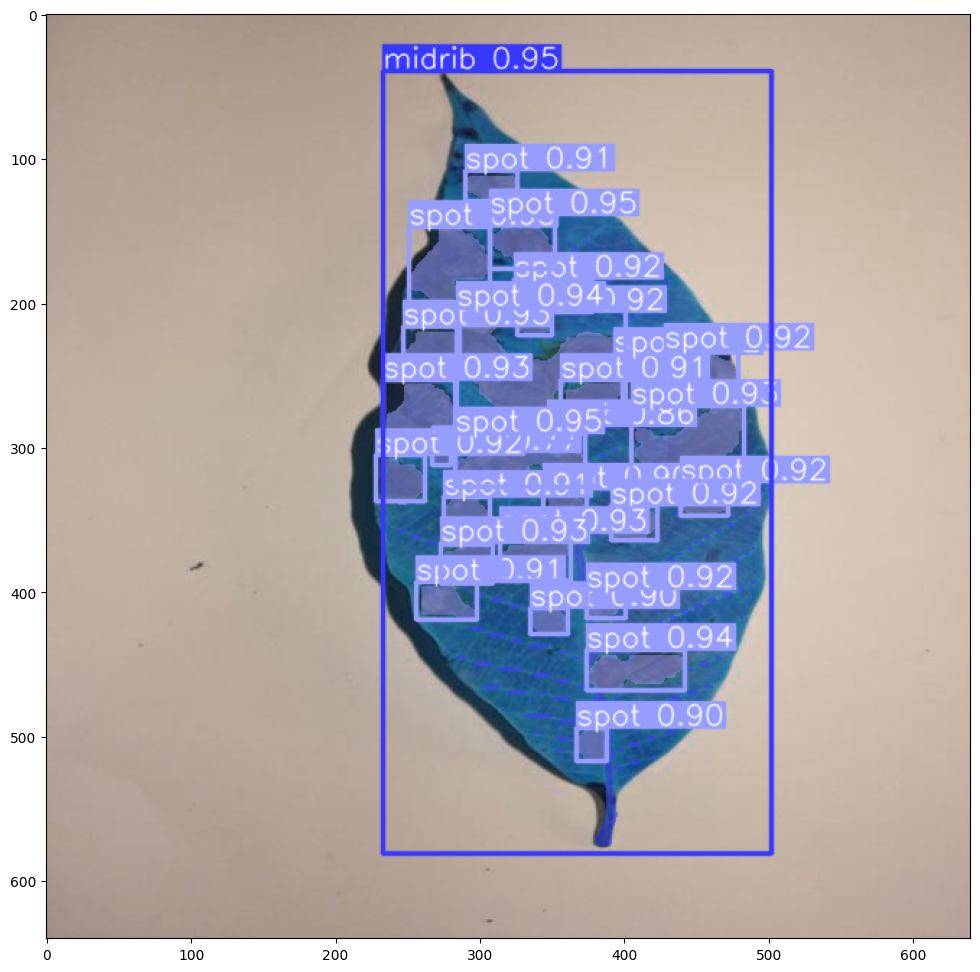

In [ ]:
best_result_array = best_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(best_result_array)
plt.imsave()

# Make dataset of segmented images to train the next model (classification model)

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO
import cv2
import torch
import os
import numpy as np
from pathlib import Path

In [ ]:
'/content/drive/MyDrive/Dataset/Klon IRR/Level 4/Hanya Daun/Vertikal','/content/drive/MyDrive/Dataset/Klon RRIC/Level 4/Hanya Daun/Vertikal'
'/content/drive/MyDrive/Dataset/Klon IRR/Level 3/Hanya Daun/Vertikal','/content/drive/MyDrive/Dataset/Klon RRIC/Level 3/Hanya Daun/Vertikal'
'/content/drive/MyDrive/Dataset/Klon IRR/Level 2/Hanya Daun/Vertikal','/content/drive/MyDrive/Dataset/Klon RRIC/Level 2/Hanya Daun/Vertikal'
'/content/drive/MyDrive/Dataset/Klon IRR/Level 1/Hanya Daun/Vertikal','/content/drive/MyDrive/Dataset/Klon RRIC/Level 1/Hanya Daun/Vertikal'
'/content/drive/MyDrive/Dataset/Klon IRR/Level 0/Hanya Daun/Vertikal','/content/drive/MyDrive/Dataset/Klon RRIC/Level 0/Hanya Daun/Vertikal'

In [ ]:
lastmodel = YOLO('/content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2/weights/last.pt')

In [ ]:
lastmodel = YOLO('/content/drive/MyDrive/yolo_fix/results/xl250_noaug_8_fix2/weights/last.pt')
output_dir = '/content/drive/MyDrive/classifier dataset fix/rric/4'
Path(output_dir).mkdir(parents=True, exist_ok=True)

def process_image(image_path, model, output_dir):

    image = cv2.imread(image_path)

    resized_image = cv2.resize(image, (640, 640))

    results = model(resized_image)

    masks = np.sum(results[0].masks.data.cpu().numpy(), axis=0)

    masks_resized = cv2.resize(masks.astype(np.uint8), (resized_image.shape[1], resized_image.shape[0]))

    masks_binary = (masks_resized > 0.5).astype(np.uint8)

    processed_image = resized_image.copy()
    processed_image[masks_binary == 0] = 255

    filename = os.path.splitext(os.path.basename(image_path))[0]
    cv2.imwrite(os.path.join(output_dir, f"{filename}.jpg"), processed_image)

dataset_dir = '/content/drive/MyDrive/Dataset/Klon RRIC/Level 4/Hanya Daun/Vertikal'
image_files = [f for f in os.listdir(dataset_dir)]

for image_file in image_files:
    image_path = os.path.join(dataset_dir, image_file)
    process_image(image_path, lastmodel, output_dir)

NameError: name 'Path' is not defined

In [ ]:
import os

In [ ]:
len(os.listdir('/content/drive/MyDrive/classifier_dataset/0')),len(os.listdir('/content/drive/MyDrive/classifier_dataset/1')),len(os.listdir('/content/drive/MyDrive/classifier_dataset/2')),len(os.listdir('/content/drive/MyDrive/classifier_dataset/3')),len(os.listdir('/content/drive/MyDrive/classifier_dataset/4'))

(324, 327, 322, 332, 324)

In [ ]:
len(os.listdir('/content/drive/MyDrive/classifier_dataset_2/0')),len(os.listdir('/content/drive/MyDrive/classifier_dataset_2/1')),len(os.listdir('/content/drive/MyDrive/classifier_dataset_2/2')),len(os.listdir('/content/drive/MyDrive/classifier_dataset_2/3')),len(os.listdir('/content/drive/MyDrive/classifier_dataset_2/4'))

(324, 327, 322, 332, 324)

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 4/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 4/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 3/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 3/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 2/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 2/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 1/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 1/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon IRR/Level 0/Hanya Daun/Vertikal')), len(os.listdir('/content/drive/MyDrive/Dataset/Klon RRIC/Level 0/Hanya Daun/Vertikal')))

172 152 177 155 171 151 171 156 171 153


In [ ]:
bestmodel = YOLO('/content/drive/MyDrive/yolo_fix/results/xl200_noaug/weights/best.pt')

In [ ]:
metrics = lastmodel.val(data='/content/drive/MyDrive/yolo_fix/yolo_dataset_v2_testing/4/Copy of data.yaml',split='test')
print(metrics.box.map)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs


val: Scanning /content/drive/MyDrive/yolo_fix/yolo_dataset_noaug/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                   all         10         92      0.878      0.884      0.922      0.766      0.681      0.678      0.652      0.324
                midrib         10         10      0.949          1      0.995      0.961      0.569        0.6      0.467      0.151
                  spot          8         82      0.807      0.768      0.849      0.571      0.793      0.756      0.838      0.497
Speed: 0.3ms preprocess, 87.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/segment/val7
0.7658002630978791


In [ ]:
output_dir = '/content/drive/MyDrive/yolo_fix/cuma buat org jepang/hasil'
Path(output_dir).mkdir(parents=True, exist_ok=True)

def process_image(image_path, model, output_dir):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the input image to (800, 800)
    resized_image = cv2.resize(image, (640, 640))

    # Run inference
    results = model(resized_image)

    # Extract segmentation mask
    masks = np.sum(results[0].masks.data.cpu().numpy(), axis=0)  # Convert to NumPy array

    # Apply segmentation mask on white background
    masks_resized = cv2.resize(masks.astype(np.uint8), (resized_image.shape[1], resized_image.shape[0]))

    # Convert segmentation mask to binary
    masks_binary = (masks_resized > 0.5).astype(np.uint8)

    # Apply segmentation mask on white background
    processed_image = resized_image.copy()
    processed_image[masks_binary == 0] = 255

    # Resize the processed image back to its original size
    #processed_image = cv2.resize(processed_image, (image.shape[1], image.shape[0]))

    # Save processed image
    filename = os.path.splitext(os.path.basename(image_path))[0]
    cv2.imwrite(os.path.join(output_dir, f"{filename}.jpg"), processed_image)

# Process each image in the dataset folder
dataset_dir = '/content/drive/MyDrive/yolo_fix/cuma buat org jepang/asli'
image_files = [f for f in os.listdir(dataset_dir)]

for image_file in image_files:
    image_path = os.path.join(dataset_dir, image_file)
    process_image(image_path, bestmodel, output_dir)

print("Processing completed!")


0: 640x640 1 midrib, 11 spots, 6079.2ms
Speed: 4.8ms preprocess, 6079.2ms inference, 44.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 midrib, 11 spots, 7498.1ms
Speed: 3.3ms preprocess, 7498.1ms inference, 55.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 midrib, 4 spots, 5896.9ms
Speed: 3.7ms preprocess, 5896.9ms inference, 28.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 midrib, 7441.7ms
Speed: 2.9ms preprocess, 7441.7ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 midrib, 36 spots, 5853.1ms
Speed: 3.0ms preprocess, 5853.1ms inference, 129.1ms postprocess per image at shape (1, 3, 640, 640)
Processing completed!


# Misc.

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model (replace "yolov8s.pt" with your desired model variant)
model = YOLO("yolov8x-seg.pt")

100%|██████████| 137M/137M [00:00<00:00, 184MB/s]


In [ ]:
print(model)

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, trac

In [ ]:
layers = []  # List to store layer information
for name, module in model.named_modules():
  # Extract layer type, input/output channels, etc. (specific details based on layer type)
  layer_info = {
      "name": name,
      "type": type(module).__name__,
      # ... other relevant details ...
  }
  layers.append(layer_info)


In [ ]:
layers

[{'name': '', 'type': 'YOLO'},
 {'name': 'model', 'type': 'SegmentationModel'},
 {'name': 'model.model', 'type': 'Sequential'},
 {'name': 'model.model.0', 'type': 'Conv'},
 {'name': 'model.model.0.conv', 'type': 'Conv2d'},
 {'name': 'model.model.0.bn', 'type': 'BatchNorm2d'},
 {'name': 'model.model.0.act', 'type': 'SiLU'},
 {'name': 'model.model.1', 'type': 'Conv'},
 {'name': 'model.model.1.conv', 'type': 'Conv2d'},
 {'name': 'model.model.1.bn', 'type': 'BatchNorm2d'},
 {'name': 'model.model.2', 'type': 'C2f'},
 {'name': 'model.model.2.cv1', 'type': 'Conv'},
 {'name': 'model.model.2.cv1.conv', 'type': 'Conv2d'},
 {'name': 'model.model.2.cv1.bn', 'type': 'BatchNorm2d'},
 {'name': 'model.model.2.cv2', 'type': 'Conv'},
 {'name': 'model.model.2.cv2.conv', 'type': 'Conv2d'},
 {'name': 'model.model.2.cv2.bn', 'type': 'BatchNorm2d'},
 {'name': 'model.model.2.m', 'type': 'ModuleList'},
 {'name': 'model.model.2.m.0', 'type': 'Bottleneck'},
 {'name': 'model.model.2.m.0.cv1', 'type': 'Conv'},
 {'

In [ ]:
# Export the model to ONNX format
model.export(format='onnx')  # creates 'yolov8n.onnx'

# Load the exported ONNX model


Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

PyTorch: starting from 'yolov8x.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (130.5 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 10.7s, saved as 'yolov8x.onnx' (260.4 MB)

Export complete (20.6s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8x.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8x.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8x.onnx'

In [ ]:
onnx_model = YOLO('/content/yolov8x-seg.onnx')

# Run inference
results = onnx_model('https://ultralytics.com/images/bus.jpg')

Loading /content/yolov8x-seg.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 244.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.8s, installed 1 package: ['onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect




100%|██████████| 476k/476k [00:00<00:00, 15.7MB/s]


image 1/1 /content/bus.jpg: 640x640 4 persons, 1 bus, 1 tie, 3199.0ms
Speed: 15.3ms preprocess, 3199.0ms inference, 1311.4ms postprocess per image at shape (1, 3, 640, 640)
